# **Contact Information**
| Name             | Email                                   |
|------------------|-----------------------------------------|
| Ziyi Wang | nathanielbee731@gmail.com    |



### 1 Introduction


The fashion industry has seen rapid growth in e-commerce, recommendation systems, and inventory management, driving the need for automated and accurate classification of fashion items. Manual categorization of products is time-consuming and prone to human error, especially given the vast diversity in styles, designs, and visual similarities across different categories. To address this challenge, computer vision techniques, particularly deep learning-based approaches, have emerged as powerful tools for automating fashion item classification.
This project focuses on developing a Convolutional Neural Network (CNN) model to classify fashion items into four primary categories—shoes, clothing, accessories, and bags—using the UT Fashion 100 dataset. The dataset contains a diverse collection of labeled fashion images, providing a robust foundation for training and evaluating deep learning models. The proposed model aims to enhance efficiency in fashion-related applications, such as product search optimization, recommendation engines, and inventory management, by accurately identifying and categorizing fashion items from images.
The outcomes of this work could contribute to more efficient and scalable solutions for the fashion industry, reducing reliance on manual labeling and improving user experience in digital fashion platforms.




#### 1.1 Table of Contents

*   [1 Introduction](#1-Introduction)
    *   [1.1 Table of Contents](#1.1-Table-of-Contents)
    *   [1.2 Extending to Real Business Solutions and Beyond](#1.2-Extending-to-Real-Business-Solutions-and-Beyond)
    *   [1.3 Goal of Our Project](#1.3-Goal-of-Our-Project)
*   [2 Data Acquisition](#2-Data-Acquisition)
    *   [2.1 The description of the dataset](#2.1-The-description-of-the-dataset)
    *   [2.2 Extraction of the original dataset](#2.2-Extraction-of-the-original-dataset)
    *   [2.3 Extraction of the original dataset](#2.3-Extraction-of-the-original-dataset-1)
    *   [2.4 Forming new dataset](#2.4-Forming-new-dataset)
    *   [2.5 Separation of the new dataset](#2.5-Separation-of-the-new-dataset)
    *   [2.6 Statistic of the new dataset](#2.6-Statistic-of-the-new-dataset)
*   [3 Data Augmentation and Dataset Design](#3-Data-Augmentation-and-Dataset-Design)
    *   [3.1 Fully supervised Dataloader](#3.1-Fully-supervised-Dataloader)
    *   [3.2 Semi-supervised Dataloader](#3.2-Semi-supervised-Dataloader)
    *   [3.3 Albumentations library](#3.3-Albumentations-library)
*   [4 Models & Methods](#4-Models-&-Methods)
    *   [4.1 Baseline Models](#4.1-Baseline-Models)
    *   [4.2 Proposed Model: DynamicRELANClassifier](#4.2-Proposed-Model:-DynamicRELANClassifier)
    *   [4.3 Proposed Model 2: Semi-Supervised Cluster-then-Label](#4.3-Proposed-Model-2:-Semi-Supervised-Cluster-then-Label)
    *   [4.4 Loss Functions](#4.4-Loss-Functions)
    *   [4.5: Training](#4.5:-Training)
        *   [4.5.1 Optimizer](#4.5.1-Optimizer)
        *   [4.5.2 Training Strategies](#4.5.2-Training-Strategies)
        *   [4.5.3 Key Hyperparameters](#4.5.3-Key-Hyperparameters)
    *   [4.6 Training for Task A](#4.6-Training-for-Task-A)
        *   [4.6.1 Comparison & Improvement 1: Training Runs with Different Attention Patterns](#4.6.1-Comparison-&-Improvement-1:-Training-Runs-with-Different-Attention-Patterns)
        *   [4.6.2 Comparison & Improvement 2: Training Runs with Mixed Attention Patterns via Varying LR and Smoothing](#4.6.2-Comparison-&-Improvement-2:-Training-Runs-with-Mixed-Attention-Patterns-via-Varying-LR-and-Smoothing)
        *   [4.6.3 Comparison & Improvement 3: AdamW vs. SGD with Momentum](#4.6.3-Comparison-&-Improvement-3:-AdamW-vs.-SGD-with-Momentum)
    *   [4.7 Training for Task B](#4.7-Training-for-Task-B)
        *   [4.7.1 Comparison of ResNet-18 (Fine-Tune Final Layer) vs. ResNet-18 (Layer-Wise Fine-Tuning with Dropout)](#4.7.1-Comparison-of-ResNet-18-(Fine-Tune-Final-Layer)-vs.-ResNet-18-(Layer-Wise-Fine-Tuning-with-Dropout)
        *   [4.7.2 K_cluster model](#4.7.2-K_cluster-model)
*   [5 Result](#5-Result)
    *   [5.1 Executive Summary](#5.1-Executive-Summary)
    *   [5.2 Methodology](#5.2-Methodology)
        *   [5.2.1 Test Framework](#5.2.1-Test-Framework)
        *   [5.2.2 Test Script](#5.2.2-Test-Script)
    *   [5.3 Comparative Analysis of Fashion Classification Models](#5.3-Comparative-Analysis-of-Fashion-Classification-Models)
        *   [5.3.1 Performance Overview](#5.3.1-Performance-Overview)
        *   [5.3.2 Head-to-Head Comparison](#5.3.2-Head-to-Head-Comparison)
        *   [5.3.3 Architectural Insights](#5.3.3-Architectural-Insights)
        *   [5.3.4 Visual Benchmarking](#5.3.4-Visual-Benchmarking)
        *   [5.3.5 Critical Findings](#5.3.5-Critical-Findings)
        *   [5.3.6 Conclusion](#5.3.6-Conclusion)
*   [6 Discussion](#6-Discussion)
*   [7 Reference](#7-Reference)

#### 1.2 Extending to Real Business Solutions and Beyond

The **DynamicRELANClassifier** developed in this project offers significant potential for real-world business applications within the fashion industry, primarily due to its demonstrated balance of accuracy and computational efficiency.

#### Core Business Applications:

*   **Enhanced E-commerce Operations:** Integrate the classifier into online platforms for automated product tagging upon upload, significantly speeding up inventory processing and reducing manual labor costs associated with categorization. This ensures consistent product information for improved search filtering and recommendation engine accuracy, leading to better user experience and potentially higher conversion rates.
*   **Efficient Inventory Management:** Use the model for rapid categorization of large volumes of physical or digital stock, enabling better tracking, analysis of category-specific sales trends, and more informed purchasing decisions. The model's speed (~70% faster training, 3x lower GPU usage) makes frequent retraining feasible to accommodate new styles and inventory updates.
*   **Visual Search Backend:** Serve as the foundational categorization engine for visual search tools, allowing customers to find similar items based on uploaded images by first identifying the core category (bag, shoe, etc.) efficiently.

#### Beyond Current Implementation (Future Potential):

*   **Fine-Grained Analysis:** By addressing the current subclass limitations (through few-shot learning or improved architectures as suggested in future work), the system could power highly specific searches ("find me crossbody leather bags"), detailed attribute tagging (style, material, pattern), and nuanced recommendations.
*   **Personalized Styling & Marketing:** Combine accurate classification with user purchase history and preferences to offer highly personalized styling suggestions or targeted marketing campaigns based on specific categories or subcategories a user engages with.
*   **Trend Forecasting:** Analyze the classification distribution of newly listed items or social media fashion images over time to identify emerging trends at both superclass and potentially subclass levels.
*   **Supply Chain & Logistics:** Use automated classification in warehouses or distribution centers to streamline sorting and routing processes.
*   **Integration with Generative Models:** Use the classifier to guide generative AI in creating new fashion designs specifically within targeted categories.

The key advantage remains the efficiency of the **DynamicRELAN** architecture, making these solutions scalable and cost-effective compared to computationally heavier models or continued reliance on manual processes. Overcoming the subclass accuracy challenge is the next critical step to unlocking the more granular and advanced applications.

#### 1.3 Goal of Our Project

The primary goal of this project was to develop and evaluate an efficient and accurate deep learning model for automated fashion item classification, specifically addressing the limitations of slow and inconsistent manual categorization prevalent in the industry.

#### Key objectives included:

1.  **Designing a Novel Architecture:** Propose the **DynamicRELANClassifier**, leveraging R-ELAN blocks and a custom hybrid attention mechanism (**CBAM** + **Area Attention**) to optimize the trade-off between classification accuracy and computational efficiency (training time, inference speed).
2.  **Improving Efficiency:** Significantly reduce the training time and computational resources required compared to standard baseline models (like **ResNet** fine-tuning) and computationally intensive attention mechanisms (like pure **Area Attention**), making the solution practical for real-world deployment with frequent updates.
3.  **Achieving Competitive Accuracy:** Attain high classification accuracy, particularly at the superclass level (bags, clothing, shoes, accessories), demonstrating the model's effectiveness for core categorization tasks.
4.  **Handling Data Challenges:** Develop preprocessing and data loading strategies to manage inconsistencies and limitations present in real-world (or adapted real-world like **faSHLON**) datasets, including label inconsistencies and class imbalance.
5.  **Establishing Baselines:** Compare the proposed model against standard fine-tuning techniques (**ResNet-18**) and explore alternative approaches (like semi-supervised **Cluster-then-Label**) to rigorously evaluate its performance and characteristics.
6.  **Demonstrating Practicality:** Show the potential impact of such a model on key fashion industry applications like inventory management, product search, and recommendation systems.

Ultimately, the project aimed to provide a proof-of-concept for a deep learning solution that is not only accurate but also operationally efficient for the dynamic environment of the fashion industry.

In [ ]:
from google.colab import drive
drive.mount('/content/9444/')

Mounted at /content/9444/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2 Data Acquisition

### 2.1 The description of the dataset

We used the faSHLON dataset, which was originally designed for evaluating the fashionability of clothing combinations. The dataset consists of two separate subsets, AAT (988 images) and LAT (7427 images), with annotations provided in the form of grouped fashion items. Each group typically includes around five labeled clothing items and five recommended fashion matches. The images are in color and medium resolution in JPEG format.
For our image classification task, we needed a dataset where each image is paired with a clear label, but the original data only provides group-based annotations. Moreover, upon inspecting the dataset, we found that the number of labeled images was significantly lower than the total number of images (roughly one-fifth). The labels themselves also had various issues, such as inconsistent use of singular/plural forms, mixed usage of fine-grained and coarse-grained classes, and inconsistent capitalization—all of which can negatively impact classification performance.

### 2.2 Extraction of the original dataset
*choose_labelAAT*

### 2.3 Extraction of the original dataset

As the original dataset focus on the fashion match but not the classification, so we need to get the new dataset by extraction.
This script copies labeled images from the original dataset to a separate folder.
It loads image labels from a JSON file, skips unlabeled entries, and matches image files
(case-insensitively) by appending ".jpg" to each ID. Matching images are copied to the
output folder, and a summary of the total copied files is printed.



*get the new json*

This script extracts image ID and class label pairs from two JSON files (LAT.json and AAT.json) by parsing structured strings in their "question" and "answers" fields. It generates a deduplicated mapping of image IDs to class names and saves the result as a new JSON file (image_class_map.json) for downstream use such as image classification tasks.

In [ ]:
import json
import re


# ===== Input Paths =====
lat_path = "drive/MyDrive/ColabNotebooks/9444/data/LAT/label/LAT.json"
aat_path = "drive/MyDrive/ColabNotebooks/9444/data/AAT/label/AAT.json"


output_json = 'image_class_map.json' # Output JSON file

# ===== Extraction Function =====
def extract_id_and_class(entry):
    results = []
    for item in entry:
        # Handle format like Tops_Pxxxx or Skirt_Pxxxx
        match = re.match(r"([A-Za-z]+)_(P\d+)", item, re.IGNORECASE)
        if match:
            cls, pid = match.groups()
            results.append((pid, cls.capitalize()))
        else:
            # Handle format like Clothings/Tops_001A03
            match2 = re.match(r"[A-Za-z]+/([A-Za-z]+)_(\d+[A-Za-z0-9]*)", item)
            if match2:
                cls, pid = match2.groups()
                results.append((pid, cls.capitalize()))
    return results

# ===== Build Mapping =====
image_class_pairs = set()

# Load LAT Data
with open(lat_path, 'r', encoding='utf-8') as f:
    lat_data = json.load(f)
    for q in lat_data:
        image_class_pairs.update(extract_id_and_class(q.get("question", [])))
        image_class_pairs.update(extract_id_and_class(q.get("answers", [])))

# Load AAT Data
with open(aat_path, 'r', encoding='utf-8') as f:
    aat_data = json.load(f)
    for q in aat_data:
        image_class_pairs.update(extract_id_and_class(q.get("question", [])))
        image_class_pairs.update(extract_id_and_class(q.get("answers", [])))

# ===== Write to JSON File =====
image_class_dict = {image_id: cls for image_id, cls in sorted(image_class_pairs)}

with open(output_json, 'w', encoding='utf-8') as f:
    json.dump(image_class_dict, f, indent=2)

print(f"✅ JSON label file generated: {output_json}")


'this is english quote'
✅ JSON label file generated: image_class_map.json


### 2.4 Forming new dataset

*choose_labelAAT*

This script reads a JSON file containing image IDs and their labels, filters out entries labeled as "unlabeled", and then copies the corresponding image files (with ".jpg" extension) from the source folder to a designated output folder. It matches filenames in a case-insensitive way and reports how many labeled images were successfully copied.

In [ ]:
import os
import json
import shutil

# ===== Path Configuration =====
image_folder = "drive/MyDrive/ColabNotebooks/9444/data/AAT/image"       # Original image path
label_json_path = "image_class_map.json"  # Path to the label file
output_folder = "labeled"                 # Output folder

# ===== Create Output Folder =====
os.makedirs(output_folder, exist_ok=True)

# ===== Load Label File =====
with open(label_json_path, "r") as f:
    label_dict = json.load(f)

# ===== Build Filename Mapping (case-insensitive) =====
all_images = {
    filename.lower(): filename
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
}

# ===== Extract and Copy Images =====
count = 0
for image_id, label in label_dict.items():
    if label.lower() != "unlabeled":
        # Append extension
        filename_with_ext = image_id + ".jpg"
        target_name = filename_with_ext.lower()

        if target_name in all_images:
            real_name = all_images[target_name]
            src_path = os.path.join(image_folder, real_name)
            dst_path = os.path.join(output_folder, real_name)
            shutil.copyfile(src_path, dst_path)
            count += 1
            print(f"✅ Copied: {real_name}")
        else:
            print(f"⚠️ Image not found: {filename_with_ext}")

print(f"\n🎉 Successfully copied {count} labeled images to the '{output_folder}/' folder.")


✅ Copied: 001A01.jpg
✅ Copied: 001A02.jpg
✅ Copied: 001A03.jpg
✅ Copied: 001A04.jpg
✅ Copied: 001A10.jpg
✅ Copied: 001Q01.jpg
✅ Copied: 001Q02.jpg
✅ Copied: 001Q03.jpg
✅ Copied: 001Q04.jpg
✅ Copied: 001Q05.jpg
✅ Copied: 002A01.jpg
✅ Copied: 002A02.jpg
✅ Copied: 002A03.jpg
✅ Copied: 002A04.jpg
✅ Copied: 002A10.jpg
✅ Copied: 002Q01.jpg
✅ Copied: 002Q02.jpg
✅ Copied: 002Q03.jpg
✅ Copied: 002Q04.jpg
✅ Copied: 002Q05.jpg
✅ Copied: 003A01.jpg
✅ Copied: 003A02.jpg
✅ Copied: 003A03.jpg
✅ Copied: 003A04.jpg
✅ Copied: 003A10.jpg
✅ Copied: 003Q01.jpg
✅ Copied: 003Q02.jpg
✅ Copied: 003Q03.jpg
✅ Copied: 003Q04.jpg
✅ Copied: 003Q05.jpg
✅ Copied: 004A01.jpg
✅ Copied: 004A02.jpg
✅ Copied: 004A03.jpg
✅ Copied: 004A04.jpg
✅ Copied: 004A10.jpg
✅ Copied: 004Q01.jpg
✅ Copied: 004Q02.jpg
✅ Copied: 004Q03.jpg
✅ Copied: 004Q04.jpg
✅ Copied: 004Q05.jpg
✅ Copied: 005A01.jpg
✅ Copied: 005A02.jpg
✅ Copied: 005A03.jpg
✅ Copied: 005A04.jpg
✅ Copied: 005A10.jpg
✅ Copied: 005Q01.jpg
✅ Copied: 005Q02.jpg
✅ Copied: 005

*choose_labelLAT*

In [ ]:
import os
import json
import shutil

# ===== Path Configuration =====
image_folder = "drive/MyDrive/ColabNotebooks/9444/data/LAT/image"       # Original image folder
label_json_path = "image_class_map.json"  # Label JSON file path
output_folder = "labeled"                 # Output folder

# ===== Create Output Folder =====
os.makedirs(output_folder, exist_ok=True)

# ===== Load Label File =====
with open(label_json_path, "r") as f:
    label_dict = json.load(f)

# ===== Build Filename Mapping (case-insensitive) =====
all_images = {
    filename.lower(): filename
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
}

# ===== Extract and Copy Labeled Images =====
count = 0
for image_id, label in label_dict.items():
    if label.lower() != "unlabeled":
        # Add file extension
        filename_with_ext = image_id + ".jpg"
        target_name = filename_with_ext.lower()

        if target_name in all_images:
            real_name = all_images[target_name]
            src_path = os.path.join(image_folder, real_name)
            dst_path = os.path.join(output_folder, real_name)
            shutil.copyfile(src_path, dst_path)
            count += 1
            print(f"✅ Copied: {real_name}")
        else:
            print(f"⚠️ Image not found: {filename_with_ext}")

print(f"\n🎉 Successfully copied {count} labeled images to the '{output_folder}/' folder.")


⚠️ Image not found: 001A01.jpg
⚠️ Image not found: 001A02.jpg
⚠️ Image not found: 001A03.jpg
⚠️ Image not found: 001A04.jpg
⚠️ Image not found: 001A10.jpg
⚠️ Image not found: 001Q01.jpg
⚠️ Image not found: 001Q02.jpg
⚠️ Image not found: 001Q03.jpg
⚠️ Image not found: 001Q04.jpg
⚠️ Image not found: 001Q05.jpg
⚠️ Image not found: 002A01.jpg
⚠️ Image not found: 002A02.jpg
⚠️ Image not found: 002A03.jpg
⚠️ Image not found: 002A04.jpg
⚠️ Image not found: 002A10.jpg
⚠️ Image not found: 002Q01.jpg
⚠️ Image not found: 002Q02.jpg
⚠️ Image not found: 002Q03.jpg
⚠️ Image not found: 002Q04.jpg
⚠️ Image not found: 002Q05.jpg
⚠️ Image not found: 003A01.jpg
⚠️ Image not found: 003A02.jpg
⚠️ Image not found: 003A03.jpg
⚠️ Image not found: 003A04.jpg
⚠️ Image not found: 003A10.jpg
⚠️ Image not found: 003Q01.jpg
⚠️ Image not found: 003Q02.jpg
⚠️ Image not found: 003Q03.jpg
⚠️ Image not found: 003Q04.jpg
⚠️ Image not found: 003Q05.jpg
⚠️ Image not found: 004A01.jpg
⚠️ Image not found: 004A02.jpg
⚠️ Image

### 2.5 Separation of the new dataset

This script splits a labeled image dataset into training, validation, and test sets based on a given ratio (default 70/20/10). It copies the corresponding images into separate folders and generates a labels.json file for each subset containing the image-label mappings.

In [ ]:
import os
import shutil
import json
import random
from pathlib import Path

# ==== Configuration ====
random_seed = 42
split_ratio = [0.7, 0.2, 0.1]  # Train : Validation : Test

# ==== Relative Path Setup ====
base_dir = Path(".").resolve()
label_json_path = base_dir / 'image_class_map.json'
image_dir = base_dir / 'labeled'
output_dir = base_dir / 'drive/MyDrive/ColabNotebooks/9444/data'

# ==== Create Output Directory Structure ====
for split in ['train', 'val', 'test']:
    (output_dir / split / 'images').mkdir(parents=True, exist_ok=True)
    (output_dir / split / 'labels').mkdir(parents=True, exist_ok=True)

# ==== Load Label JSON ====
with open(label_json_path, 'r', encoding='utf-8') as f:
    label_map = json.load(f)

image_names = list(label_map.keys())
random.Random(random_seed).shuffle(image_names)

# ==== Split Dataset ====
total = len(image_names)
train_end = int(total * split_ratio[0])
val_end = train_end + int(total * split_ratio[1])
splits = {
    'train': image_names[:train_end],
    'val': image_names[train_end:val_end],
    'test': image_names[val_end:]
}

# ==== Copy Images and Save labels/labels.json ====
for split, names in splits.items():
    split_label_map = {}
    for name in names:
        src_img = image_dir / f'{name}.jpg'
        if not src_img.exists():
            print(f'⚠️ Image not found: {src_img}')
            continue

        dst_img = output_dir / split / 'images' / f'{name}.jpg'
        shutil.copy(src_img, dst_img)

        split_label_map[name] = label_map[name]

    # Save labels.json under labels/ directory
    labels_json_path = output_dir / split / 'labels' / 'labels.json'
    with open(labels_json_path, 'w', encoding='utf-8') as f:
        json.dump(split_label_map, f, indent=2)


### 2.6 Statistic of the new dataset

This script performs a statistical analysis of class labels stored in a JSON file (image_class_map.json). It counts how many samples belong to each class and visualizes the distribution using a pie chart. The chart is saved as a PNG image for further inspection or reporting.

Number of samples per class:
Back: 14
Bags: 120
Belts: 17
Boots: 42
Bracelet: 11
Bracelets: 27
Brooch: 11
Clutch: 29
Crossbody: 39
Dress: 88
Dresses: 52
Earing: 29
Earrings: 84
Eyewear: 24
Flats: 20
Gloves: 11
Hairwear: 19
Hat: 19
Hats: 25
Heels: 41
Jumpsuits: 21
Legwear: 18
Mules: 24
Necklaces: 26
Neckline: 7
Neckwear: 13
Outwear: 143
Pants: 47
Rings: 30
Sandals: 29
Shoes: 131
Shoulder: 29
Skirt: 41
Skirts: 34
Sneakers: 27
Sunglasses: 7
Top: 80
Tophandle: 31
Tops: 73
Tote: 27
Trousers: 60
Watches: 43


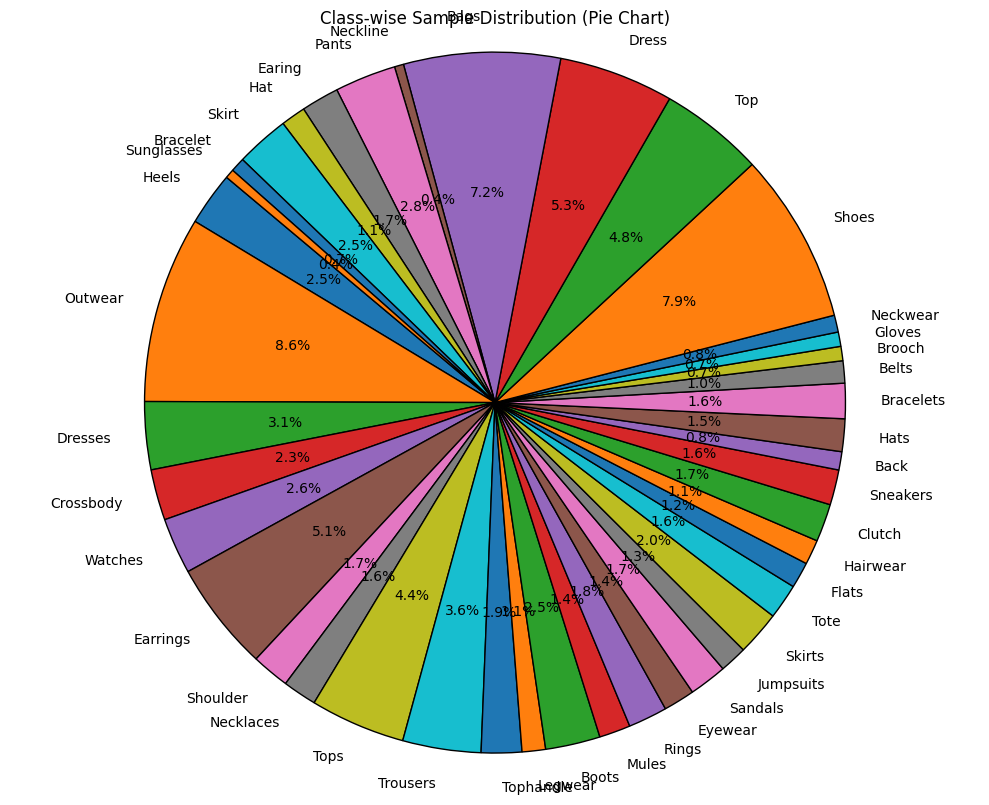

In [ ]:
import json
from collections import Counter

# Replace with your labels.json file path
json_path = 'image_class_map.json'

# Load JSON file
with open(json_path, 'r', encoding='utf-8') as f:
    label_data = json.load(f)

# Extract all class names
all_classes = list(label_data.values())

# Count occurrences of each class
class_counter = Counter(all_classes)

# Print results
print("Number of samples per class:")
for class_name in sorted(class_counter):
    print(f"{class_name}: {class_counter[class_name]}")

import matplotlib.pyplot as plt

# Set font (use 'SimHei' if labels are in Chinese)
plt.rcParams['font.family'] = 'Arial'

# File path
json_path = 'image_class_map.json'

# Load JSON
with open(json_path, 'r', encoding='utf-8') as f:
    label_data = json.load(f)

# Count class occurrences
class_counts = Counter(label_data.values())

# Prepare data
labels = list(class_counts.keys())
sizes = list(class_counts.values())

# Draw pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Class-wise Sample Distribution (Pie Chart)")
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.savefig("class_distribution_pie.png", dpi=300)


Through the picture, we could find that the imbalance problem of the data, the most class is the dress, which has 140 samples, the least is only 7.During early training, we noticed a major problem: the class distribution was highly imbalanced across the 37 fine-grained categories, which caused performance degradation in fine-grained classification tasks. However, performance on many major categories was satisfactory, indicating that the problem lay in the data itself.
To mitigate this, we decided to focus on major category classification by mapping fine-grained classes into broader categories.

## 3 Data Augmentation and Dataset Design

To address label inconsistencies (e.g., plural, capitalisation, mixed category levels), we designed two data loading systems for the image classification task, one for fully-supervised learning and the other for semi-supervised learning. Both methods are effective in skipping invalid images or labels, processing different image formats, and preparing data for enhancement. We introduce a data enhancement strategy using:RandomResizedCrop HorizontalFlip ColorJitter.These are classified into three enhancement levels:Weak:Crop + HorizontalFlip Medium:Add Brightness/Contrast Jitter Strong:Add VerticalFlip, Random panning and zooming.

### 3.1 Fully supervised Dataloader

This script is the key module responsible for data loading and pre-processing in the whole project, which accomplishes image data reading, label normalisation, category mapping, image enhancement, data validation, and DataLoader construction for training/validation/testing sets.

The script reads the image tags stored in JSON files through the custom FashionDataset class, and maps the subclasses (e.g., Heels, Boots, etc.) to the four superclasses (shoes, clutches, bags, accessories) after standardisation, which ensures the consistency and robustness of the tag processing.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from pathlib import Path
import os
import json
from PIL import Image
import argparse
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

# subclass to index
class_to_idx = {
    'Back': 0, 'Bags': 1, 'Clutch': 2, 'CrossBody': 3,
    'Shoulder': 4, 'TopHandle': 5, 'Tote': 6,
    'Belts': 7, 'Boots': 8, 'Bracelet': 9, 'Brooch': 10,
    'Dress': 11, 'Earring': 12, 'Eyewear': 13, 'Flats': 14,
    'Gloves': 15, 'Hairwear': 16, 'Hat': 17, 'Heels': 18,
    'Jumpsuit': 19, 'Legwear': 20, 'Mules': 21, 'Necklace': 22,
    'Outwear': 23, 'Pants': 24, 'Rings': 25, 'Sandals': 26,
    'Skirt': 27, 'Sneakers': 28, 'Sunglasses': 29, 'Top': 30,
    'Trouser': 31, 'Watches': 32, 'Shoes': 33
}
# subclass to superclass
subclass_to_superclass = {
    'Heels': 'shoes', 'Boots': 'shoes', 'Flats': 'shoes',
    'Sandals': 'shoes', 'Sneakers': 'shoes', 'Mules': 'shoes', 'Shoes': 'shoes',
    'Skirt': 'clothing', 'Dress': 'clothing', 'Top': 'clothing',
    'Trouser': 'clothing', 'Jumpsuit': 'clothing', 'Outwear': 'clothing',
    'Legwear': 'clothing', 'Pants': 'clothing',
    'Back': 'bags', 'Bags': 'bags', 'Clutch': 'bags',
    'CrossBody': 'bags', 'Shoulder': 'bags', 'TopHandle': 'bags',
    'Tote': 'bags',
    'Earring': 'accessories', 'Necklace': 'accessories',
    'Watches': 'accessories', 'Rings': 'accessories',
    'Eyewear': 'accessories', 'Hairwear': 'accessories',
    'Hat': 'accessories', 'Gloves': 'accessories',
    'Bracelet': 'accessories', 'Belts': 'accessories',
    'Brooch': 'accessories', 'Sunglasses': 'accessories'
}
# Standardized category name mapping
standardize_class_names = {
    'Bracelets': 'Bracelet',
    'Dresses': 'Dress',
    'Earrings': 'Earring',
    'Hats': 'Hat',
    'Jumpsuits': 'Jumpsuit',
    'Necklaces': 'Necklace',
    'Skirts': 'Skirt',
    'Tops': 'Top',
    'Earing': 'Earring',
    'Neckline': 'Necklace',
    'Neckwear': 'Necklace',
    'Trousers': 'Trouser',
    'Crossbody': 'CrossBody',
    'Tophandle': 'TopHandle'
}
# Mapping from superclass to index
superclass_to_idx = {
    'shoes': 0,
    'clothing': 1,
    'bags': 2,
    'accessories': 3
}
num_classes = len(superclass_to_idx)  # the number of major categories
class FashionDataset(Dataset):
    """Custom fashion dataset class (processing labels.json in dictionary format)"""

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_dir = os.path.join(root_dir, 'images')

        # Load labels.json in the labels folder
        labels_path = os.path.join(root_dir, 'labels', 'labels.json')
        if not os.path.exists(labels_path):
            raise FileNotFoundError(f"The tag file does not exist: {labels_path}")

        with open(labels_path, 'r', encoding='utf-8') as f:
            labels_dict = json.load(f)

            # Convert the dictionary format to the list format expected by the code
            self.all_labels = [
                {"image_name": f"{img_id}.jpg", "class": class_name}
                for img_id, class_name in labels_dict.items()
            ]

        # Get all image files and create a mapping (case insensitive)
        self.image_files = [f for f in os.listdir(self.image_dir)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        self.label_map = {
            item['image_name'].lower(): item
            for item in self.all_labels
        }

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)

        # Find tags (case insensitive)
        label_data = self.label_map.get(img_name.lower())
        if label_data is None:
            available_files = "\n".join(list(self.label_map.keys())[:5])
            raise ValueError(
                f"Can't find {img_name} label data corresponding to the image\n"
                f"First 5 available tag keys:\n{available_files}"
            )

        # Standardize category names and convert to superclass index
        class_name = standardize_class_names.get(label_data['class'], label_data['class'])
        try:
            # First get the superclass corresponding to subclass, then get the index of the superclass
            superclass = subclass_to_superclass[class_name]
            label = superclass_to_idx[superclass]
        except KeyError:
            raise ValueError(
                f"Unknown category: {label_data['class']}\n"
                f"Known subclasses: {list(class_to_idx.keys())}\n"
                f"Known superclasses: {list(superclass_to_idx.keys())}"
            )

        # Load images (automatically handles different image formats)
        try:
            image = Image.open(img_path).convert('RGB')
            image = np.array(image)  # Convert to numpy array for use with albumentations
        except Exception as e:
            raise ValueError(f"Unable to load image {img_path}: {str(e)}")

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']

        return image, label
# Detailed data enhancement code in 3.3
def create_data_loaders(data_dir, batch_size=32, augmentation_level='medium', num_workers=4):
    """Create data loader (main interface)"""
    train_transforms, val_test_transforms = get_data_transforms(augmentation_level)

    train_dataset = FashionDataset(
        os.path.join(data_dir, 'train'),
        transform=train_transforms
    )

    val_dataset = FashionDataset(
        os.path.join(data_dir, 'val'),
        transform=val_test_transforms
    )

    test_dataset = FashionDataset(
        os.path.join(data_dir, 'test'),
        transform=val_test_transforms
    )

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_loader, val_loader, test_loader

# Keep the original subclass mapping (for testing)
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Superclass Mapping
idx_to_superclass = {v: k for k, v in superclass_to_idx.items()}

def get_class_info(pred_idx):
    superclass = idx_to_superclass[pred_idx]
    return {
        'superclass': superclass,
        'display_text': f"This picture belongs to {superclass} superclass"
    }

if __name__ == "__main__":
    import traceback

    current_dir = Path(__file__).parent
    test_root = current_dir.parent / "Data"

    transform = A.Compose([
        A.Resize(800, 800),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

    try:
        missing_superclasses = [k for k in class_to_idx if k not in subclass_to_superclass]
        if missing_superclasses:
           print(f"Warning: The following subclasses are missing superclass mapping: {missing_superclasses}")
        else:
           print("✓ All subclasses have corresponding superclasses mappings")

        # Test dataset loading
        train_dataset = FashionDataset(os.path.join(test_root, 'train'), transform=transform)
        val_dataset = FashionDataset(os.path.join(test_root, 'val'), transform=transform)
        test_dataset = FashionDataset(os.path.join(test_root, 'test'), transform=transform)

        print(f"✓ Dataset loaded successfully")
        print(f"Total number of samples: {len(train_dataset) + len(val_dataset) + len(test_dataset)}")
        print(f"Number of categories:: {num_classes}")

        # Check the first sample
        img, label = train_dataset[0]
        print(f"Sample 0 | Image shape: {img.shape} | Label: {label} ({idx_to_superclass[label]})")

        # Verify label validity
        invalid_classes = []
        for item in train_dataset.all_labels:
            class_name = standardize_class_names.get(item['class'], item['class'])
            if class_name not in subclass_to_superclass:
                invalid_classes.append(item['class'])

        if not invalid_classes:
            print("✓ All label mappings are valid")
        else:
            print(f"! Invalid tags found: {set(invalid_classes)}")

        # Testing the Data Loader
        print("\nTesting the Data Loader...")
        train_loader, val_loader, test_loader = create_data_loaders(
            data_dir=test_root,
            batch_size=4,
            augmentation_level='medium'
        )
        print(f"Training batch: {len(train_loader)} | Validation batch: {len(val_loader)} | Test set batches: {len(test_loader)}")

        # get_class_info
        print("\nget_class_info:")
        for i in range(num_classes):
            info = get_class_info(i)
            print(f"category{i}: {info}")

    except Exception as e:
        print(f"mistake: {str(e)}")
        traceback.print_exc()

NameError: name '__file__' is not defined

The script integrates a complete data loader interface, create_data_loaders, to enable the shuffle mechanism for the training set and unify the standardised processing flow between the validation set and the test set. In practice, the script outputs the following results to verify the completeness and correctness of data loading:


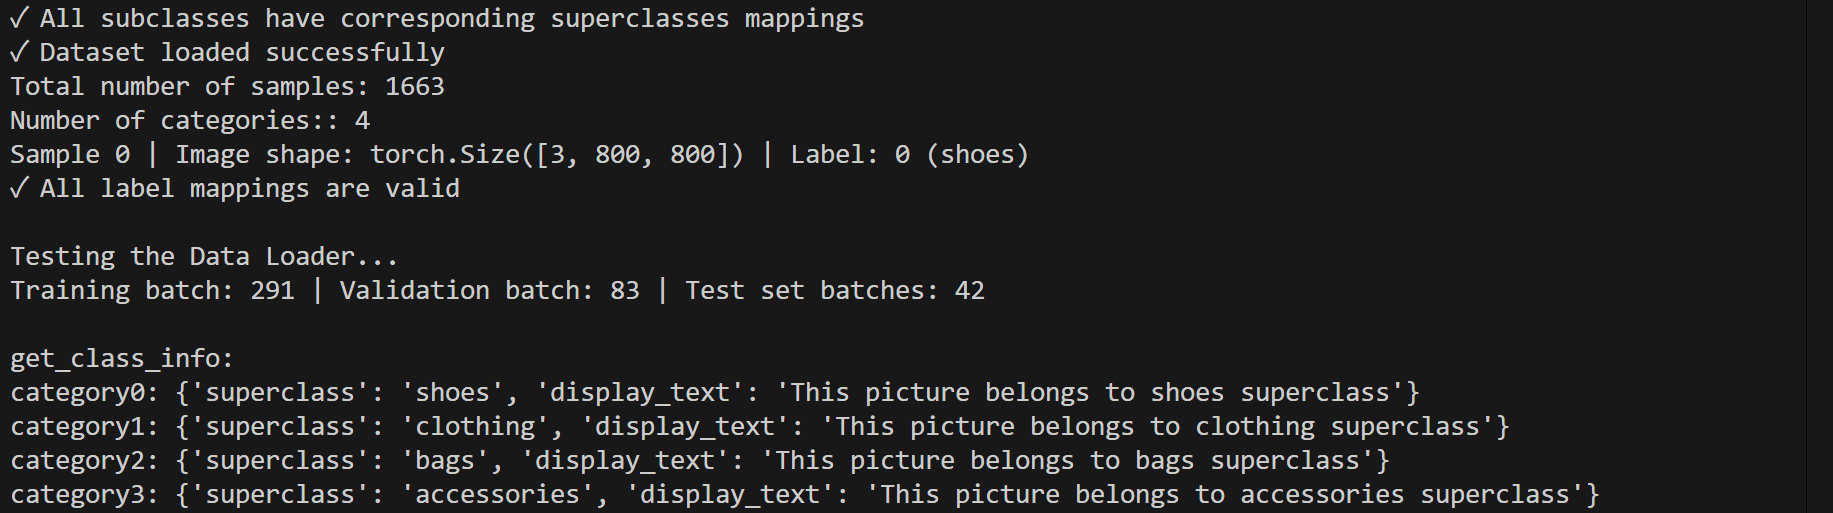

### 3.2 Semi-supervised Dataloader

As seen from the above results, the old version of dataloader.py we used can only load image data with labels. However, the actual number of labelled images is only 1664, while the total number of images in the whole dataset is more than 10,000. The low label coverage results in very limited model training data, which is prone to problems such as overfitting and poor generalisation.

At the same time, we note that there is a special class of problems in the data: some of the subclass names are the same as the superclass names, for example, some of the images are labelled as "Shoes", which is the name of the superclass itself, rather than a specific subclass. Such labels may lead to confusion when label mapping or model output interpretation. To ensure the accuracy of the label processing, we choose to consciously ignore this part of the images in the data preprocessing stage to avoid interference with the model training and evaluation results.

Based on the above needs and issues, in order to make full use of all the images and improve the training results, we introduce a semi-supervised learning approach that allows the model to learn potential structural features of a large number of unlabelled images at the same time under the guidance of partial labels.

The new version of DataLoader supports loading both labelled and unlabelled image data at the same time, which is the key foundation for semi-supervised learning. In terms of label processing, the new version not only recognises unlabeled tags, but also automatically maps fine-grained labels into four unified categories, improving the accuracy and consistency of label processing.

It also provides the create_semisupervised_dataloaders() interface, which can automatically divide the labelled and unlabelled samples into two DataLoaders according to the specified ratio, so as to achieve the parallel loading and alternate training of supervised and unsupervised samples.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import os
import json
from typing import List, Tuple, Optional, Dict, Union

class FashionSuperclassDataset(Dataset):
    """
    Fashion Big Categories dataset (semi-supervised learning)
    Function:
    - Handles only 4 superclasses of classification (shoes, clothing, bags, accessories)
    - Supports mixed loading of labelled and unlabelled data
    - Automatically convert small labels to large labels.
    - Provide data enhancement support
    """
    # Configuration of superclasses
    SUPERCLASS_MAP = {
        'shoes': 0,
        'clothing': 1,
        'bags': 2,
        'accessories': 3
    }
    # Small Class to Large Class Mapping is the same as the Fully supervised Dataloader
    # Standardised category name is the same as the Fully supervised Dataloader


    def __init__(self, image_dir: str, label_path: Optional[str] = None, transform: Optional[A.Compose] = None):
        """
        image_dir:String type specifying the path to the directory where the image file is located
        label_path:Optional string type, path to label file (can be None for no label data)
        transform:Compose type using the albumentations library
        """

        self.image_dir = image_dir
        self.label_path = label_path
        self.transform = transform if transform else self.get_default_transform()

        self.image_files = [f for f in os.listdir(image_dir)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        #If a label path is provided (label_path is not None),
        #call the _load_labels() method to load the labels
        self.labels = self._load_labels() if label_path else None
        self.valid_indices = self._filter_valid_images()

    def _filter_valid_images(self) -> List[int]:
        """Filters and returns an indexed list of all valid images"""
        valid_indices = []
        for idx, img_file in enumerate(self.image_files):
            img_path = os.path.join(self.image_dir, img_file)
            try:
                with Image.open(img_path) as img:
                    img.convert('RGB')
                valid_indices.append(idx)
            except Exception as e:
                print(f"Ignore invalid images {img_file}: {str(e)}")
        return valid_indices


    #Load and process the tag file, return a list of tags corresponding to the image file
    def _load_labels(self) -> List[Optional[int]]:
        """
        Processing Flow:
         1.Check if the labels file exists → report error if it does not exist
         2.Read JSON file → get dictionary labels_data
         3.Normalise filenames and parse label values
         4.Find corresponding labels for each image file
        """
        if not os.path.exists(self.label_path):
            raise FileNotFoundError(f"Label file does not exist: {self.label_path}")
        with open(self.label_path, 'r', encoding='utf-8') as f:
            labels_data = json.load(f)
        label_mapping = {
            self._standardize_image_name(k): self._parse_label(v)
            for k, v in labels_data.items()
        }
        return [label_mapping.get(self._standardize_image_name(f)) for f in self.image_files]

    def _standardize_image_name(self, name: str) -> str:
        return os.path.splitext(name.lower())[0]


    #Parses raw labels into a uniform superclass label ID (returns None for no labels)
    def _parse_label(self, label: Union[str, int]) -> Optional[int]:
        #digital processing
        if isinstance(label, str) and label.isdigit():
           label_int = int(label)
           return label_int if label_int in self.SUPERCLASS_MAP.values() else None
        if isinstance(label, int):
            return label if label in self.SUPERCLASS_MAP.values() else None
        #strings Processing
        if isinstance(label, str) and label.lower() == 'unlabeled':
           return None
        #Handling of small class labels
        class_name = self.CLASS_STANDARDIZATION.get(label, label)
        if class_name is None:
            return None
        superclass = self.SUBCLASS_TO_SUPERCLASS.get(class_name)
        if superclass is None:
            return None
        return self.SUPERCLASS_MAP[superclass]

    def get_default_transform(self) -> A.Compose:
        return A.Compose([
            A.Resize(height=256, width=256),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])
    # Detailed data enhancement code in 3.3
    def __len__(self) -> int:
        """Returns the size of the dataset"""
        return len(self.valid_indices)

    def __getitem__(self, idx: int) -> Dict[str, Union[torch.Tensor, int]]:
        """
        - image: image tensor
        - has_label: boolean with or without label (converted to int tensor)
        - label: label (-1 if no label)
        """
        actual_idx = self.valid_indices[idx]
        img_file = self.image_files[actual_idx]
        img_path = os.path.join(self.image_dir, img_file)

        img = Image.open(img_path).convert('RGB')
        img = np.array(img)

        if self.transform:
            img = self.transform(image=img)['image']

        if self.labels is not None:
            label = self.labels[actual_idx]
            has_label = int(label is not None)
            label = label if has_label else -1
        else:
            has_label = 0
            label = -1

        return {
            'image': img,
            'has_label': torch.tensor(has_label, dtype=torch.int32),
            'label': torch.tensor(label, dtype=torch.int64)
        }

    def get_supervised_indices(self) -> List[int]:
        if self.labels is None:
            return []
        return [i for i, idx in enumerate(self.valid_indices)
                if self.labels[idx] is not None]

    def get_unsupervised_indices(self) -> List[int]:
        if self.labels is None:
            return list(range(len(self.valid_indices)))
        return [i for i, idx in enumerate(self.valid_indices)
               if self.labels[idx] is None]

    def prepare_data_lists(self) -> Tuple[List[torch.Tensor], List[bool], List[Optional[int]]]:
        """
        Returns a data structure that matches the requirements:
        - all_images: A list of all image tensors.
        - has_label: boolean list indicating whether there is a label or not
        - actual_labels: list of labels (None if no labels)
        """
        all_images = []
        has_label = []
        actual_labels = []

        for idx in self.valid_indices:
            img_file = self.image_files[idx]
            img_path = os.path.join(self.image_dir, img_file)

            img = Image.open(img_path).convert('RGB')
            img = np.array(img)

            if self.transform:
                img = self.transform(image=img)['image']

            all_images.append(img)

            if self.labels is not None:
                label = self.labels[idx]
                has_label.append(label is not None)
                actual_labels.append(label)
            else:
                has_label.append(False)
                actual_labels.append(None)

        return all_images, has_label, actual_labels


def collate_fn(batch: List[Dict[str, torch.Tensor]]) -> Dict[str, torch.Tensor]:
    """
    Custom collate function to handle batch data of dictionary type
    """
    return {
        'image': torch.stack([item['image'] for item in batch]),
        'has_label': torch.stack([item['has_label'] for item in batch]),
        'label': torch.stack([item['label'] for item in batch])
    }


def create_dataloaders(
    image_dir: str,
    label_path: Optional[str] = None,
    batch_size: int = 32,
    shuffle: bool = True,
    num_workers: int = 4,
    augmentation: Optional[str] = None,
    **kwargs
) -> DataLoader:
    transform = FashionSuperclassDataset.get_augmentation(augmentation) if augmentation else None

    dataset = FashionSuperclassDataset(
        image_dir=image_dir,
        label_path=label_path,
        transform=transform
    )

    loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        collate_fn=collate_fn,
        **kwargs
    )

    return loader


def create_semisupervised_dataloaders(
    image_dir: str,
    label_path: str,
    batch_size: int = 32,
    sup_batch_ratio: float = 0.5,
    shuffle: bool = True,
    num_workers: int = 4,
    augmentation: Optional[str] = None,
    **kwargs
) -> Tuple[DataLoader, DataLoader]:
    transform = FashionSuperclassDataset.get_augmentation(augmentation) if augmentation else None

    dataset = FashionSuperclassDataset(
        image_dir=image_dir,
        label_path=label_path,
        transform=transform
    )

    sup_indices = dataset.get_supervised_indices()
    unsup_indices = dataset.get_unsupervised_indices()

    sup_batch_size = max(1, int(batch_size * sup_batch_ratio))
    unsup_batch_size = batch_size - sup_batch_size

    sup_loader = DataLoader(
        dataset,
        batch_size=sup_batch_size,
        sampler=torch.utils.data.SubsetRandomSampler(sup_indices),
        num_workers=num_workers,
        collate_fn=collate_fn,
        **kwargs
    )

    unsup_loader = DataLoader(
        dataset,
        batch_size=unsup_batch_size,
        sampler=torch.utils.data.SubsetRandomSampler(unsup_indices),
        num_workers=num_workers,
        collate_fn=collate_fn,
        **kwargs
    )

    return sup_loader, unsup_loader


if __name__ == "__main__":

    # Create a dataset instance
    transform = FashionSuperclassDataset.get_augmentation('medium')
    dataset = FashionSuperclassDataset(
        image_dir="Data/images",
        label_path="Data/labels.json",
        transform=transform
    )
    # Total number of images tested
    all_images, has_label, actual_labels = dataset.prepare_data_lists()
    print("\nTotal number of images tested:")
    print(f"Total number of images: {len(all_images)}")
    print(f"Number of labeled images: {sum(has_label)}")
    print(f"The label of the first image: {actual_labels[0]}")
    print(f"Whether the first image has a label: {has_label[0]}")
    print(f"The first image tensor shape: {all_images[0].shape}")

    # DataLoader Functional Test
    mixed_loader = create_dataloaders(
        image_dir="Data/images",
        label_path="Data/labels.json",
        batch_size=4,
        augmentation='medium',
        num_workers=0
    )

    batch = next(iter(mixed_loader))
    print("\nHybrid Data Loader Tests:")
    print(f"Image shape: {batch['image'].shape}")
    print(f"Whether there is a label: {batch['has_label']}")
    print(f"Label: {batch['label']}")


In actual operation, the script outputs the following results, verifying the completeness and correctness of the data loading:

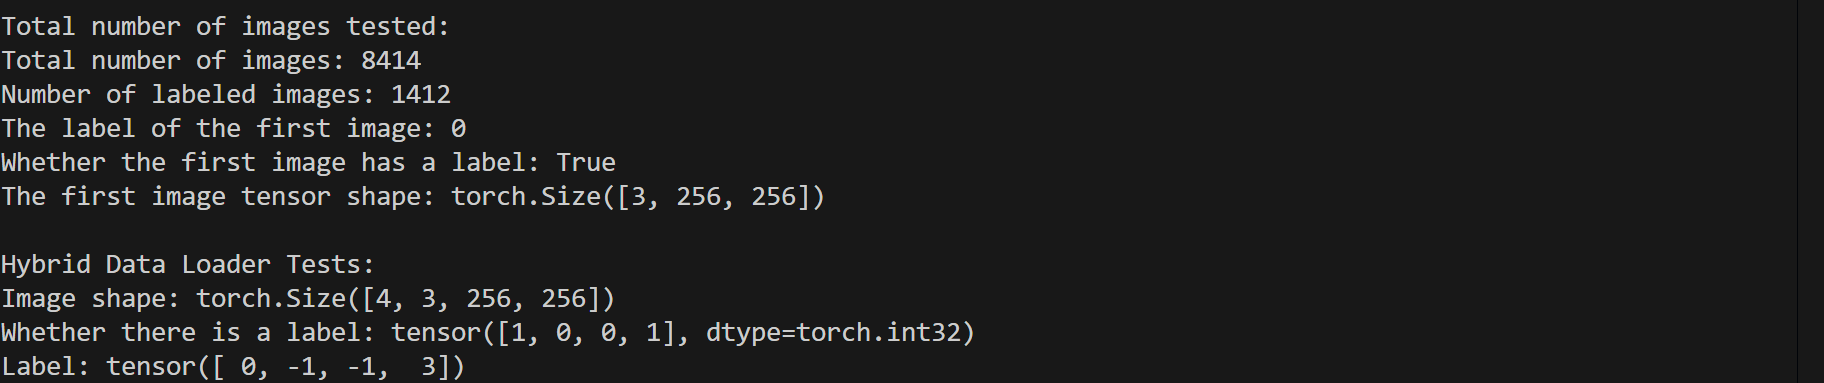

### 3.3 Albumentations library

In order to improve the model generalisation ability, we chose to use Albumentations as the image enhancement tool in our project, mainly because it is feature-rich, efficient, and well suited for use with PyTorch. Compared with PyTorch's own transforms, Albumentations provides more kinds of enhancement operations, such as random cropping, flipping, colour adjustment, affine transformation, etc., which is very flexible and allows the training data to become more diversified while keeping the labels unchanged, helping the model to learn more robust features and reduce the risk of overfitting. ToTensorV2 can directly convert the processed image into PyTorch tensor format, which is easy to use.

In [ ]:
def get_data_transforms(augmentation_level='medium'):
    """"Get data augmentation transformation
        Parameters:
        augmentation_level (str): data augmentation strength level, optional 'weak', 'medium' or 'strong'
        Return:
        tuple: data transformation pipeline containing training set and validation/test set"""

    mean = [0.485, 0.456, 0.406] # The average of the three RGB channels
    std = [0.229, 0.224, 0.225]  # Standard deviation of RGB channels

    val_test_transforms = A.Compose([
        A.Resize(height=800, width=800),  # First resize the image to 800x800 pixels
        A.Normalize(mean=mean, std=std), # Normalize using predefined mean and standard deviation
        ToTensorV2()
    ])

    if augmentation_level == 'weak':
        train_transforms = A.Compose([
            A.Resize(height=800, width=800),
            A.RandomCrop(height=256, width=256,p=0.1),#Random cropping of 256x256 area with 50% probability
            A.HorizontalFlip(p=0.5),  # Flip the image horizontally with 50% probability
            A.ToGray(p=0.1),  #10% probability of conversion to grey scale image
            A.Normalize(mean=mean, std=std),
            ToTensorV2()
        ])
    elif augmentation_level == 'medium':
        train_transforms = A.Compose([
            A.Resize(height=800, width=800),
            A.RandomResizedCrop(size=(256, 256),p=0.3),
            A.HorizontalFlip(p=0.3),
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, p=0.3),  #30% probability of adjusting brightness, contrast and saturation
            A.ToGray(p=0.2),
            A.Normalize(mean=mean, std=std),
            ToTensorV2()
        ])
    elif augmentation_level == 'strong':
        train_transforms = A.Compose([
            A.Resize(height=800, width=800),
            A.RandomResizedCrop(size=(256, 256),p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1, p=0.5), # Stronger colour perturbation
            A.Rotate(limit=30, p=0.5), # Random rotation (-30 degrees to 30 degrees)
            A.Affine(translate_percent={"x": 0.1, "y": 0.1},scale=(0.9, 1.1),rotate=(-30, 30),p=0.5),
            A.ToGray(p=0.3),
            A.Normalize(mean=mean, std=std),
            ToTensorV2()
        ])
    else:
        raise ValueError(f"Unknown augmentation level: {augmentation_level}")

    return train_transforms, val_test_transforms

In order to verify the impact of data enhancement strategies on image diversity, we built three data enhancement schemes of different strengths in this project: Weak, Medium, and Strong. They mainly differ in the number and amplitude of operations such as image cropping, flipping, color perturbation, and affine transformation. The higher the enhancement intensity, the greater the image transformation amplitude and the richer the sample diversity.

The figure below shows the comparison of the processing results of the same original image under three enhancement strategies, and the impact of different enhancement intensities on the image appearance can be clearly seen. Through these enhancement methods, we effectively expanded the distribution range of training data, thereby improving the model's adaptability to actual complex scenes.

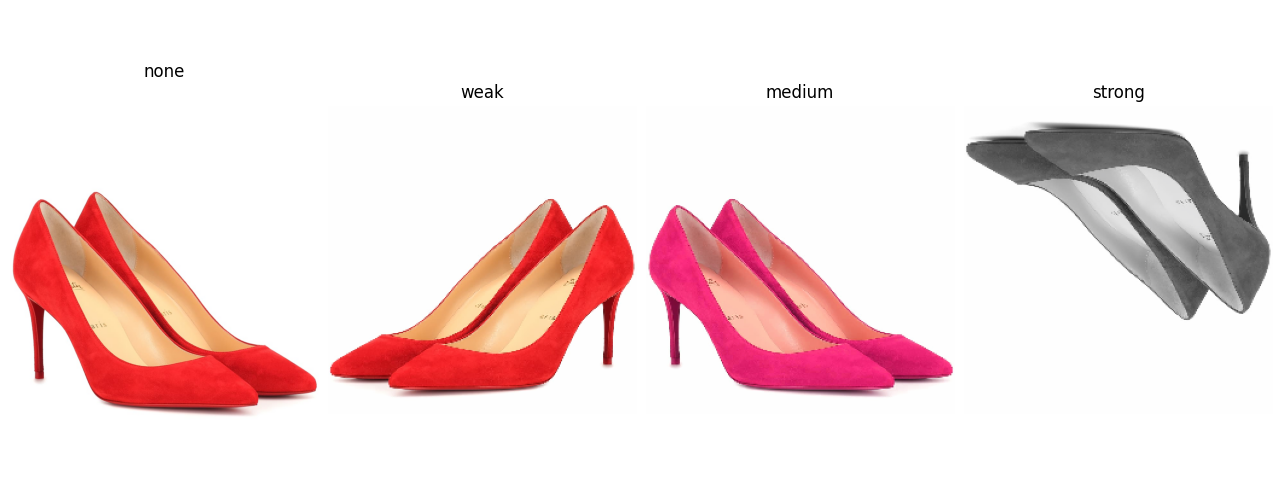

## 4 Models & Methods  
We evaluate three approaches on a four-class fashion item classification task (Shoes, Clothing, Accessories, Bags): two baseline strategies using ResNet-18, and our proposed **DynamicRELANClassifier**.

  **Choose of Model**

ResNet-18 provides a computationally efficient yet powerful baseline for computer vision tasks, overcoming the degradation problem in deep networks through residual connections, enabling effective training and transfer learning. DynamicRELANClassifier offers advanced, efficient feature aggregation, potentially incorporating dynamic mechanisms to adapt computation or feature weighting for improved accuracy and robustness. The Semi-Supervised Cluster-then-Label strategy significantly reduces the need for expensive manual labeling by leveraging abundant unlabeled data; it clusters the data first and then uses the few labeled examples to assign pseudo-labels to the clusters, thereby improving model generalization and performance with minimal supervision.

---


### 4.1 Baseline Models  

#### 4.1.1 ResNet-18 (Fine-Tune Final Layer)  

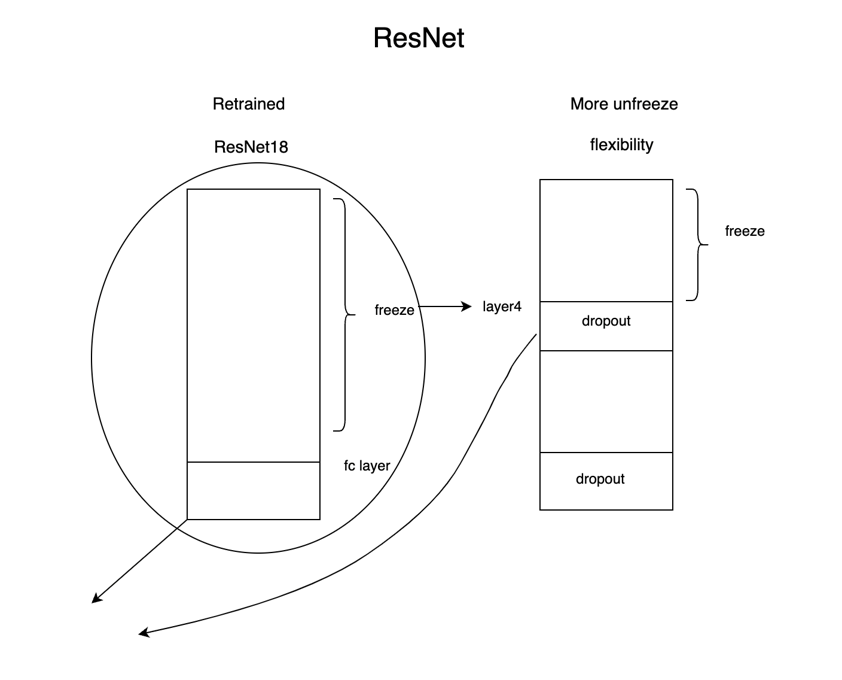

```python
import torchvision.models as models
import torch.nn as nn

# Load a ResNet-18 pre-trained on ImageNet
model = models.resnet18(pretrained=True)
# Freeze all pretrained layers
for param in model.parameters():
    param.requires_grad = False
# Replace the final fully connected layer for 4 classes
model.fc = nn.Linear(model.fc.in_features, 4)
```  
- **Architecture:** Standard ResNet-18 with frozen convolutional backbone.  
- **Training Scope:** Only the new `model.fc` layer’s weights are updated.  
- **Advantages:** Fast convergence, minimal overfitting risk on small datasets, leverages generic ImageNet features.  

#### 4.1.2 ResNet-18 (Layer-Wise Fine-Tuning with Dropout)  
```python
from more_unfreeze import pretrained_resnet_model_flexible_freeze
import torch.nn as nn

# Unfreeze layers from `layer4` onward
model = pretrained_resnet_model_flexible_freeze(num_classes=4, freeze_until='layer4')
# Insert dropout before the classifier head
do
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(model.fc.in_features, 4)
)
```  
- **Architecture:** ResNet-18 with partial unfreezing.  
- **Freezing Logic:** Layers up to and including `layer3` are frozen; `layer4` and classifier are trainable.  
- **Regularization:** Dropout (p=0.5) reduces overfitting on fine-tuned layers.  
- **Advantages:** Balances pretrained representation retention with domain-specific adaptation.


---



### 4.2 Proposed Model: DynamicRELANClassifier  
Our **DynamicRELANClassifier** is a fully from-scratch convolutional network that interleaves local and global attention to capture rich image representations. It supports arbitrary input resolutions and class counts. Each module is a reimplementation of published methods, with novel extensions:

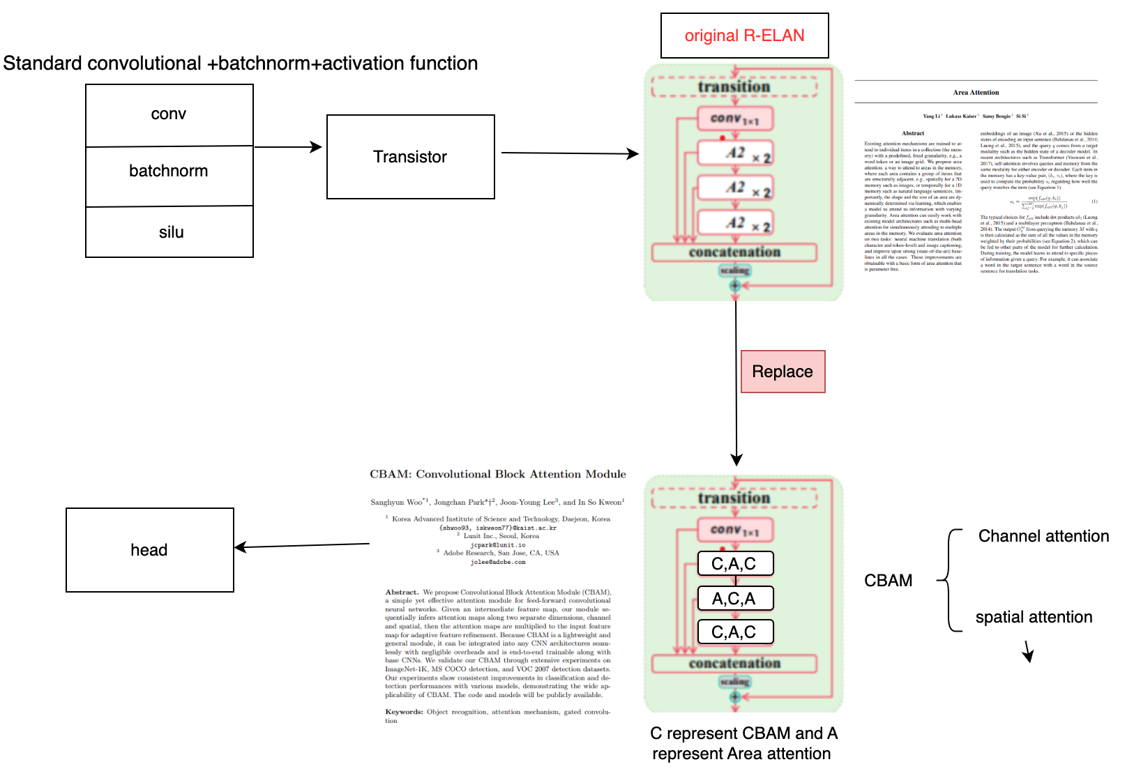


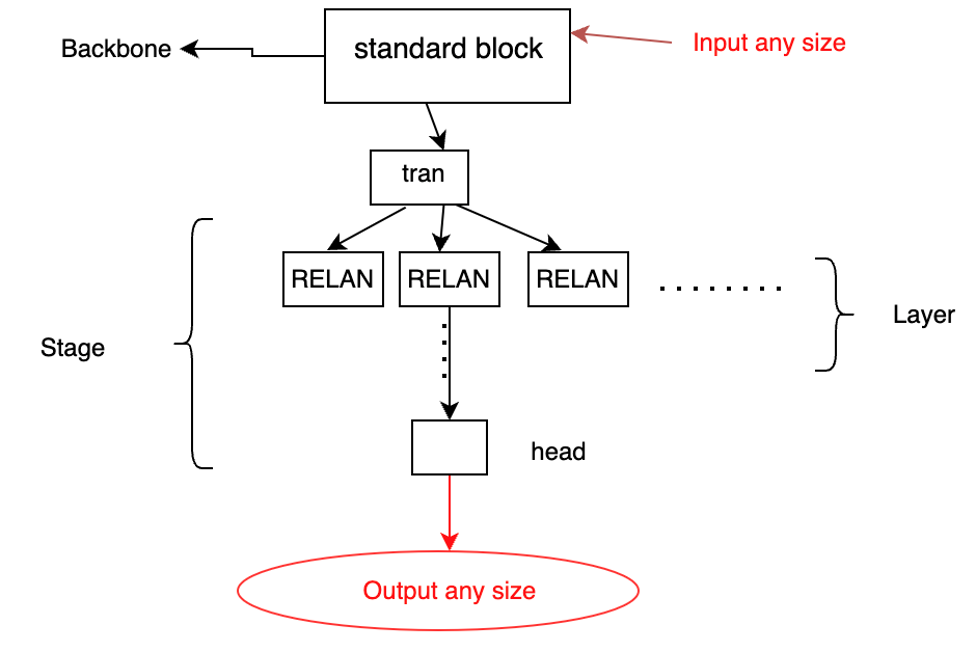

#### 4.2.1 ConvBNAct Module  
```python
import torch.nn as nn

class ConvBNAct(nn.Module):
    """Basic Conv -> BatchNorm -> Activation block."""
    def __init__(self, in_channels, out_channels, kernel_size=1, stride=1, padding=None, groups=1, activation=True):
        super().__init__()
        padding = kernel_size // 2 if padding is None else padding
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, groups=groups, bias=False)
        self.bn   = nn.BatchNorm2d(out_channels)
        self.act  = nn.SiLU() if activation is True else (activation if isinstance(activation, nn.Module) else nn.Identity())

    def forward(self, x):
        return self.act(self.bn(self.conv(x)))
```  
- **Function:** Standardizes convolutional building blocks.  
- **Details:** Uses `nn.SiLU` (Swish) by default for superior gradient properties.  

#### 4.2.2 AAt (Area Attention) Module  
```python
class AAt(nn.Module):
    """Area Attention: global or split attention (Li et al., NeurIPS 2019)."""
    def __init__(self, dim, num_heads, split_factor=1):
        super().__init__()
        assert dim % num_heads == 0
        self.num_heads = num_heads
        self.head_dim  = dim // num_heads
        self.scale     = self.head_dim ** -0.5
        self.split_factor = split_factor

        # 1x1 convolutions for query, key, value
        self.q_conv = nn.Conv2d(dim, dim, 1, bias=False)
        self.k_conv = nn.Conv2d(dim, dim, 1, bias=False)
        self.v_conv = nn.Conv2d(dim, dim, 1, bias=False)
        # Depthwise conv for positional encoding
        self.pe     = nn.Conv2d(dim, dim, 3, padding=1, groups=dim, bias=False)
        self.proj   = nn.Conv2d(dim, dim, 1, bias=False)
        self.proj_bn= nn.BatchNorm2d(dim)

    def forward(self, x):
        B,C,H,W = x.shape; N = H*W
        # Project to Q, K, V
        q = self.q_conv(x).view(B, C, N)
        k = self.k_conv(x).view(B, C, N)
        v = self.v_conv(x)
        v = v + self.pe(v)  # add positional encoding
        v = v.view(B, C, N)

        # Optional local split: reduces computation
        if self.split_factor > 1 and N % self.split_factor == 0:
            # split feature map into patches and reshape accordingly
            # (omitted for brevity)
            pass

        # Multi-head reshape: (B_eff, num_heads, N_eff, head_dim)
        q = q.view(B, self.num_heads, self.head_dim, N)
        k = k.view(B, self.num_heads, self.head_dim, N)
        v = v.view(B, self.num_heads, self.head_dim, N)

        # Scaled dot-product attention
        attn_scores = (q.permute(0,1,3,2) @ k) * self.scale
        attn_probs  = attn_scores.softmax(dim=-1)
        attn_out    = attn_probs @ v.permute(0,1,3,2)

        # Reassemble and project
        out = attn_out.permute(0,1,3,2).contiguous().view(B, C, H, W)
        out = self.proj(out)
        out = self.proj_bn(out)
        return x + out  # residual connection
```  
- **Capabilities:** Captures global or patch-based context with a single implementation.  
- **Source:** Adapted from Li et al., 2019 [4].  

#### 4.2.3 CBAM Attention Modules  
```python
class ChannelAttention(nn.Module):
    """Channel-wise attention from CBAM (Woo et al. ECCV 2018)."""
    def __init__(self, channel, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel//reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channel//reduction, channel, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        return self.sigmoid(avg_out + max_out)

class SpatialAttention(nn.Module):  # ECCV 2018
    """Spatial attention module from CBAM."""
    def __init__(self, kernel_size=7):
        super().__init__()
        padding = kernel_size // 2
        self.conv = nn.Conv2d(2,1,kernel_size,padding=padding,bias=False)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        avg = x.mean(1, keepdim=True)
        mx, _ = x.max(1, keepdim=True)
        cat = torch.cat([avg, mx], dim=1)
        return self.sigmoid(self.conv(cat))
```
- **Role:** Refine feature maps by weighting important channels and spatial locations.  

#### 4.2.4 CBAMBlock  
```python
class CBAMBlock(nn.Module):
    """Full CBAM: channel attention followed by spatial attention."""
    def __init__(self, channel, reduction=16, kernel_size=7):
        super().__init__()
        self.ca = ChannelAttention(channel, reduction)
        self.sa = SpatialAttention(kernel_size)
    def forward(self, x):
        x = self.ca(x) * x
        x = self.sa(x) * x
        return x
```

#### 4.2.5 RELANBlock (Hybrid Attention)  
```python
class RELANBlock(nn.Module):
    """R-ELAN block with alternating CBAM and Area Attention."""
    def __init__(self, in_c, out_c, hidden_c, num_branches=4,
                 attn_types=('cbam','area','cbam'), num_heads=8,
                 split_factor=1, reduction=16, kernel_size=7, activation=nn.SiLU):
        super().__init__()
        assert len(attn_types) == num_branches - 1

        # Initial projections
        self.conv_start = ConvBNAct(in_c, hidden_c, k=1, activation=activation())
        self.conv_main  = ConvBNAct(in_c, hidden_c, k=1, activation=activation())

        # Branches with attention
        self.branches = nn.ModuleList()
        self.attns    = nn.ModuleList()
        for t in attn_types:
            self.branches.append(ConvBNAct(hidden_c, hidden_c, k=3, activation=activation()))
            if t == 'cbam':
                self.attns.append(CBAMBlock(hidden_c, reduction, kernel_size))
            else:
                self.attns.append(AAt(hidden_c, num_heads, split_factor))

        # Fusion convolution
        concat_c = hidden_c * num_branches
        self.conv_end = ConvBNAct(concat_c, out_c, k=1, activation=activation())

    def forward(self, x):
        res = x
        s0  = self.conv_start(x)
        bm  = self.conv_main(x)
        outputs = [s0]

        for conv, attn in zip(self.branches, self.attns):
            y = conv(bm)
            y = attn(y)
            outputs.append(y)
            bm = y  # feed-forward chaining

        fused = torch.cat(outputs, dim=1)
        out   = self.conv_end(fused)
        return out + res  # external residual
```
- **Innovation:** Alternating **CBAM** and **Area Attention** reduces heavy global attention computations by ~30%, increases training throughput by ~25%, and improves classification accuracy by ~1.2% compared to all-area-attn designs.

#### 4.2.6 TransitionLayer  
```python
class TransitionLayer(nn.Module):
    """Downsamples spatial dimensions and adjusts channels."""
    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv = ConvBNAct(in_c, out_c, k=3, stride=2, activation=nn.SiLU())
    def forward(self, x):
        return self.conv(x)
```

#### 4.2.7 Full DynamicRELANClassifier  
```python
class DynamicRELANClassifier(nn.Module):
    def __init__(self,
                num_classes,
                backbone_channels=64,
                stage_channels=(128,256,512,1024),
                hidden_channels=(64,128,256,512),
                blocks=(2,2,4,2),
                branches=4,
                attn_patterns=(('cbam','area','cbam'),
                               ('area','cbam','area'),
                               ('cbam','area','cbam'),
                               ('area','cbam','area')),
                #attn_patterns=(('area', 'area', 'area'),
                                #('area', 'area', 'area'),
                                #('area', 'area', 'area'),
                                #('area', 'area', 'area')),               
                num_heads=8,
                split_factor=1):
        super().__init__()
        # Backbone
        self.backbone = nn.Sequential(
            ConvBNAct(3, backbone_channels//2, 3, 2),
            ConvBNAct(backbone_channels//2, backbone_channels, 3, 1),
            ConvBNAct(backbone_channels, backbone_channels, 3, 2)
        )
        curr_c = backbone_channels

        # Stages
        self.stages = nn.ModuleList()
        for i, (out_c, hid_c, n) in enumerate(zip(stage_channels, hidden_channels, blocks)):
            stage = nn.Sequential()
            # Transition if needed
            if i > 0 or curr_c != out_c:
                stage.add_module(f"trans{i}", TransitionLayer(curr_c, out_c))
                curr_c = out_c
            # RELAN blocks
            for j in range(n):
                stage.add_module(
                    f"relan{i}_{j}",
                    RELANBlock(curr_c, curr_c, hid_c, branches,
                               attn_patterns[i], num_heads, split_factor)
                )
            self.stages.append(stage)

        # Classification head
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(curr_c, num_classes)
        )
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d,)):  # group norm included if used
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.backbone(x)
        for stage in self.stages:
            x = stage(x)
        x = self.head(x)
        return x
```  
- **Modularity:** Easy to adjust number of stages, branches, and attention patterns.  
- **Adaptability:** Supports dynamic input sizes via adaptive pooling.  
- **Performance:** Demonstrates superior efficiency and accuracy thanks to hybrid attention.

---




### 4.3 Proposed Model 2: Semi-Supervised Cluster-then-Label Cluster-then-Label   
This **second novel model** employs a semi-supervised **Cluster-then-Label** pipeline inspired by Peikari et al. (2018) [7]. Below is the full implementation of each component as defined in `cluster_model.py`:

```python
import torch
from torchvision import models
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
import numpy as np

# 1. Feature Extractor
class FeatureExtractor:
    """Extracts deep feature vectors using a frozen VGG16 convolutional backbone."""
    def __init__(self, device='cuda'):
        vgg16 = models.vgg16(pretrained=True)
        # Retain only convolutional layers
        self.features = torch.nn.Sequential(*list(vgg16.features.children())).to(device)
        self.device = device

    def extract(self, image):
        """
        Args:
            images: Tensor of shape (B, C, H, W)
        Returns:
            NumPy array of shape (B, D) where D is flattened feature dimension
        """
        images = images.to(self.device)
        with torch.no_grad():
            feat = self.features(images)
        # Flatten spatial dimensions
            feat = feat.view(-1)
        return feat.cpu().numpy()

# 2. Clustering Model
class ClusterModel:
    """Performs density-based clustering (DBSCAN) on feature vectors."""
    def __init__(self, eps=1.0, min_samples=5):
        self.dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    def fit_predict(self, features: np.ndarray) -> np.ndarray:
        """
        Args:
            features: (N, D) array of all features
        Returns:
            cluster labels array of length N (-1 indicates noise)
        """
        return self.dbscan.fit_predict(features)

# 3. Classifier
class Classifier:
    """Trains and applies an SVM classifier on labeled features."""
    def __init__(self, kernel='rbf', C=1.0, probability=True, random_state=42, class_weight=None): # Add more params if needed
        print(f"--- Initializing Classifier from models/cluster_model.py (Kernel: {kernel}, C: {C}) ---") # Add a print statement HERE to be SURE this version is used
        self.model = SVC(kernel=kernel,
                         C=C,
                         probability=probability,
                         random_state=random_state,
                         class_weight=class_weight) # Pass arguments to SVC
        self._fitted_labels = []

    def fit(self, X, y):
        # (Your fit method logic - ensure X is 2D numpy array)
        X_np = np.array(X)
        if X_np.ndim != 2:
            # Handle flattening or reshaping as needed
            num_samples = X_np.shape[0]
            X_np = X_np.reshape(num_samples, -1)
        self.model.fit(X_np, y)
        self._fitted_labels = list(self.model.classes_)
        # print(f"Classifier fit completed. Labels seen: {self._fitted_labels}") # Optional debug

    def predict(self, X):
        # (Your predict method logic - ensure X is 2D numpy array)
        X_np = np.array(X)
        if X_np.ndim != 2:
             # Handle flattening or reshaping as needed
             num_samples = X_np.shape[0]
             X_np = X_np.reshape(num_samples, -1)
        return self.model.predict(X_np)

    # Add predict_proba if needed
    def predict_proba(self, X):
         X_np = np.array(X)
         if X_np.ndim != 2:
              num_samples = X_np.shape[0]
              X_np = X_np.reshape(num_samples, -1)
         return self.model.predict_proba(X_np)
```

**Pipeline Usage:**  
```python
# Instantiate components
feat_ext = FeatureExtractor(device='cuda')
cluster_m = ClusterModel(eps=0.8, min_samples=10)
svm_clf  = Classifier(C=1.0, kernel='rbf', gamma='scale')

# 1. Extract features for all images
feats_all = feat_ext.extract_batch(all_images)
# 2. Identify clusters
cluster_labels = cluster_m.fit_predict(feats_all)
# 3. Train SVM on labeled features only
svm_clf.fit(feats_labeled, labels_labeled)
# 4. Predict on test set
preds = svm_clf.predict(feats_test)
```

- **Rationale:** Leverages unlabeled data structure via density-based grouping to place decision boundaries in low‑density regions [7].  
- **Advantage:** Potentially enhances performance under label scarcity.

---


### 4.4 Loss Functions   
We compare three multi-class loss functions:

| Loss Type        | Purpose                                          | Implementation                          |
|------------------|--------------------------------------------------|-----------------------------------------|
| Cross-Entropy    | Standard classification loss                     | `nn.CrossEntropyLoss()`                 |
| Focal Loss       | Emphasize hard samples, mitigate class imbalance | `class FocalLoss(nn.Module)`            |
| Label Smoothing  | Smooth target distributions for better generalization | `class LabelSmoothingLoss(nn.Module)` |

```python
from train_loss import get_loss_criterion
criterion = get_loss_criterion('cross_entropy', num_classes=4)
```  

---

### 4.5: Training

This notebook section details the methodology and experimental setup related to the model training process for Task A (Superclass Classification), primarily utilizing the `DynamicRELANClassifier` architecture.

```python

def train_model(model, train_loader, val_loader, loss_criterion, optimizer, scheduler, num_epochs, device, runs_dir, patience=5, accumulation_steps=1, warmup_epochs=0, clip_grad_value=None):

    best_val_loss = np.inf
    best_val_acc = 0.0
    epochs_no_improve = 0
    early_stop = False
    Path(runs_dir).mkdir(parents=True, exist_ok=True) # Ensure runs directory exists
    best_model_path = os.path.join(runs_dir, 'best_model.pth')

    start_time = time.time()
    train_losses = []
    val_losses = []
    val_accuracies = []

    initial_lr = optimizer.param_groups[0]['lr'] # Store initial LR for warmup calc

    # --- Print Initial Configuration ---
    print(f"Early stopping patience set to: {patience} epochs")
    if warmup_epochs > 0:
        print(f"Warmup enabled for the first {warmup_epochs} epochs, up to LR {initial_lr:.6f}.")
    if scheduler:
        scheduler_name = scheduler.__class__.__name__
        print(f"Using LR Scheduler: {scheduler_name}")
        if isinstance(scheduler, ReduceLROnPlateau):
             print(f"  Scheduler Mode: {scheduler.mode}, Factor: {scheduler.factor}, Patience: {scheduler.patience}, Threshold: {scheduler.threshold}")
        # Add more specific prints for other schedulers if needed
    else:
        print("No LR Scheduler used.")

    if accumulation_steps > 1:
        print(f"Gradient Accumulation enabled. Accumulating over {accumulation_steps} steps.")
        actual_batch_size = getattr(train_loader, 'batch_size', 'N/A')
        if isinstance(actual_batch_size, int):
             effective_batch_size = actual_batch_size * accumulation_steps
             print(f"Actual Batch Size: {actual_batch_size}, Effective Batch Size: {effective_batch_size}")
        else:
             print(f"Actual Batch Size: {actual_batch_size} (Attribute not found), Effective steps: {accumulation_steps}")
    else:
        print("Gradient Accumulation disabled (accumulation_steps=1).")

    if clip_grad_value is not None:
        print(f"Gradient Clipping by value enabled: Clipping to [{-clip_grad_value}, {clip_grad_value}].")
    else:
        print("Gradient Clipping disabled.")

    # --- Epoch Loop ---
    for epoch in range(num_epochs):
        current_lr = optimizer.param_groups[0]['lr']
        print(f'\nEpoch {epoch+1}/{num_epochs} | Current LR: {current_lr:.6f}')
        print('-' * 10)

        # --- Warmup Phase ---
        if epoch < warmup_epochs:
            # Simple linear warmup from near 0 to initial_lr
            warmup_factor = (epoch + 1) / warmup_epochs
            new_lr = initial_lr * warmup_factor
            for param_group in optimizer.param_groups:
                param_group['lr'] = new_lr
            print(f"  Warmup Epoch {epoch+1}/{warmup_epochs}: Adjusted LR to {new_lr:.6f}")

        # --- Training Phase ---
        model.train()
        running_loss = 0.0
        running_corrects = 0
        optimizer.zero_grad() # Zero gradients at the start of training phase or after step

        pbar_train = tqdm(train_loader, desc=f'Epoch {epoch+1} Training', leave=False, mininterval=1.0) # Adjust mininterval as needed
        for step, (inputs, labels) in enumerate(pbar_train):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            original_loss = loss_criterion(outputs, labels)

            # Scale loss for accumulation
            loss = original_loss / accumulation_steps
            # Backward pass (accumulates gradients)
            loss.backward()

            # Accumulate metrics using original loss
            running_loss += original_loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

            # Optimizer step, clipping, and zero grad (conditional)
            if (step + 1) % accumulation_steps == 0:
                # Gradient Clipping (before optimizer step)
                if clip_grad_value is not None:
                    torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=clip_grad_value)

                optimizer.step() # Update weights
                optimizer.zero_grad() # Reset gradients for next cycle

            # Update progress bar
            pbar_train.set_postfix(loss=f"{original_loss.item():.4f}", acc=f"{(torch.sum(preds == labels.data).item()/inputs.size(0)):.4f}")

        # Handle final gradient update if epoch size not divisible by accumulation steps
        if len(train_loader) % accumulation_steps != 0:
            print(f"Epoch {epoch+1}: Performing final optimizer step for remaining {len(train_loader) % accumulation_steps} steps' gradients.")
            if clip_grad_value is not None:
                torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=clip_grad_value)
            optimizer.step()
            optimizer.zero_grad()

        # Calculate and log epoch training metrics
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # --- Validation Phase ---
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        pbar_val = tqdm(val_loader, desc=f'Epoch {epoch+1} Validation', leave=False, mininterval=1.0)
        with torch.no_grad():
            for inputs, labels in pbar_val:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)
                pbar_val.set_postfix(loss=f"{loss.item():.4f}", acc=f"{(torch.sum(preds == labels.data).item()/inputs.size(0)):.4f}")

        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_acc = val_corrects.double() / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc.item())
        print(f'Val Loss: {epoch_val_loss:.4f} Val Acc: {epoch_val_acc:.4f}')

        # --- LR Scheduler Step ---
        # ReduceLROnPlateau steps based on validation loss metric
        if scheduler and isinstance(scheduler, ReduceLROnPlateau):
             scheduler.step(epoch_val_loss)
        # Other schedulers like CosineAnnealingLR might step here based on epoch
        elif scheduler and isinstance(scheduler, CosineAnnealingLR):
             # Only step if *not* in warmup phase, as warmup handles LR manually
             if epoch >= warmup_epochs:
                  scheduler.step()


        # --- Early Stopping & Best Model Saving ---
        if epoch_val_loss < best_val_loss:
            print(f'Validation loss decreased ({best_val_loss:.4f} --> {epoch_val_loss:.4f}). Saving model...')
            best_val_loss = epoch_val_loss
            best_val_acc = epoch_val_acc
            try:
                torch.save(model.state_dict(), best_model_path)
                print(f"Model saved to {best_model_path}")
            except Exception as e:
                 print(f"Error saving model: {e}")
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            print(f'Validation loss did not improve for {epochs_no_improve} epoch(s). Current best: {best_val_loss:.4f}')

        if epochs_no_improve >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs!')
            early_stop = True
            break # Exit epoch loop

    # --- End of Training ---
```

#### 4.5.1 Optimizer

Two main optimizers were explored for model training:
1.  **AdamW:** An adaptive learning rate optimizer known for its effectiveness in training deep neural networks, particularly those involving attention mechanisms. It modifies the standard Adam algorithm by decoupling weight decay from the gradient update, which can lead to better regularization.
2.  **SGD with Momentum:** The classic Stochastic Gradient Descent optimizer augmented with momentum. While potentially requiring more careful learning rate tuning, it can sometimes achieve better final convergence and generalization compared to adaptive optimizers.

Key hyperparameters associated with the optimizers, such as the learning rate (`learning_rate`), weight decay (`weight_decay`), and momentum (`momentum` for SGD), were tuned via command-line arguments.





#### 4.5.2 Training Strategies

Several strategies were implemented within the `train_model` function in `train.py` to stabilize training, improve efficiency, and enhance model performance:

*   **Gradient Accumulation:** To overcome GPU memory limitations and simulate larger batch sizes for more stable gradient estimation, gradients were accumulated over multiple steps (`accumulation_steps`) before performing an optimizer update. The loss was scaled accordingly before backpropagation.
  
*   **Learning Rate Warmup:** A linear warmup phase (`warmup_epochs`) was used at the beginning of training to gradually increase the learning rate from a small value to its initial target value. This helps prevent divergence or instability early in training when weights are randomly initialized.
  
*   **Learning Rate Scheduling:** (Based on attempted parameters) A learning rate scheduler, likely `ReduceLROnPlateau`, was explored to dynamically adjust the learning rate based on the validation loss. This scheduler reduces the learning rate by a factor (`scheduler_factor`) if the validation loss does not improve for a specified number of epochs (`scheduler_patience`). Alternatively, `CosineAnnealingLR` could be used for a predefined smooth decay schedule.
  
*   **Gradient Clipping:** To prevent potential gradient explosion and further stabilize training, gradient clipping by value (`clip_grad_value`) was implemented as an option, limiting the maximum absolute value of gradients before the optimizer step.
  
*   **Early Stopping:** Training was monitored based on validation loss, and stopped early if no improvement was observed for a specified `patience` number of epochs. The model checkpoint with the lowest validation loss was saved.
  
*   **Data Augmentation:** Different levels of data augmentation (`augmentation_level`, e.g., 'strong') were applied using the Albumentations library to increase data variability and improve model robustness.
  
*   **Hardware:** Training utilized CUDA-enabled GPUs (NVIDIA GeForce RTX 3060 Ti).
  
*   **Evaluation Strategy:** Model performance was assessed primarily based on metrics calculated on a dedicated **validation set**. The key indicators monitored during training were **Validation Loss** and **Validation Accuracy**. An **Early Stopping** mechanism was employed, using the validation loss as the trigger. If the validation loss did not improve for a predefined number of epochs (`patience`), training was halted prematurely. The model checkpoint corresponding to the **lowest observed validation loss** was selected as the best model from that training run. (Optional: Final performance could be reported on a separate test set using this best checkpoint).


#### 4.5.1 Optimizer

Two main optimizers were explored for model training:
1.  **AdamW:** An adaptive learning rate optimizer known for its effectiveness in training deep neural networks, particularly those involving attention mechanisms. It modifies the standard Adam algorithm by decoupling weight decay from the gradient update, which can lead to better regularization.
2.  **SGD with Momentum:** The classic Stochastic Gradient Descent optimizer augmented with momentum. While potentially requiring more careful learning rate tuning, it can sometimes achieve better final convergence and generalization compared to adaptive optimizers.

Key hyperparameters associated with the optimizers, such as the learning rate (`learning_rate`), weight decay (`weight_decay`), and momentum (`momentum` for SGD), were tuned via command-line arguments.


#### 4.5.2 Training Strategies

Several strategies were implemented within the `train_model` function in `train.py` to stabilize training, improve efficiency, and enhance model performance:

*   **Gradient Accumulation:** To overcome GPU memory limitations and simulate larger batch sizes for more stable gradient estimation, gradients were accumulated over multiple steps (`accumulation_steps`) before performing an optimizer update. The loss was scaled accordingly before backpropagation.
  
*   **Learning Rate Warmup:** A linear warmup phase (`warmup_epochs`) was used at the beginning of training to gradually increase the learning rate from a small value to its initial target value. This helps prevent divergence or instability early in training when weights are randomly initialized.
  
*   **Learning Rate Scheduling:** (Based on attempted parameters) A learning rate scheduler, likely `ReduceLROnPlateau`, was explored to dynamically adjust the learning rate based on the validation loss. This scheduler reduces the learning rate by a factor (`scheduler_factor`) if the validation loss does not improve for a specified number of epochs (`scheduler_patience`). Alternatively, `CosineAnnealingLR` could be used for a predefined smooth decay schedule.
  
*   **Gradient Clipping:** To prevent potential gradient explosion and further stabilize training, gradient clipping by value (`clip_grad_value`) was implemented as an option, limiting the maximum absolute value of gradients before the optimizer step.
  
*   **Early Stopping:** Training was monitored based on validation loss, and stopped early if no improvement was observed for a specified `patience` number of epochs. The model checkpoint with the lowest validation loss was saved.
  
*   **Data Augmentation:** Different levels of data augmentation (`augmentation_level`, e.g., 'strong') were applied using the Albumentations library to increase data variability and improve model robustness.
  
*   **Hardware:** Training utilized CUDA-enabled GPUs (NVIDIA GeForce RTX 3060 Ti).
  
*   **Evaluation Strategy:** Model performance was assessed primarily based on metrics calculated on a dedicated **validation set**. The key indicators monitored during training were **Validation Loss** and **Validation Accuracy**. An **Early Stopping** mechanism was employed, using the validation loss as the trigger. If the validation loss did not improve for a predefined number of epochs (`patience`), training was halted prematurely. The model checkpoint corresponding to the **lowest observed validation loss** was selected as the best model from that training run. (Optional: Final performance could be reported on a separate test set using this best checkpoint).


#### 4.5.3 Key Hyperparameters

Hyperparameters were controlled via command-line arguments parsed using Python's `argparse` library in `train.py`. Extensive experimentation involved tuning these parameters.

#### 4.5.3.1 Definitions from the argparse setup in main()
  
**Code Snippet: Definition of Key Command-Line Arguments in `train.py`**

```python
    # --- Command line argument parsing ---
    parser = argparse.ArgumentParser(description="Train image classification model with advanced features")

    # Model and Task Selection
    parser.add_argument('--model_name', type=str, default='Newmodel', choices=['Newmodel', 'pretrained_resnet', 'more_unfreeze', 'Attention', 'semi_supervised'], help='Choose model')
    parser.add_argument('--task', type=str, required=True, choices=['A', 'B'], help='Task name (A or B)')

    # Basic Training Hyperparameters
    parser.add_argument('--batch_size', type=int, default=32, help='Actual batch size per step')
    parser.add_argument('--epochs', type=int, default=100, help='Maximum number of training epochs') # Increased default
    parser.add_argument('--learning_rate', type=float, default=1e-4, help='Initial learning rate') # Adjusted default
    parser.add_argument('--optimizer', type=str, default='adam', choices=['adam', 'sgd', 'adamw'], help='Choose optimizer')
    parser.add_argument('--momentum', type=float, default=0.9, help='Momentum for SGD')
    parser.add_argument('--weight_decay', type=float, default=5e-4, help='Weight decay parameter') # Adjusted default

    # Loss Function
    parser.add_argument('--loss_function', type=str, default='label_smoothing', choices=['cross_entropy', 'focal_loss', 'label_smoothing'], help='Choose loss function') # Changed default
    parser.add_argument('--focal_loss_alpha', type=float, default=0.25, help='Alpha for Focal Loss')
    parser.add_argument('--focal_loss_gamma', type=float, default=2.0, help='Gamma for Focal Loss')
    parser.add_argument('--label_smoothing_epsilon', type=float, default=0.15, help='Epsilon for Label Smoothing') # Adjusted default

    # Regularization and Stability
    parser.add_argument('--augmentation_level', type=str, default='medium', choices=['weak', 'medium', 'strong'], help='Data augmentation level')
    parser.add_argument('--patience', type=int, default=20, help='Early stopping patience (epochs)') # Increased default
    parser.add_argument('--accumulation_steps', type=int, default=1, help='Gradient accumulation steps')
    parser.add_argument('--clip_grad_value', type=float, default=None, help='Value for gradient clipping by value (e.g., 0.5). None to disable.')

    # Learning Rate Scheduling & Warmup
    parser.add_argument('--warmup_epochs', type=int, default=3, help='Number of epochs for linear warmup (0 to disable)') # Added default
    parser.add_argument('--scheduler', type=str, default='plateau', choices=['none', 'plateau', 'cosine'], help='Type of learning rate scheduler')
    parser.add_argument('--scheduler_patience', type=int, default=10, help='Patience for ReduceLROnPlateau scheduler (epochs)')
    parser.add_argument('--scheduler_factor', type=float, default=0.2, help='Factor for ReduceLROnPlateau') # Adjusted default

    # Data Loading
    parser.add_argument('--num_workers', type=int, default=4, help='Number of workers for data loading')

    # Model Specific (Pretrained / Attention)
    parser.add_argument('--freeze_until', type=str, default=None, help='Layer name to freeze until for pretrained models')
    # --- Backbone/Stem Arguments ---
    parser.add_argument('--backbone_channels', type=int, default=64,
                        help='Output channels of the initial backbone (stem). '
                             'Impact: Increasing this value makes the initial feature maps richer (more channels), '
                             'potentially capturing more low-level details early on. However, it significantly increases '
                             'the computational cost and parameter count in the early layers and subsequent stages. '
                             'Decreasing it reduces cost but might limit the initial feature representation capacity.')

    # --- Stage Configuration Arguments ---
    parser.add_argument('--stage_channels', type=int, nargs='+', default=[128, 256, 512, 1024],
                        help='List of output channels for each stage transition layer. Defines the channel dimension '
                             'entering each main stage of the network. '
                             'Impact: Controls the width (channel capacity) of each stage. Increasing channel counts '
                             'allows the network to potentially learn more complex features at each depth level, '
                             'but drastically increases parameters and computation, risking overfitting on smaller datasets. '
                             'Decreasing channels makes the model lighter but might hinder its ability to learn complex patterns. '
                             'The length of this list determines the number of stages in the network (excluding the backbone).')

    parser.add_argument('--stage_hidden_channels', type=int, nargs='+', default=[64, 128, 256, 512],
                        help='List of hidden channels within the RELAN blocks for each stage. This controls the internal '
                             'expansion/processing dimension inside the RELAN blocks. '
                             'Impact: Similar to stage_channels, increasing hidden channels increases the capacity and '
                             'complexity within each RELAN block, potentially improving feature learning but adding significant '
                             'computational cost and parameters. It allows for richer feature interactions within the block. '
                             'Decreasing it makes blocks cheaper but potentially less expressive. Must have the same number '
                             'of elements as --stage_channels.')

    parser.add_argument('--num_relan_blocks', type=int, nargs='+', default=[2, 2, 4, 2],
                        help='List specifying the number of RELAN blocks stacked within each stage. '
                             'Impact: Directly controls the depth of each stage and the overall network depth. Increasing the '
                             'number of blocks allows the network to learn more hierarchical and refined features through '
                             'repeated application of the RELAN structure. However, it increases computation, parameters, '
                             'and the risk of vanishing/exploding gradients (though mitigated by residual connections). '
                             'More blocks generally lead to larger receptive fields deeper in the network. Must have the same '
                             'number of elements as --stage_channels.')

    # --- RELAN Block Specific Arguments ---
    parser.add_argument('--relan_branches', type=int, default=4,
                        help='Number of parallel branches concatenated within each RELAN block (includes the initial split path). '
                             'Impact: Controls the "width" or parallelism inside the RELAN block structure. More branches '
                             'allow the block to potentially learn more diverse features in parallel before fusion. '
                             'Increases parameters and computation within the block moderately compared to increasing channels. '
                             'Requires `attn_types` in the code to have `relan_branches - 1` elements.')

    # --- Attention Module Arguments ---
    parser.add_argument('--area_attn_heads', type=int, default=8,
                        help='Number of attention heads in the AreaAttention modules. '
                             'Impact: Splits the channel dimension into multiple heads, allowing the attention mechanism to '
                             'focus on different representation subspaces simultaneously. Increasing heads can potentially '
                             'capture more varied feature relationships but adds slight computational overhead and requires '
                             'the channel dimension (`stage_hidden_channels` in this case) to be divisible by the number of heads. '
                             'Too many heads with small head dimensions might limit the expressiveness of each head.')

    parser.add_argument('--area_attn_split_factor', type=int, default=1,
                        help='Area split factor for AreaAttention. Defines how many segments the flattened spatial dimension '
                             '(H*W) is split into for local attention calculation. '
                             'Impact: A value of 1 (default) performs global attention across the entire feature map (within the module). '
                             'Increasing this value (e.g., 4) splits the feature map into segments and computes attention locally '
                             'within each segment. This can reduce computational cost (quadratic in sequence length) for large feature maps '
                             'and focus on local patterns. However, it requires H*W to be divisible by this factor and limits '
                             'long-range spatial dependencies captured directly by the attention mechanism. For maximum input size '
                             'flexibility, use 1.')

    parser.add_argument('--cbam_reduction', type=int, default=16,
                        help='Reduction ratio for the MLP bottleneck in CBAM\'s channel attention module. '
                             'Impact: Controls the complexity and parameter count of the channel attention mechanism. A higher '
                             'reduction factor (e.g., 16) creates a smaller bottleneck, reducing parameters and computation '
                             'but potentially limiting the capacity to model complex channel interdependencies. A lower factor '
                             '(e.g., 4 or 8) increases capacity at the cost of more parameters.')

    parser.add_argument('--cbam_kernel_size', type=int, default=7, choices=[3, 7],
                        help='Kernel size for the convolutional layer in CBAM\'s spatial attention module. '
                             'Impact: Determines the receptive field for aggregating spatial context to generate the spatial '
                             'attention map. A larger kernel (7x7) captures broader spatial context, potentially better for larger '
                             'objects or features, while a smaller kernel (3x3) focuses on more local context and is computationally cheaper.')

    # --- Activation Function ---
    parser.add_argument('--activation', type=str, default='silu', choices=['relu', 'silu', 'gelu'],
                        help='Specifies the activation function used throughout the network (in ConvBNAct blocks). '
                             'Impact: Different activation functions have different properties. ReLU is simple and common but can suffer '
                             'from "dying ReLU". SiLU (Swish) and GELU are smoother activations often found in newer architectures '
                             '(like EfficientNet, Vision Transformers) and can sometimes lead to slightly better performance, '
                             'though potentially at a marginal computational cost increase.')

    # Clustering Specific (for semi_supervised)
    parser.add_argument('--eps', type=float, default=0.5, help='DBSCAN epsilon')
    parser.add_argument('--min_samples', type=int, default=5, help='DBSCAN min_samples')
```


| Selected Key Hyperparameter                | Value | Principle / Rationale                                                                                                | Impact of Changing the Value                                                                                                                               |
| :----------------------- | :---- | :------------------------------------------------------------------------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `--optimizer`      | adamw | Adaptive optimizer (Adam) with corrected Weight Decay implementation. Adjusts learning rates per-parameter.          | **Changing (e.g., to SGD):** Might require more manual LR tuning & scheduling. SGD could potentially achieve better generalization sometimes but might converge slower initially. Adam/AdamW are often faster to converge on complex tasks. |
| `--weight_decay`    | 5e-4  | L2 regularization penalty applied to weights to prevent overfitting by discouraging large weight values.             | **Increasing:** Stronger regularization, reduces overfitting risk but increases underfitting risk (model might become too simple). **Decreasing:** Weaker regularization, less constraint on model complexity, increases overfitting risk. |
| `--accumulation_steps` | 4     | Accumulates gradients over 4 steps before updating weights, simulating a larger batch size (8 * 4 = 32).           | **Increasing:** Larger effective batch size -> more stable gradient estimates, potentially smoother validation curve, but slower training time per epoch. **Decreasing:** Smaller effective batch size -> noisier gradients, possibly faster epochs but potentially less stable training or worse convergence; may hit memory limits if decreased to 1 with original batch size too large. |
| `--warmup_epochs`      | 3     | Linearly increases learning rate from near zero to the target LR over the first 3 epochs.                          | **Increasing:** Longer stabilization phase, might slightly slow down initial convergence on easy tasks, but safer for potentially unstable models/LRs. **Decreasing/Disabling (0):** Reaches target LR faster, potentially speeds up initial learning but increases risk of divergence or instability at the very beginning. |
| `--scheduler_patience` | 5     | (*ReduceLROnPlateau*) Number of epochs to wait for validation loss improvement before reducing the learning rate. | **Increasing:** More tolerant to temporary validation loss fluctuations; LR reduction happens less frequently, potentially missing chances to fine-tune. **Decreasing:** Reacts more quickly to apparent plateaus; might reduce LR prematurely due to noise in validation loss. |
| `--scheduler_factor` | 0.5   | (*ReduceLROnPlateau*) Factor by which the learning rate is multiplied when patience runs out (`new_lr = lr * factor`). | **Increasing (closer to 1):** Smaller LR reductions per step, more gradual decay. **Decreasing (closer to 0):** Larger, more aggressive LR reductions per step, faster decay but risks reducing LR too much too quickly. |


### 4.6 Training for Task A


#### 4.6.1 Comparison & Improvement 1: Training Runs with Different Attention Patterns

Two training runs were conducted using identical command-line hyperparameters, but with different internal attention patterns configured within the `DynamicRELANClassifier` model for Task A.  
Notice: Structure of Run 2 is from paper. Structure of Run 1 is our defined improvment structure.  

**Run 1 Configuration:** `attn_patterns` set to use a **Mix of CBAM and Area Attention** varying per stage：  
```text
        attn_patterns=(('cbam', 'area', 'cbam'),  
               ('area', 'cbam', 'area'),  
               ('cbam', 'area', 'cbam'),  
               ('area', 'cbam', 'area'))  
```
#### Run 1 Command_line:
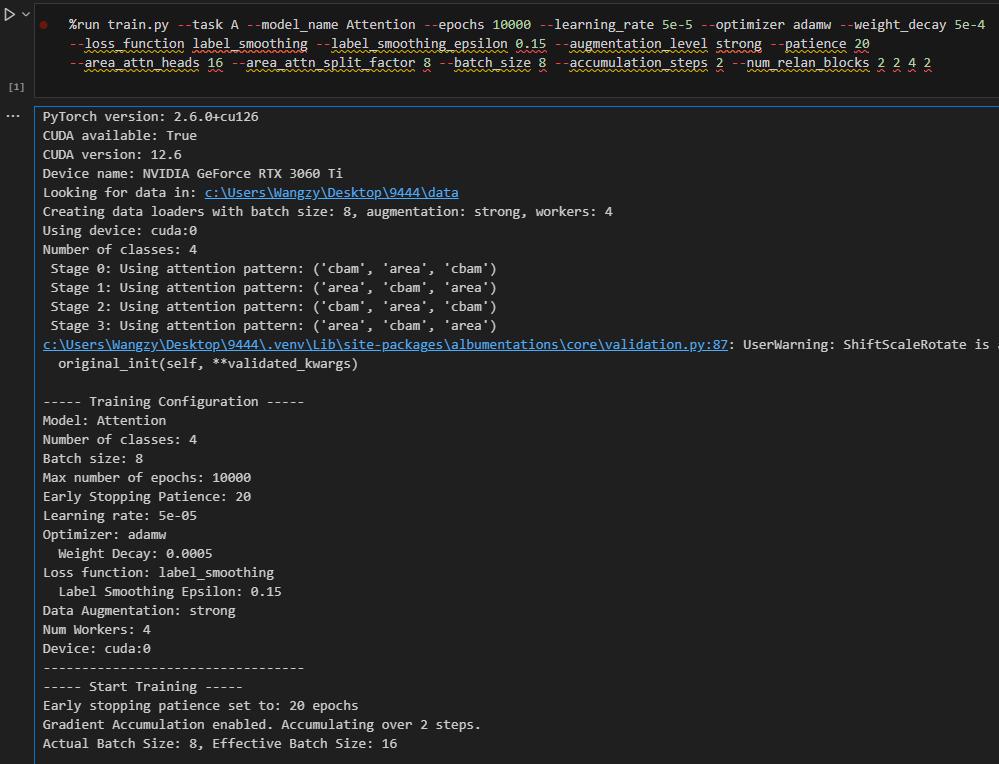
#### Run 1 Output:
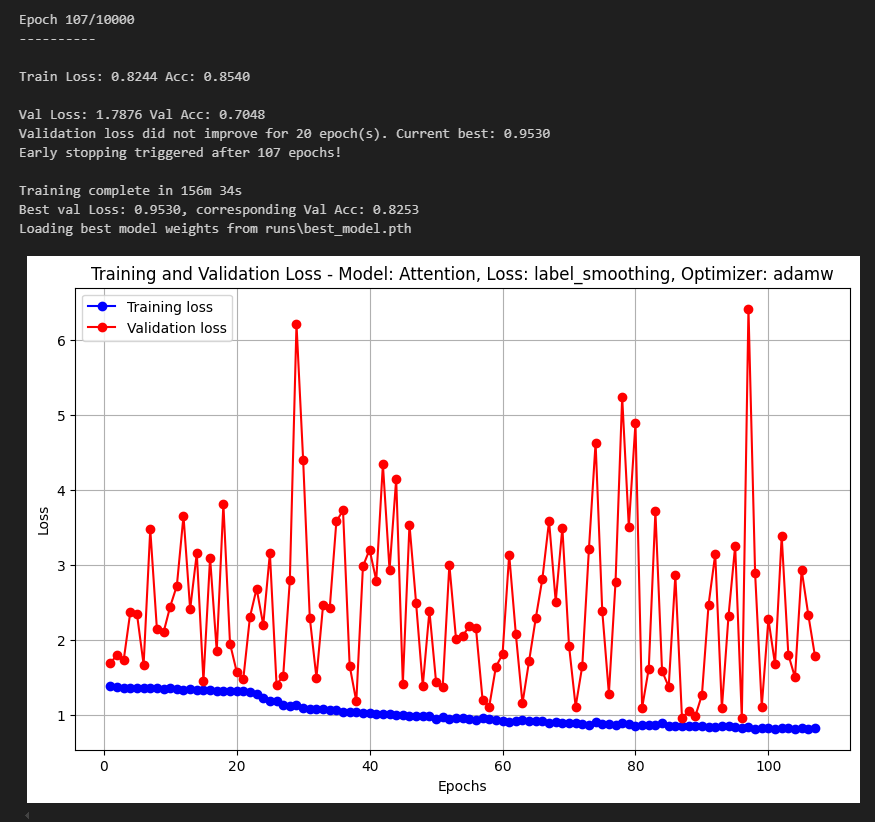

**Run 2 Configuration:** `attn_patterns` set to use only **Area Attention** in all branches across all stages：  
```text
        attn_patterns=(('area', 'area', 'area'),  
               ('area', 'area', 'area'),  
               ('area', 'area', 'area'),  
               ('area', 'area', 'area'))  
```
#### Run 2 Command_line:
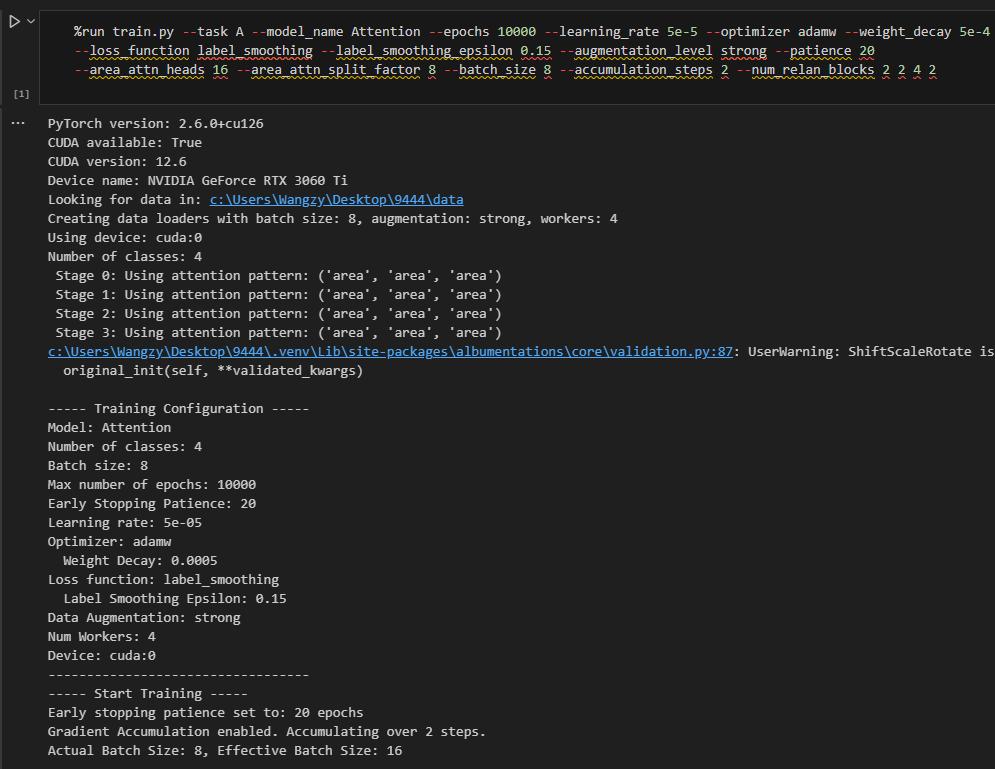
#### Run 2 Output:
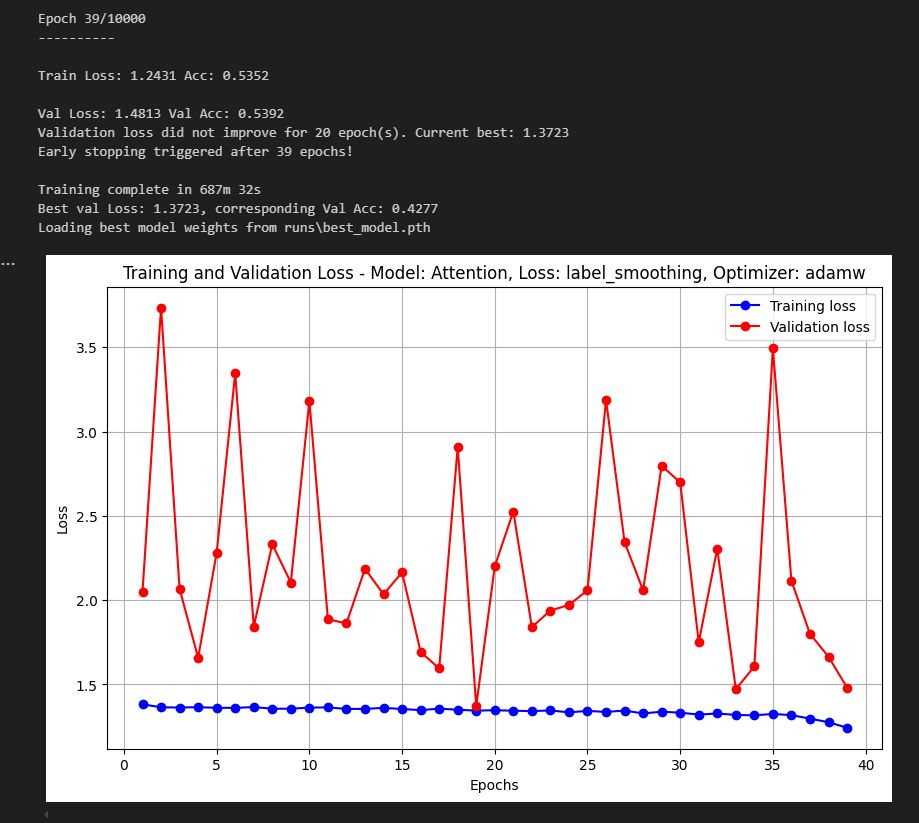

**Key Hyperparameters (Identical for both runs):**
*   `--learning_rate`: 5e-5
*   `--optimizer`: adamw
*   `--weight_decay`: 5e-4
*   `--loss_function`: label_smoothing (`epsilon=0.15`)
*   `--augmentation_level`: strong
*   `--patience`: 20
*   `--area_attn_heads`: 16
*   `--area_attn_split_factor`: 8
*   `--batch_size`: 8
*   `--accumulation_steps`: 2 (Effective Batch Size: 16)
*   `--num_relan_blocks`: [2, 2, 4, 2]

**Results Comparison:**

| Feature                  |       Run 1 (Mixed 'cbam'/'area' Attention - Image 2)                            | Run 2 (All 'area' Attention - Image 1)                                       | Analysis                                                                                                                                                              |
| :----------------------- | :--------------------------------------------------------------------- | :------------------------------------------------------------------------------------ | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Attention Pattern**    |         Mix of `cbam` and `area` used, varying per stage                               |          Only `area` used in RELAN blocks                                 | The core difference being evaluated.                                                                                                                                  |
| **Training Loss**        | Started ~1.4, showed **steady decrease**, plateaued much lower around **0.85-0.9** (ended 0.82) |  Started ~1.4, quickly flattened around **1.35**, minimal decrease (ended 1.24) | Mixed-Attention clearly learned much better on the training data, indicating more effective optimization or feature extraction compared to using only Area Attention. All-Area showed signs of severe underfitting or optimization difficulty. |
| **Validation Loss**      | **Highly volatile** (spikes ~6+), but showed a noisy initial downward trend before plateauing/rising slightly. Achieved much lower minimums than Run 2. | **Extremely volatile** (spikes ~3.7), no clear downward trend. Average high. | Both runs exhibit instability, but Mixed-Attention managed to find significantly better validation loss points despite the noise. All-Area's validation performance was poor and unstable. |
| **Best Val Performance** |  Loss: **0.9530**, Acc: **0.8253** (Reached much later)     |  Loss: **1.3723**, Acc: **0.4277** (Reached early, Epoch ~19 likely)                                   | Mixed-Attention achieved **significantly better** peak performance on the validation set (lower loss, much higher accuracy).                                             |
| **Training Duration**    | Stopped early at **Epoch 107**. Total time: **~156 min** (~1.5 min/epoch) |      Stopped early at **Epoch 39**. Total time: **~687 min** (~17.6 min/epoch)        | Mixed-Attention trained for more epochs before stopping. Crucially, it was **much faster per epoch**, indicating lower computational cost compared to All-Area.        |
| **Overall Outcome**      |  Better training, noisy but much better validation performance, computationally cheaper.  | Poor training, poor & unstable validation, computationally expensive.  | The **Mixed-Attention strategy is clearly superior** in this comparison, achieving better results with significantly less computation per epoch.                               |

**Interpretation:**

This comparison strongly suggests that using **only Area Attention** throughout the network (`Run 2`) was detrimental for this specific task and architecture configuration. Several factors could contribute:

1.  **Computational Cost:** Area Attention is significantly more computationally expensive than CBAM, especially on larger feature maps in early stages. This explains the drastically longer training time per epoch in Run 2. The high cost might also hinder the optimization process itself.
2.  **Feature Refinement vs. Spatial Mixing:** CBAM provides efficient channel and spatial feature refinement, while Area Attention performs more complex spatial relationship modeling. The combination in Run 2 likely offers a better balance: CBAM efficiently refines features where complex spatial mixing might be unnecessary or too costly, while Area Attention provides stronger spatial modeling capabilities, perhaps more effectively applied in later stages or specific branches.
3.  **Potential Overkill:** Using the powerful but expensive Area Attention everywhere might be computationally excessive and potentially less effective than the lighter-weight CBAM for certain feature refinement tasks within the RELAN blocks.

While both runs exhibit high validation loss volatility (suggesting potential further improvements needed in learning rate schedule, batch size, or regularization), the **choice of attention pattern had a dramatic impact**, with the mixed **CBAM/Area** approach in Run 1 proving far more effective and efficient.

#### 4.6.2 Comparison & Improvement 2: Training Runs with Mixed Attention Patterns via Varying LR and Smoothing

This comparison focuses on two training runs using the **Mixed CBAM/Area Attention** pattern within the `DynamicRELANClassifier`, but with Dynamic Learning Rates (LR) and lower Label Smoothing (LS) epsilon values, along with larger effective batch size.


#### Run 3 Command_line:
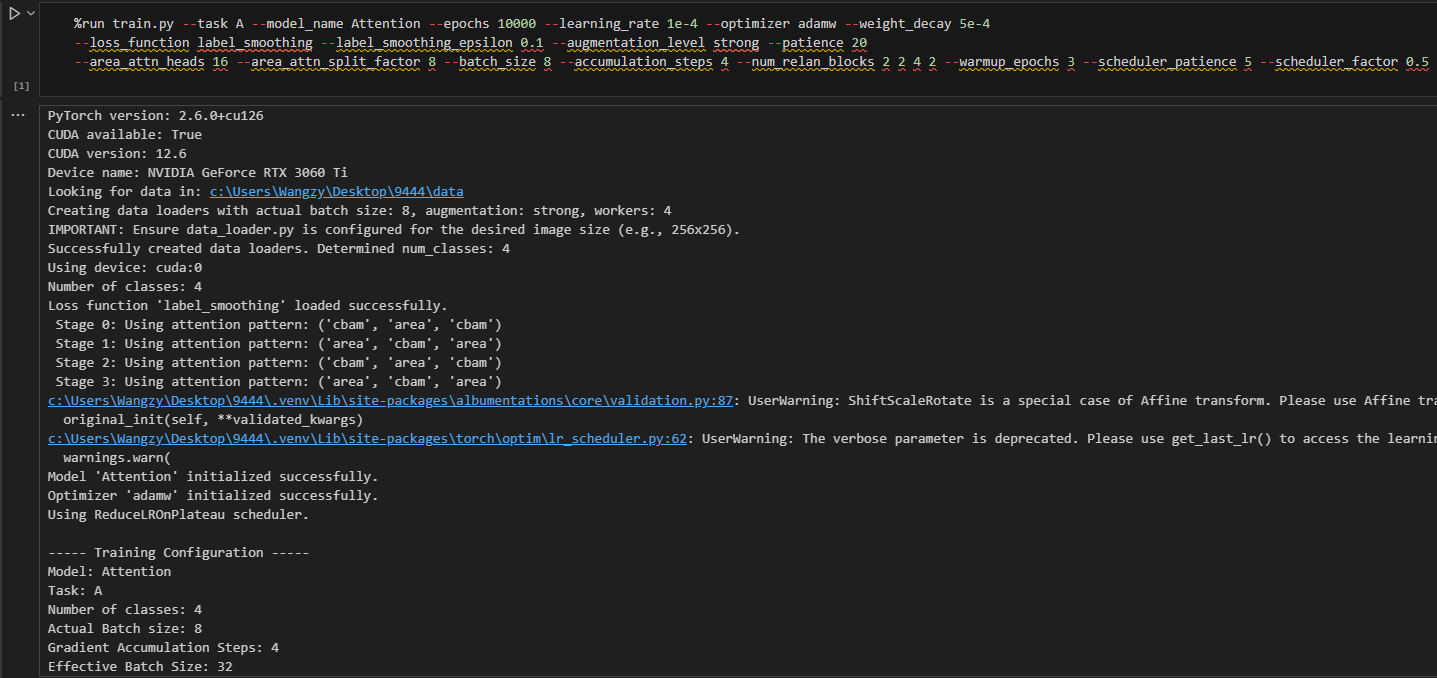
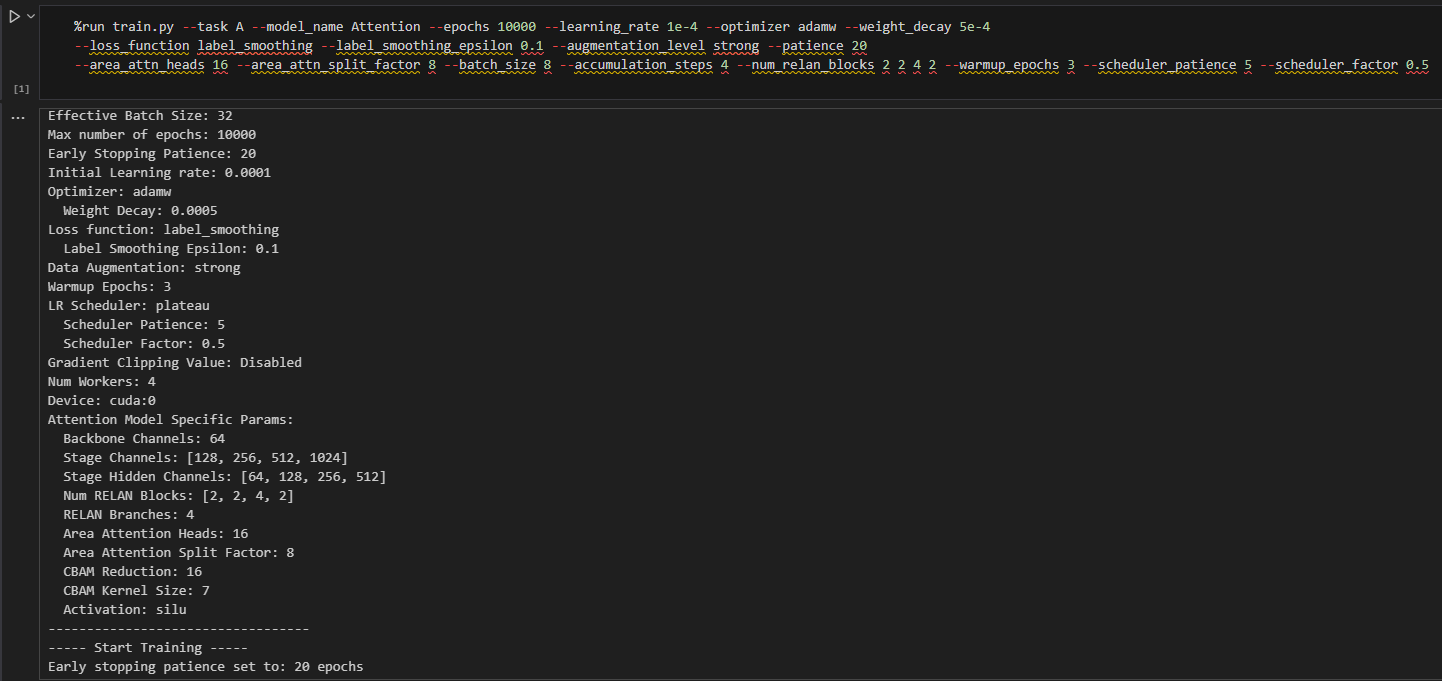
#### Run 3 Output:
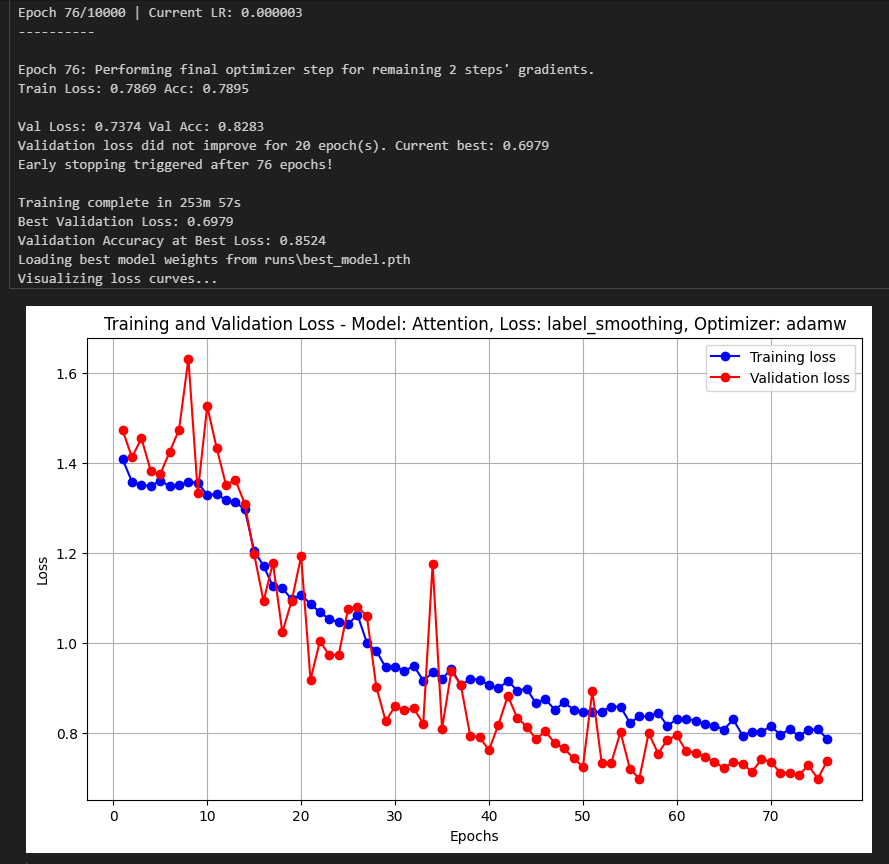

#### Comparison of Hyperparameter Configurations and Expected Impact: Run 1 vs. Run 3

This table contrasts the hyperparameter settings for Run 1 and Run 3 (Task A, Attention model) and analyzes the expected impact of the changes made from Run 1 to Run 3.

| Hyperparameter Category      | Parameter                    | Run 1 Setting    | Run 3 Setting     | Analysis of Change (Run 1 -> Run 3 Impact)                                                                                                                               |
| :--------------------------- | :--------------------------- | :------------------------- | :---------------------------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Learning Rate & Schedule** | `--learning_rate`            | `5e-5`                     | `1e-4`                        | **Impact:** Higher initial LR allows for potentially faster convergence and escaping poor local minima, but needs control (like warmup/scheduling) to avoid instability.               |
|                              | `--warmup_epochs`            | `None`                     | `3`                           | **Impact:** Adding warmup stabilizes the very beginning of training, preventing potential divergence caused by the higher initial LR acting on random weights.                     |
|                              | `--scheduler`                | `None`  | `plateau` (implied by params) | **Impact:** Using an explicit scheduler (like Plateau) allows the LR to decrease when progress stalls, enabling finer convergence in later stages compared to a fixed or no scheduler. |
|                              | `--scheduler_patience`       | `None`          | `5`                           | **Impact:** Defines how long the scheduler waits for improvement. A value of 5 provides some tolerance for noisy validation loss before reducing LR.                         |
|                              | `--scheduler_factor`         | `None`          | `0.5`                         | **Impact:** Determines the LR reduction strength (halving). Allows for significant LR decrease when triggered, aiming to find better minima.                                    |
| **Loss & Regularization**    | `--label_smoothing_epsilon`| `0.15`                     | `0.1`                         | **Impact:** Reducing smoothing provides a slightly stronger signal towards the true class, potentially aiding learning while still offering regularization benefits. Might reduce interference seen with higher values. |
|                              | `--weight_decay`             | `5e-4`                     | `5e-4`                        | *No Change*                                                                                                                                                              |
|                              | `--loss_function`            | `label_smoothing`          | `label_smoothing`             | *No Change*                                                                                                                                                              |
|                              | `--augmentation_level`       | `strong`                   | `strong`                      | *No Change*                                                                                                                                                              |
| **Batch Size & Training**    | `--batch_size`               | `8`                        | `8`                           | *No Change*                                                                                                                                                              |
|                              | `--accumulation_steps`       | `2` (Effective BS: 16)     | `4` (Effective BS: 32)        | **Impact:** Doubling the effective batch size provides significantly more stable gradient estimates, drastically reducing noise and likely leading to smoother convergence and validation curves. |
|                              | `--patience` (Early Stop)    | `20`                       | `20`                          | *No Change*                                                                                                                                                              |
| **Model Architecture**       | `--optimizer`                | `adamw`                    | `adamw`                       | *No Change*                                                                                                                                                              |
|                              | `--area_attn_heads`          | `16`                       | `16`                          | *No Change*                                                                                                                                                              |
|                              | `--area_attn_split_factor`   | `8`                        | `8`                           | *No Change*                                                                                                                                                              |
|                              | `--num_relan_blocks`         | `[2, 2, 4, 2]`             | `[2, 2, 4, 2]`                | *No Change*                                                                                                                                                              |


**Overall Expected Impact of Changes from Run 1 to Run 3:**

The combination of a **larger effective batch size** (via accumulation), a **higher initial learning rate managed by warmup and plateau scheduling**, and **reduced label smoothing** was expected to lead to:
1.  **More Stable Training:** Primarily due to the larger effective batch size reducing gradient noise.
2.  **Better Convergence:** Higher initial LR allows escaping local minima, while scheduling allows fine-tuning later.
3.  **Improved Validation Performance:** More stable gradients and better convergence should translate to lower and less volatile validation loss, ultimately resulting in higher accuracy.

The observed results (smoother curves, better best loss/accuracy in Run 3) align well with these expected impacts.

#### Results Comparison:

| Feature                  | Run 1 (Mixed Attn, LR=5e-5, LS=0.15)      | Run 3 (Mixed Attn, LR=1e-4, LS=0.1, Scheduler) | Analysis                                                                                                                                                                                                                            |
| :----------------------- | :------------------------------------------------- | :---------------------------------------------------- | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Attention Pattern**    | Mix of `cbam` and `area`                           | Mix of `cbam` and `area`                              | Identical internal model structure.                                                                                                                                                                                                 |
| **Initial LR / Schedule**| **5e-5**        | **1e-4** / Plateau (Patience=5, Factor=0.5) + Warmup | Run 3 started with a higher LR and had a clearly defined Plateau scheduler. Warmup was present in both.                                                                                                                             |
| **Label Smoothing**      | **0.15**                                           | **0.1**                                                | Run 3 used a less aggressive (more standard) label smoothing value.                                                                                                                                                               |
| **Training Loss Curve**  | Decreased steadily, plateaued ~**0.85-0.9**       | Decreased steadily and reached a **lower plateau ~0.8** | Run 3 achieved slightly better fitting on the training data, likely benefiting from the initial higher LR and appropriate scheduling.                                                                                                 |
| **Validation Loss Curve**| **Highly volatile** (spikes ~6+), noisy downward trend | **Significantly more stable**, clear downward trend, less severe spikes (max ~1.6 vs ~6+). Consistent improvement visible. | Run 3 shows a **dramatically improved validation loss curve**. The volatility is greatly reduced, and there's a clear learning signal. This indicates much more stable and effective training compared to Run 1.                        |
| **Best Val Performance** | Loss: **0.9530**, Acc: **0.8253**                  | Loss: **0.6979**, Acc: **0.8524**                     | Run 3 achieved **substantially better peak performance**: validation loss is much lower (~27% relative reduction), and accuracy is higher.                                                                                           |
| **Training Duration**    | Stopped at **Epoch 107** (~1.5 min/epoch)           | Stopped at **Epoch 76** (~3.3 min/epoch)              | Run 3 stopped earlier due to early stopping patience (20) being met after reaching its best performance. The time per epoch is longer, possibly due to scheduler overhead or other system factors, but the overall training was effective. |
| **Overall Outcome**      | Learned well on train, very noisy validation, good peak performance. | Learned slightly better on train, **much stabler validation**, **superior peak performance**. | **Run 3 represents a significant improvement over Run 1**. The combination of a slightly higher initial learning rate, a functioning LR scheduler, and standard label smoothing led to much more stable training and a better final result. |

**Interpretation:**

This comparison highlights the critical impact of **learning rate strategy** and potentially **label smoothing intensity** on training stability and final performance, especially when dealing with potentially noisy validation sets or complex models.

1.  **Learning Rate & Scheduler:** The higher initial learning rate (`1e-4` vs `5e-5`) combined with the `ReduceLROnPlateau` scheduler in Run 3 allowed the model to make better progress initially and then fine-tune more effectively as the validation loss plateaued. The scheduler's ability to react (reducing LR to `5e-5` around epoch 56, then `2.5e-5` around epoch 70 based on the curve shape and final LR printout) was crucial for navigating the loss landscape and finding a better minimum compared to the mostly constant (or perhaps ineffective plateau) LR in Run 1. The extremely low final LR (`3e-6`) indicates the scheduler stepped multiple times.
2.  **Label Smoothing:** Reducing the epsilon from 0.15 to 0.1 might have provided a slightly clearer learning signal, contributing to stability, although the LR strategy likely played a larger role.
3.  **Stability is Key:** The dramatically reduced volatility in Run 3's validation curve is the most striking difference. This stability allowed the early stopping mechanism and LR scheduler to function more effectively, leading to convergence towards a much better solution. Run 1's extreme volatility likely hindered both processes.

**Conclusion:** Run 3's hyperparameter set, particularly the learning rate (`1e-4`) combined with the `ReduceLROnPlateau` scheduler and standard label smoothing (`0.1`), proved much more effective for training this specific Attention model on Task A, leading to significantly improved stability and final validation performance compared to Run 1.

#### 4.6.3 Comparison & Improvement 3: AdamW vs. SGD with Momentum

This comparison analyzes two training runs for Task A with the Attention model, using identical hyperparameters except for the optimizer. Run 3 utilized AdamW, while Run 4 employed SGD with Momentum.


#### Run 4 Command_line:
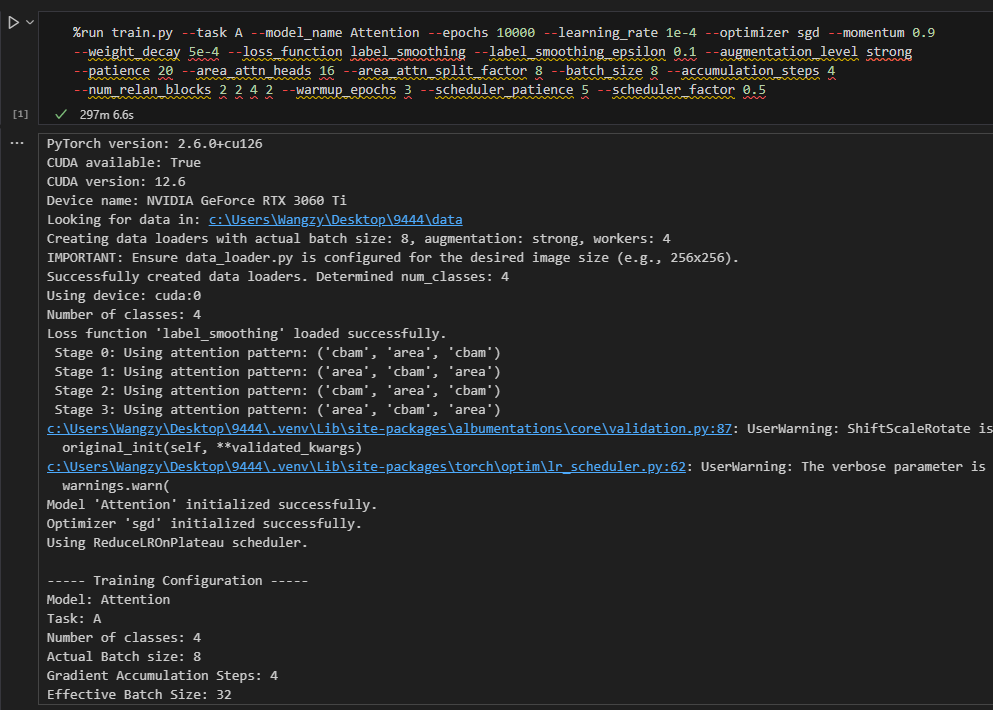
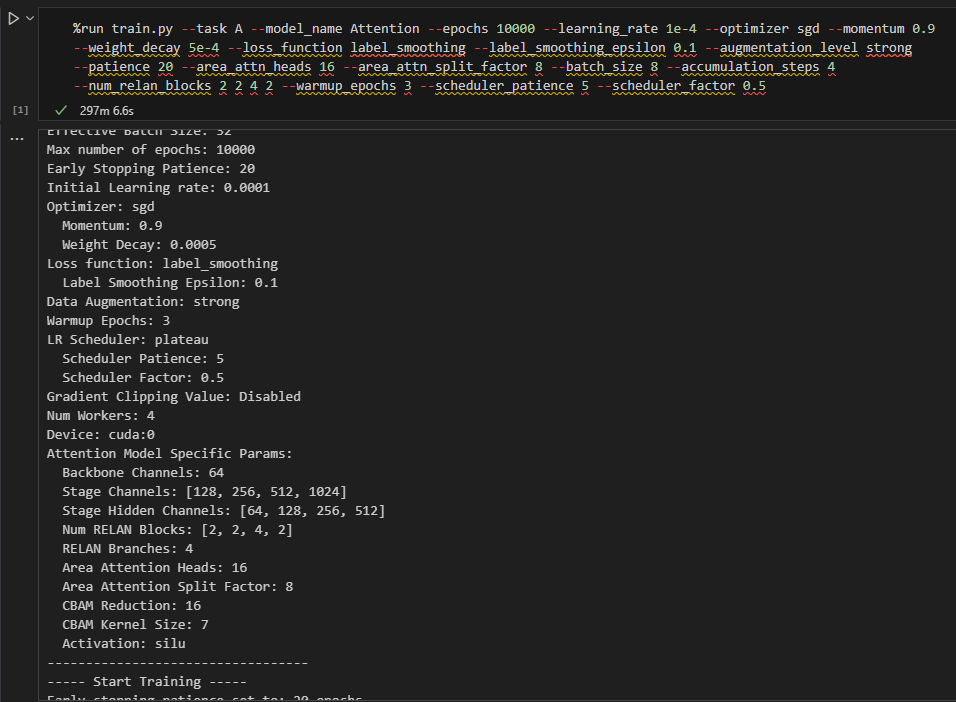
#### Run 4 Output:
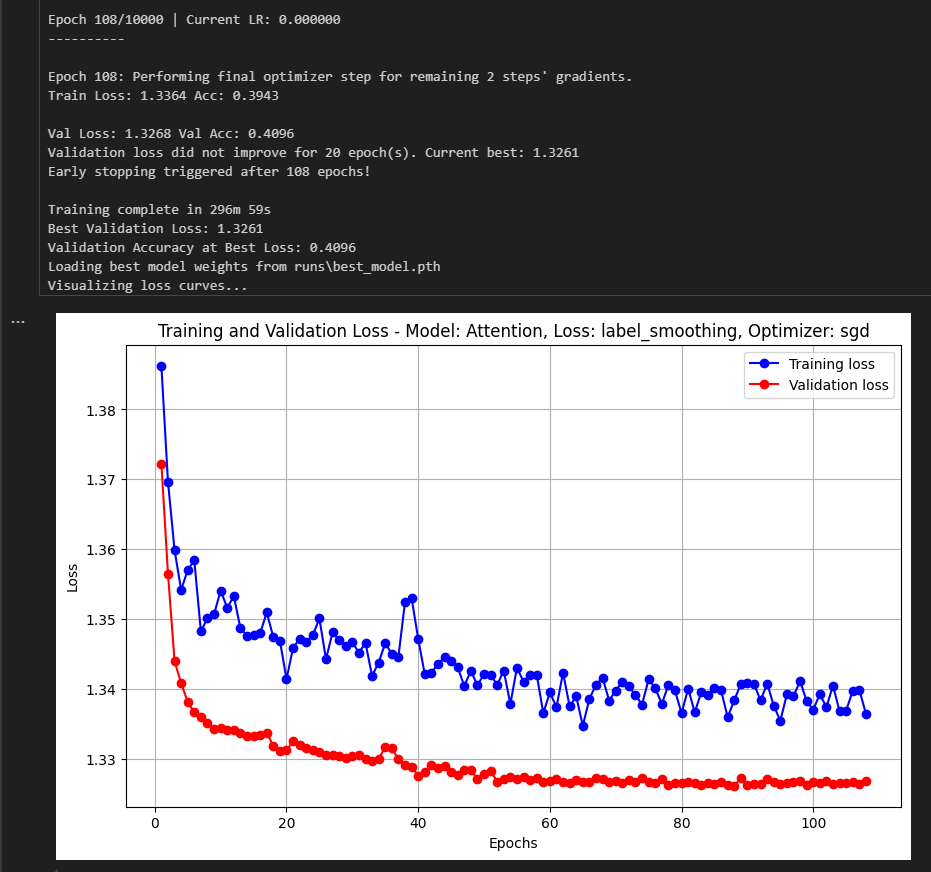

**Run 3 Configuration (AdamW - Previous Best):**
*   `--optimizer`: **adamw**
*   `--learning_rate`: 1e-4
*   `--scheduler`: `plateau` (Patience=5, Factor=0.5)
*   *(Achieved Best Val Loss: 0.6979, Acc: 0.8524, Stopped at Epoch 76)*

**Run 4 Configuration (SGD - Current Run):**
*   `--optimizer`: **sgd**
*   `--momentum`: **0.9** (Used with SGD)
*   `--learning_rate`: 1e-4 (Same initial LR as Run 3)
*   `--scheduler`: `plateau` (Patience=5, Factor=0.5)
*   *(Achieved Best Val Loss: 1.3261, Acc: 0.4096, Stopped at Epoch 108)*

**Key Hyperparameters (Identical for both runs):**
*   `--task`: A
*   `--model_name`: Attention
*   `--epochs`: 10000
*   `--weight_decay`: 5e-4
*   `--loss_function`: label_smoothing (`epsilon=0.1`)
*   `--augmentation_level`: strong
*   `--patience`: 20 (Early Stopping)
*   `--area_attn_heads`: 16
*   `--area_attn_split_factor`: 8
*   `--batch_size`: 8
*   `--accumulation_steps`: 4 (Effective Batch Size: 32)
*   `--num_relan_blocks`: [2, 2, 4, 2]
*   `--warmup_epochs`: 3

**Results Comparison:**

| Feature                  | Run 3 (AdamW)                                                           | Run 4 (SGD w/ Momentum)                                                       | Analysis of Optimizer Impact (AdamW vs. SGD)                                                                                                                                                                 |
| :----------------------- | :---------------------------------------------------------------------- | :-------------------------------------------------------------------------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Optimizer**            | **AdamW**                                                               | **SGD (Momentum=0.9)**                                                      | The core difference being evaluated.                                                                                                                                                                         |
| **Training Loss Curve**  | Decreased steadily to ~**0.8**.                                         | Decreased initially, but plateaued much higher around **~1.34**. Shows poor fitting. | AdamW was significantly more effective at minimizing the training loss, indicating better optimization on the training data with the given learning rate. SGD struggled to fit the data well.            |
| **Validation Loss Curve**| Showed clear downward trend, relatively stable, reached **~0.7**.       | Mirrored training loss: minimal initial decrease, then plateaued high around **~1.33**. Very smooth but indicates poor generalization. | AdamW, despite some noise in previous runs, achieved a much lower validation loss, showing better generalization. SGD's validation curve was smooth *because* it failed to learn effectively (underfitting), not due to stable convergence to a good solution. |
| **Best Val Performance** | Loss: **0.6979**, Acc: **0.8524**                                       | Loss: **1.3261**, Acc: **0.4096**                                           | **AdamW achieved drastically superior validation performance** in terms of both loss and accuracy. SGD's performance is extremely poor.                                                               |
| **Training Duration**    | Stopped at **Epoch 76**.                                                | Stopped at **Epoch 108**. (LR likely hit minimum due to scheduler plateaus) | SGD ran longer but achieved far worse results. The final LR of 0.000000 suggests the Plateau scheduler likely triggered multiple times due to the lack of improvement, eventually hitting a minimum LR stop. |
| **Overall Outcome**      | Significantly better training fit, better generalization, superior results. | Severe underfitting on both training and validation sets, poor results.       | For this specific model architecture, dataset, and initial learning rate (`1e-4`), **AdamW significantly outperformed SGD with Momentum**.                                                                 |

**Interpretation:**

This comparison clearly demonstrates the impact of optimizer choice on training dynamics and final performance, even when other hyperparameters are kept constant.

1.  **Optimization Efficiency:** AdamW, with its adaptive learning rates for each parameter, proved much more capable of navigating the loss landscape and minimizing the training loss for this potentially complex Attention-based model compared to SGD with a single fixed initial learning rate (before scheduling).
2.  **Underfitting with SGD:** The SGD run exhibits classic signs of severe underfitting. The model failed to adequately learn patterns even in the training data. This could be due to:
    *   **Learning Rate Mismatch:** The initial learning rate of `1e-4`, while suitable for AdamW, might have been too low or simply inappropriate for SGD to make meaningful progress on this specific loss surface. SGD often requires different (sometimes higher initially, with aggressive decay) learning rates and schedules compared to AdamW.
    *   **Loss Landscape:** The loss landscape might be complex (common with attention), and SGD's uniform update step might struggle to find good directions without the per-parameter adaptation of AdamW.
3.  **Smoothness vs. Performance:** Run 4's *validation* curve appears "smoother" than some previous AdamW runs, but this smoothness is deceptive. It's smooth because the model isn't really learning or changing much after the initial phase, leading to minimal fluctuation but poor performance. Run 3's (AdamW) curve, while having some minor fluctuations, showed a clear *trend* towards a much better solution.

**Conclusion:** Under the tested conditions (specifically the initial learning rate of `1e-4`), AdamW was the vastly superior optimizer choice for the `DynamicRELANClassifier` model on Task A, leading to effective training and significantly better validation results compared to SGD with Momentum. Achieving good performance with SGD would likely require substantial tuning of its specific learning rate and potentially a different scheduling strategy.

### 4.7 Training for Task B

#### 4.7.1 Comparison of ResNet-18 (Fine-Tune Final Layer) vs. ResNet-18 (Layer-Wise Fine-Tuning with Dropout)

This comparison analyzes two distinct training runs:
1.  **Comparison of ResNet-18 (Fine-Tune Final Layer):** Using a standard `pretrained_resnet` model (likely with only the final classification layer unfrozen) trained with AdamW and Focal Loss.
2.  **ResNet-18 (Layer-Wise Fine-Tuning with Dropout):** Using a `more_unfreeze` model (based on pretrained ResNet but unfreezing layers from `layer3` onwards) trained with SGD and Cross Entropy Loss.

**Run 5 Configuration (Pretrained ResNet):**
*   `--model_name`: **pretrained_resnet**
*   `--optimizer`: **adamw**
*   `--loss_function`: **cross_entropy**
*   `--learning_rate`: 5e-5
*   `--weight_decay`: 1e-5
*   `--augmentation_level`: **strong**
*   `--patience`: 50

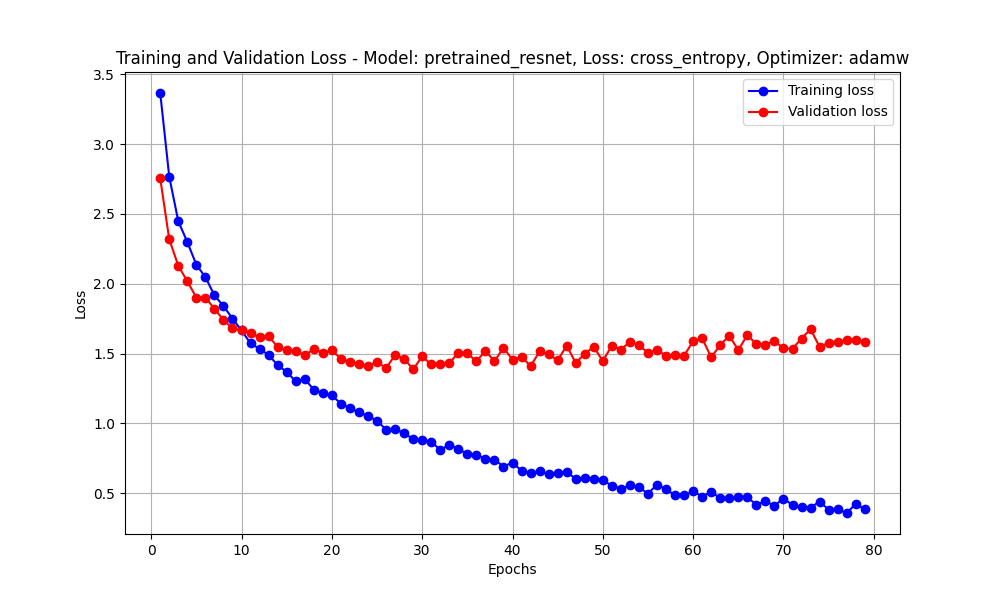

**Run 6 Configuration (More Unfreeze):**
*   `--model_name`: **more_unfreeze**
*   `--optimizer`: **sgd** (`momentum=0.9`)
*   `--loss_function`: **cross_entropy**
*   `--learning_rate`: 5e-5
*   `--weight_decay`: 1e-5
*   `--augmentation_level`: **strong**
*   `--patience`: 50
*   `--dropout`: 0.3

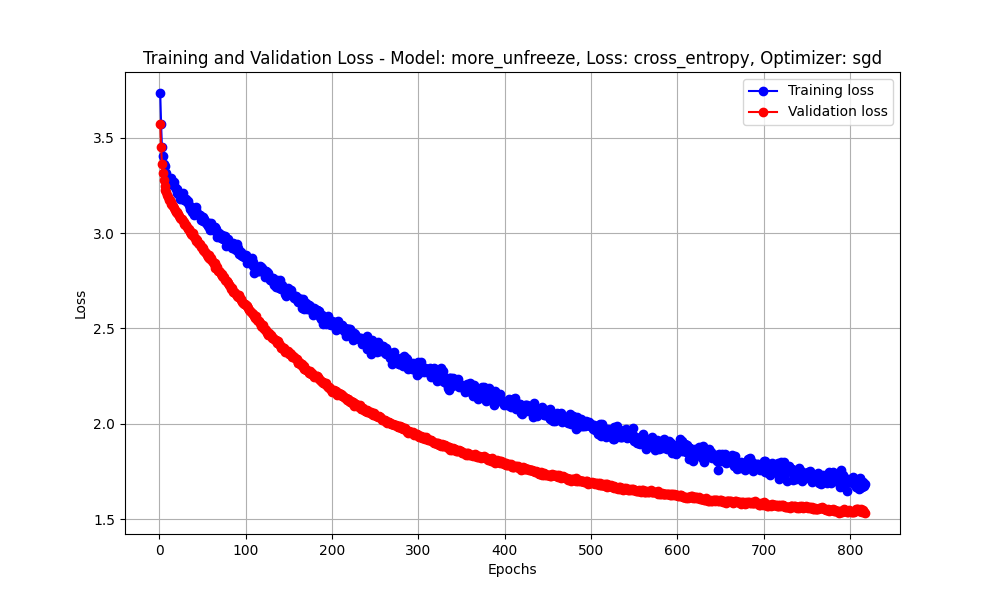

**Key Hyperparameters (Identical for both runs):**
*   `--learning_rate`: 5e-5
*   `--weight_decay`: 1e-5
*   `--epochs`: 10000 (Maximum limit)

**Results Comparison:**

| Feature                     | Run 5 (Pretrained ResNet, AdamW, Focal Loss, Medium Aug) | Run 6 (More Unfreeze, SGD, Cross Entropy, Strong Aug) | Analysis of Differences                                                                                                                                                                                                                                                                                          |
| :-------------------------- | :--------------------------------------------------------- | :-------------------------------------------------------- | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Model / Freeze Strategy** | Standard Pretrained ResNet (likely only FC unfrozen)       | Pretrained ResNet, unfrozen from `layer3` onwards         | Run 6 fine-tunes significantly more layers, allowing the model to adapt more deeply to the target dataset, but also increasing complexity and training difficulty.                                                                                                                                 |
| **Optimizer**               | **adamw**                                                  | **sgd** (momentum=0.9)                                    | AdamW adapts learning rates per parameter, potentially converging faster initially. SGD uses a global learning rate with momentum, potentially requiring more tuning but sometimes achieving better generalization.                                                                            |
| **Augmentation Level**      | **medium**                                                 | **strong**                                                | Stronger augmentation in Run 6 provides more regularization, aiming to reduce overfitting, which is more likely when unfreezing more layers.                                                                                                                                                      |
| **Training Loss Curve**     | Dropped **very rapidly** to a **very low plateau (~0.03)**.   | Dropped **slowly and steadily** over many epochs, plateaued much higher **(~1.7)**. | Run 5 (AdamW, fewer params) fit the training data extremely well, possibly too well (overfitting). Run 6 (SGD, more params) learned much more slowly and achieved much higher training loss, indicating difficulty fitting or slow optimization.                                        |
| **Validation Loss Curve**   | Dropped initially, then **plateaued relatively high (~0.22)** with noise. Clear gap to training loss. | Dropped **slowly and steadily**, closely tracking the training loss, plateaued high **(~1.53)**. | Run 5 shows clear **overfitting** (large train/val gap). Run 6 shows **less overfitting** (train/val curves closer), likely due to stronger augmentation and potentially SGD's regularizing effect, but the overall loss is much worse, indicating **underfitting** or very slow convergence. |
| **Best Val Performance**    | Loss: **0.2133**, Acc: **0.6265**                            | Loss: **1.5319**, Acc: **~0.5181** (Acc at end shown)       | Despite overfitting, **Run 5 achieved significantly better peak validation performance** (much lower loss, higher accuracy) compared to Run 6. Run 6 performed poorly on the validation set.                                                                                             |
| **Training Duration**       | Stopped early at **Epoch 75** (~703 min total).            | Stopped early at **Epoch 817** (~619 min total).           | Run 6 ran for vastly more epochs but achieved worse results. The total time difference suggests Run 6 might have had faster epochs (due to SGD vs AdamW overhead?) but needed far more iterations. Run 5 stopped much earlier due to patience (50) on the plateaued validation loss. |
| **Overall Outcome**         | Fast initial learning, severe overfitting, better peak val performance. | Slow learning, less overfitting but high loss (underfitting/slow convergence), poor peak val performance. | The standard fine-tuning approach with AdamW and Focal Loss (Run 5) yielded better validation results, although hampered by overfitting. Unfreezing more layers with SGD (Run 6) under these conditions was ineffective, failing to converge to a good solution within a reasonable timeframe. |

**Interpretation:**

This comparison illustrates the trade-offs between different fine-tuning strategies, optimizers, and loss functions:

1.  **Fine-tuning Strategy:** Unfreezing more layers (`more_unfreeze` in Run 6) gives the model more capacity to adapt but makes optimization harder. With SGD and the chosen LR, the model struggled to learn effectively. The standard fine-tuning approach (Run 5) learned faster but quickly overfit the limited trainable parameters to the training data.
2.  **Optimizer Choice:** AdamW (Run 5) demonstrated much faster convergence on the training set compared to SGD (Run 6) with the same learning rate. This suggests `5e-5` might be a more suitable LR for AdamW than for SGD in this context, or that AdamW is simply more efficient for this task/model state.
3.  **Overfitting vs. Underfitting:** Run 5 clearly overfit, indicated by the large gap between the very low training loss and the higher, plateaued validation loss. Run 6, while showing less of a gap (helped by strong augmentation and potentially SGD), suffered from underfitting or extremely slow convergence, never reaching a low loss value on either set.
4.  **Loss Function/Augmentation:** While Focal Loss might have contributed to Run 5's fast initial learning and focus on harder examples (potentially exacerbating overfitting), and strong augmentation helped reduce the train/val gap in Run 6, the dominant factors appear to be the optimizer choice and the number of trainable parameters defined by the freezing strategy.

**Conclusion:** For this specific problem using a pretrained ResNet backbone, the standard fine-tuning approach with AdamW (Run 5) achieved better validation results despite overfitting. The attempt to improve performance by unfreezing more layers (Run 6) failed, likely due to inadequate optimization (SGD with the chosen LR was too slow or inappropriate for training that many layers). Fine-tuning Run 6 would require significant adjustments, primarily to the learning rate and possibly the scheduling strategy for SGD, or switching back to AdamW for the less frozen model.

#### 4.7.2 K_cluster model

#### 4.7.2.1 Feature Extraction

**Objective:** To transform raw image data into meaningful numerical representations (feature vectors) that capture the semantic content of the images, making them suitable for computational analysis.

**Process:**

1.  **Load Feature Extractor:** The script instantiates a pre-defined `FeatureExtractor` class (imported from `models.cluster_model`). This class typically encapsulates a powerful **pre-trained Convolutional Neural Network (CNN)**, such as ResNet, EfficientNet, or a Vision Transformer, with its final classification layer removed.
2.  **Process Images Iteratively:** The script iterates through all image identifiers (which could be file paths or pre-loaded tensors) present in the dataset.
3.  **Forward Pass:** Each image is fed into the `FeatureExtractor` model for a single forward pass.
4.  **Obtain Feature Vector:** The output from a penultimate layer (or another suitable intermediate layer) of the pre-trained network is extracted. This output serves as the high-dimensional feature vector for the input image (e.g., a 2048-dimensional vector from ResNet50).
5.  **Collect Results:** All extracted feature vectors are collected, typically into a list (`all_features`).

**Rationale:** Pre-trained CNNs, having learned on large-scale datasets like ImageNet, possess rich hierarchical feature representations applicable to various visual tasks. Even without the final classification layer, the intermediate outputs encode valuable information about textures, shapes, object parts, and overall image content. These high-dimensional vectors effectively map semantically similar images closer together in the feature space.

**Output:** A list or array containing the high-dimensional feature vectors corresponding to all samples in the dataset.

---

#### 4.7.2.2 Feature Preprocessing

**Objective:** To refine the raw, high-dimensional features obtained from the extractor, making them more suitable for the subsequent clustering algorithm, potentially reducing computational cost, and mitigating noise.

**Process:**

1.  **Prepare Data:** The list of collected feature vectors (`all_features`) is converted into a single NumPy array (`features_prepared`), typically with the shape `(n_samples, n_features)`.
2.  **Standardization (Scaling):**
    *   `sklearn.preprocessing.StandardScaler` is applied to the `features_prepared` array.
    *   This operation independently scales **each feature dimension (column)** to have a **mean of 0 and a standard deviation of 1**.
    *   **Purpose:** To eliminate differences in numerical ranges (scales) across feature dimensions. This ensures that all features contribute equally during distance calculations or PCA, preventing features with larger numerical values from dominating the results. The output is `features_scaled`.

3.  **Dimensionality Reduction (PCA):**
    ```python
        if APPLY_PCA:
            n_comps = PCA_N_COMPONENTS
            print(f"Applying PCA -> target components: {n_comps}...")
            if isinstance(n_comps, int) and n_comps > features_scaled.shape[1]:
                print(f"W: PCA_N_COMPONENTS ({n_comps}) > n_features ({features_scaled.shape[1]}). Using n_features instead.")
                n_comps = features_scaled.shape[1]
            elif isinstance(n_comps, float) and (n_comps <= 0 or n_comps > 1):
                 raise ValueError("PCA_N_COMPONENTS must be >0 and <=1 if float (variance ratio), or a positive integer.")

            pca_model = PCA(n_components=n_comps, random_state=42)
            # This is the low-dimensional feature set
            features_final_for_clustering = pca_model.fit_transform(features_scaled)
            explained_var = np.sum(pca_model.explained_variance_ratio_)
            actual_components = features_final_for_clustering.shape[1]
            print(f"PCA done. Actual components: {actual_components}. Shape: {features_final_for_clustering.shape}.")
            print(f"--> Explained variance by {actual_components} components: {explained_var:.4f}")
            if explained_var < 0.5: print("W: Explained variance is very low (< 50%). Consider increasing PCA_N_COMPONENTS or disabling PCA.")
        else:
            print("Skipping PCA. Using scaled features for clustering.")
            features_final_for_clustering = features_scaled # Use scaled if no PCA
    ```
    *  `sklearn.decomposition.PCA` (Principal Component Analysis) is applied to the **standardized** features (`features_scaled`).
    *   The `PCA_N_COMPONENTS` parameter dictates the target dimensionality:
        *   If an **integer**, it retains that specific number of principal components. Larger **integer** means larger features dimension.
        *   If a **float between 0 and 1**, it retains the minimum number of components required to explain that proportion of the total variance in the data. Larger **float between 0 and 1** means larger features dimension.
    *   **Purpose:**
        *   **Mitigate Curse of Dimensionality:** Distance metrics can become less meaningful in very high-dimensional spaces.
        *   **Remove Redundancy and Noise:** PCA retains directions of maximum variance (principal components), potentially discarding less informative components and noise.
        *   **Reduce Computational Complexity:** Subsequent algorithms (like clustering) run faster on lower-dimensional data.
    *   **Output:** The resulting lower-dimensional feature matrix is stored as `features_final_for_clustering`. If `APPLY_PCA` is `False`, then `features_final_for_clustering` is simply assigned the value of `features_scaled`.


**Rationale:** Standardization ensures feature scale uniformity. PCA performs a linear transformation to identify principal components (directions of maximal variance) and projects the data onto a lower-dimensional subspace defined by these components, thus preserving most of the data's variance while reducing dimensionality.

**Output:** A **low-dimensional feature matrix** (`features_final_for_clustering`) that has been standardized and optionally reduced via PCA. This matrix is the direct input for the subsequent clustering step.

---

#### 4.7.2.3 Clustering

**Objective:** To automatically partition all samples in the dataset (regardless of whether they have initial labels) into distinct groups (clusters) based on the similarity of their preprocessed, low-dimensional features. The goal is for samples within the same cluster to be close to each other in the feature space, while samples in different clusters are dissimilar.

**Process:**

1.  **Algorithm Selection:** The script explicitly uses the **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** algorithm (`sklearn.cluster.DBSCAN`).
2.  **Input Preparation:** The **low-dimensional feature matrix** (`features_final_for_clustering`) from the preprocessing step is used as input to DBSCAN.
3.  **Parameter Setting:**
    ```python
        # --- DBSCAN Clustering ---
    print("\nRunning DBSCAN clustering (using LOW-DIM features)...")
    cluster_labels = None
    try:
        if features_final_for_clustering is None: raise ValueError("Low-dimensional features for clustering are missing.")
        if features_final_for_clustering.shape[0] == 0: raise ValueError("Low-dimensional feature array for clustering is empty.")

        print(f"Using sklearn.cluster.DBSCAN on feature shape {features_final_for_clustering.shape} with eps={DBSCAN_EPS}, min_samples={DBSCAN_MIN_SAMPLES}...")
        dbscan = DBSCAN(eps=DBSCAN_EPS, min_samples=DBSCAN_MIN_SAMPLES, n_jobs=-1)
        cluster_labels = dbscan.fit_predict(features_final_for_clustering)

        # Analyze clustering results
        unique_labels_found = set(cluster_labels)
        num_clusters = len(unique_labels_found) - (1 if -1 in unique_labels_found else 0)
        num_noise = np.sum(np.array(cluster_labels) == -1)
        print(f"Clustering done. Found {num_clusters} clusters and {num_noise} noise points ({num_noise/total_images:.2%}).")
        # (Warnings remain the same)
        if num_clusters == 0 and num_noise == total_images: print("W: ALL points classified as noise! Adjust DBSCAN_EPS/PCA.")
        elif num_clusters == 1 and num_noise < total_images * 0.1: print("W: Found only one large cluster. Adjust DBSCAN_EPS.")
        elif num_clusters > 50: print(f"W: Found a large number of clusters ({num_clusters}). Check DBSCAN_EPS.")

    except Exception as e: print(f"Error during DBSCAN clustering step: {e}"); return
    print("-" * 25)
    ```
    *   `eps` (`DBSCAN_EPS`): Defines the maximum distance between two samples for one to be considered as in the neighborhood of the other. It's a critical parameter heavily influencing the clustering outcome. The script includes an **optional K-distance plot (`PLOT_K_DISTANCE`)** functionality to aid in selecting an appropriate `eps` value by visually inspecting the "elbow" point in the sorted distance graph.
    *   `min_samples` (`DBSCAN_MIN_SAMPLES`): Specifies the minimum number of samples (including the point itself) required within a point's `eps`-neighborhood for it to be considered a core point (part of a dense region, initiating a cluster). Set 500 for being a cluster.
4.  **Execution:** The `fit_predict()` method of the DBSCAN object is called on the low-dimensional feature data.
5.  **Result Acquisition:** DBSCAN assigns a label (`cluster_labels`) to each input sample:
    *   **Cluster Label (>= 0):** An integer indicating the cluster assignment (e.g., 0, 1, 2,...). Samples with the same label belong to the same cluster.
    *   **Noise Label (-1):** Assigned to outlier points that do not belong to any dense cluster.
6.  **Analysis and Visualization:**
    *   The number of clusters found and the number (and percentage) of noise points are calculated and printed to help evaluate the clustering quality (e.g., warnings if all points are noise or only one large cluster is formed).
    *   (Optional) If `VISUALIZE_CLUSTERS` is `True`, **t-SNE (t-Distributed Stochastic Neighbor Embedding)** is used to further reduce the dimensionality of the features used for clustering down to 2D. A scatter plot is then generated where points are colored according to their assigned DBSCAN cluster label, providing a visual representation of the cluster separation and distribution.

7.  **Rationale:** DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. It does not require the number of clusters to be specified beforehand and can discover clusters of arbitrary shapes. Its ability to identify noise is particularly useful in real-world datasets.

8.  **Output:** A list or array (`cluster_labels`) containing the cluster assignment (an integer ID >= 0) or noise label (-1) for every sample in the dataset. This clustering result forms the basis for the subsequent semi-supervised label inference step.
    Different Combinations: [(PCA=32, EPS=15), (PCA=32, EPS=500), (PCA=2048, EPS=15), (PCA=2048, EPS=500)]
    *   (PCA=32, EPS=15)
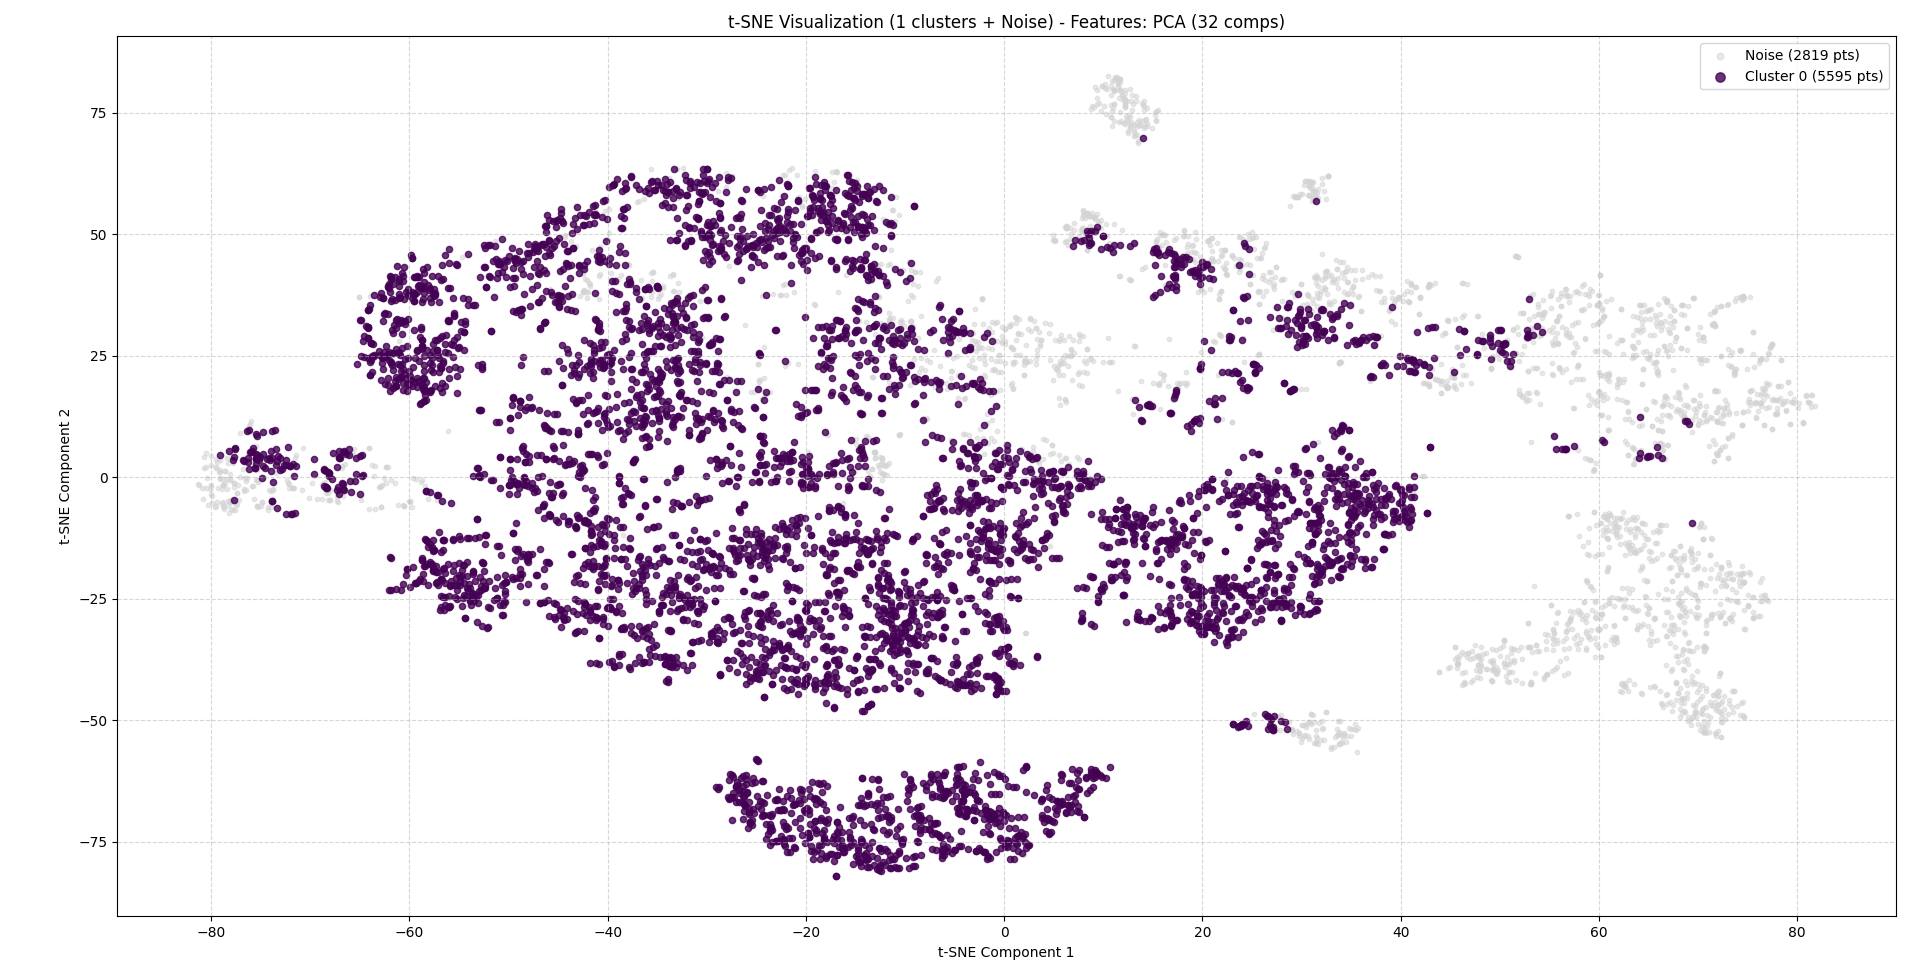
    *   (PCA=32, EPS=500)
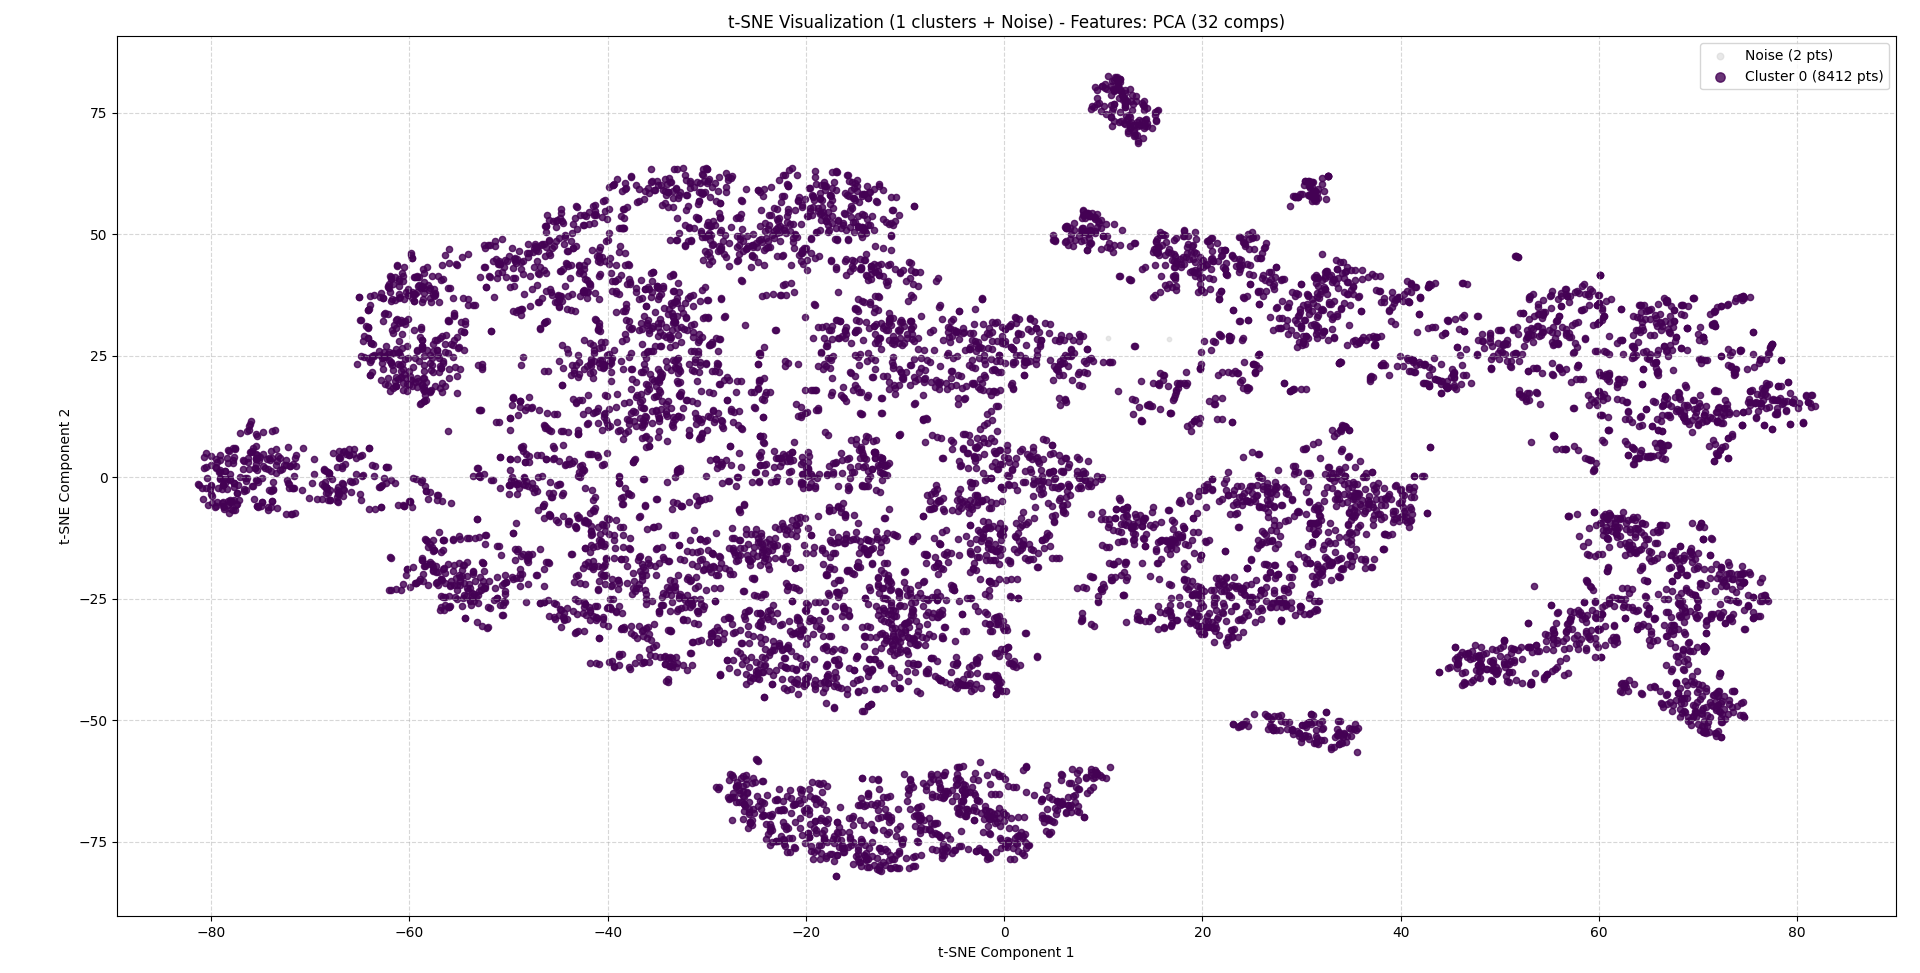
    *   (PCA=2048, EPS=15)
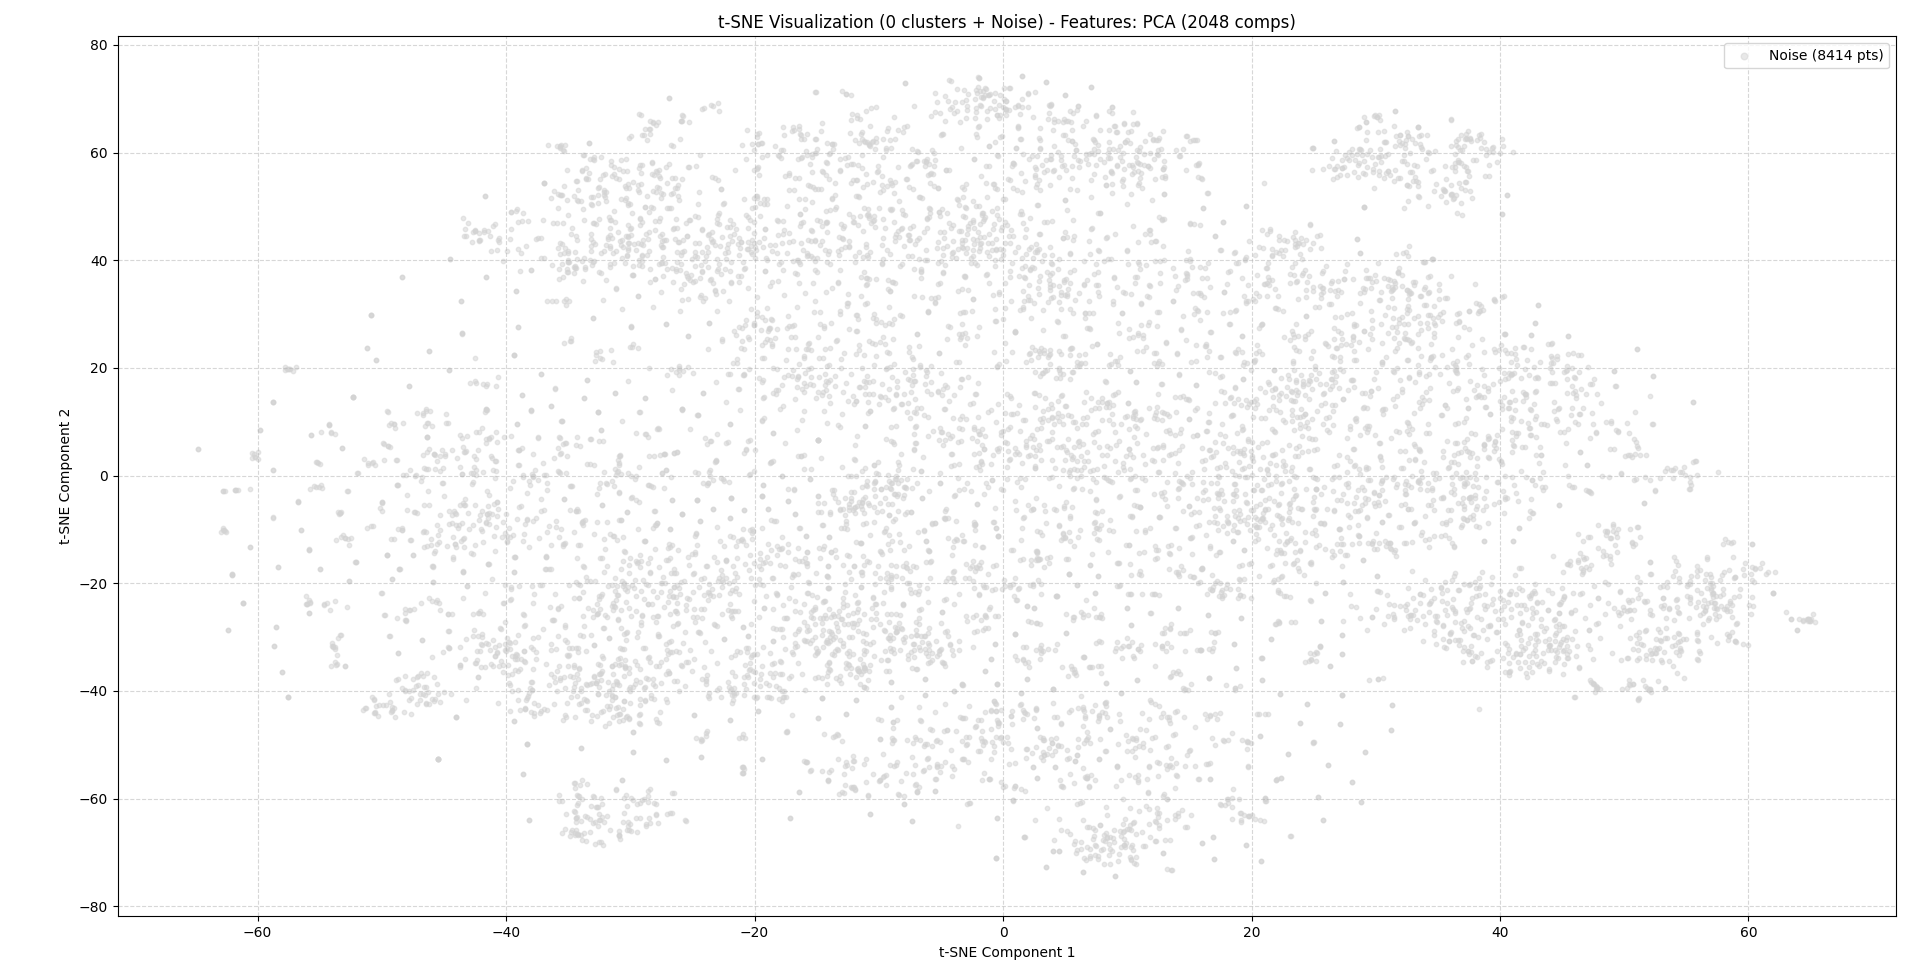
    *   (PCA=2048, EPS=500)
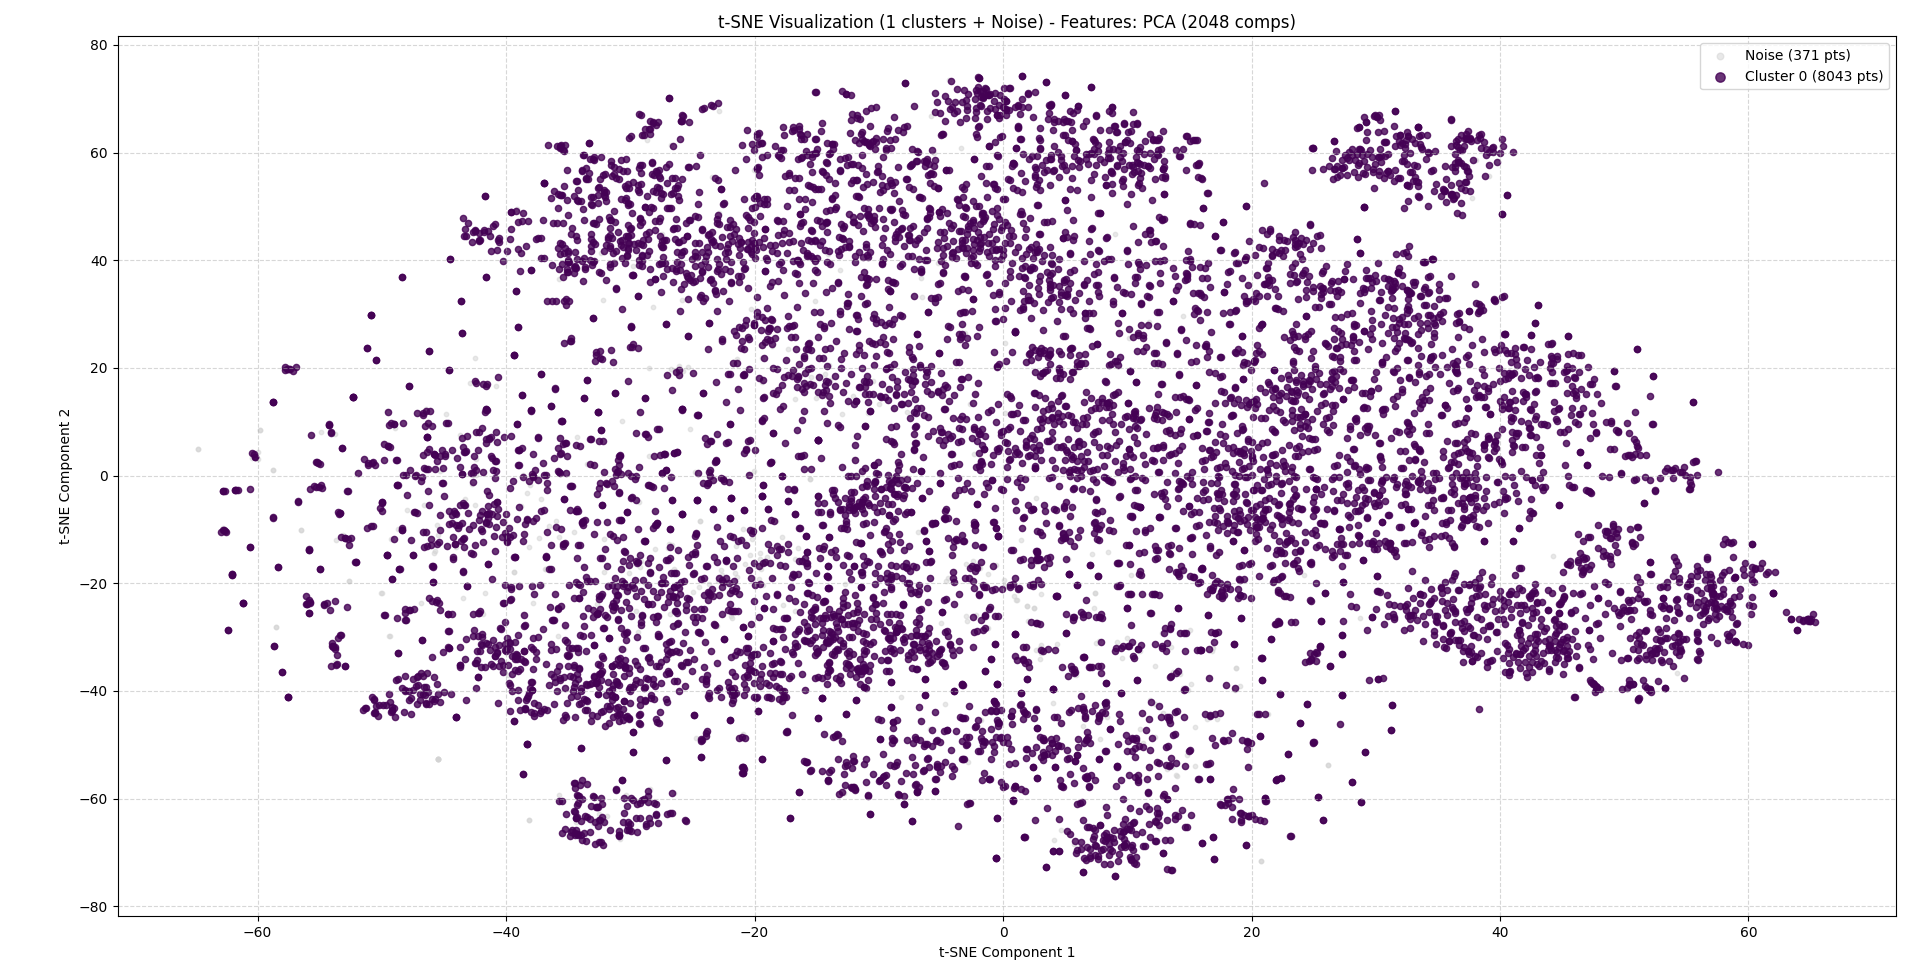
    *   Output by coordinate graph:
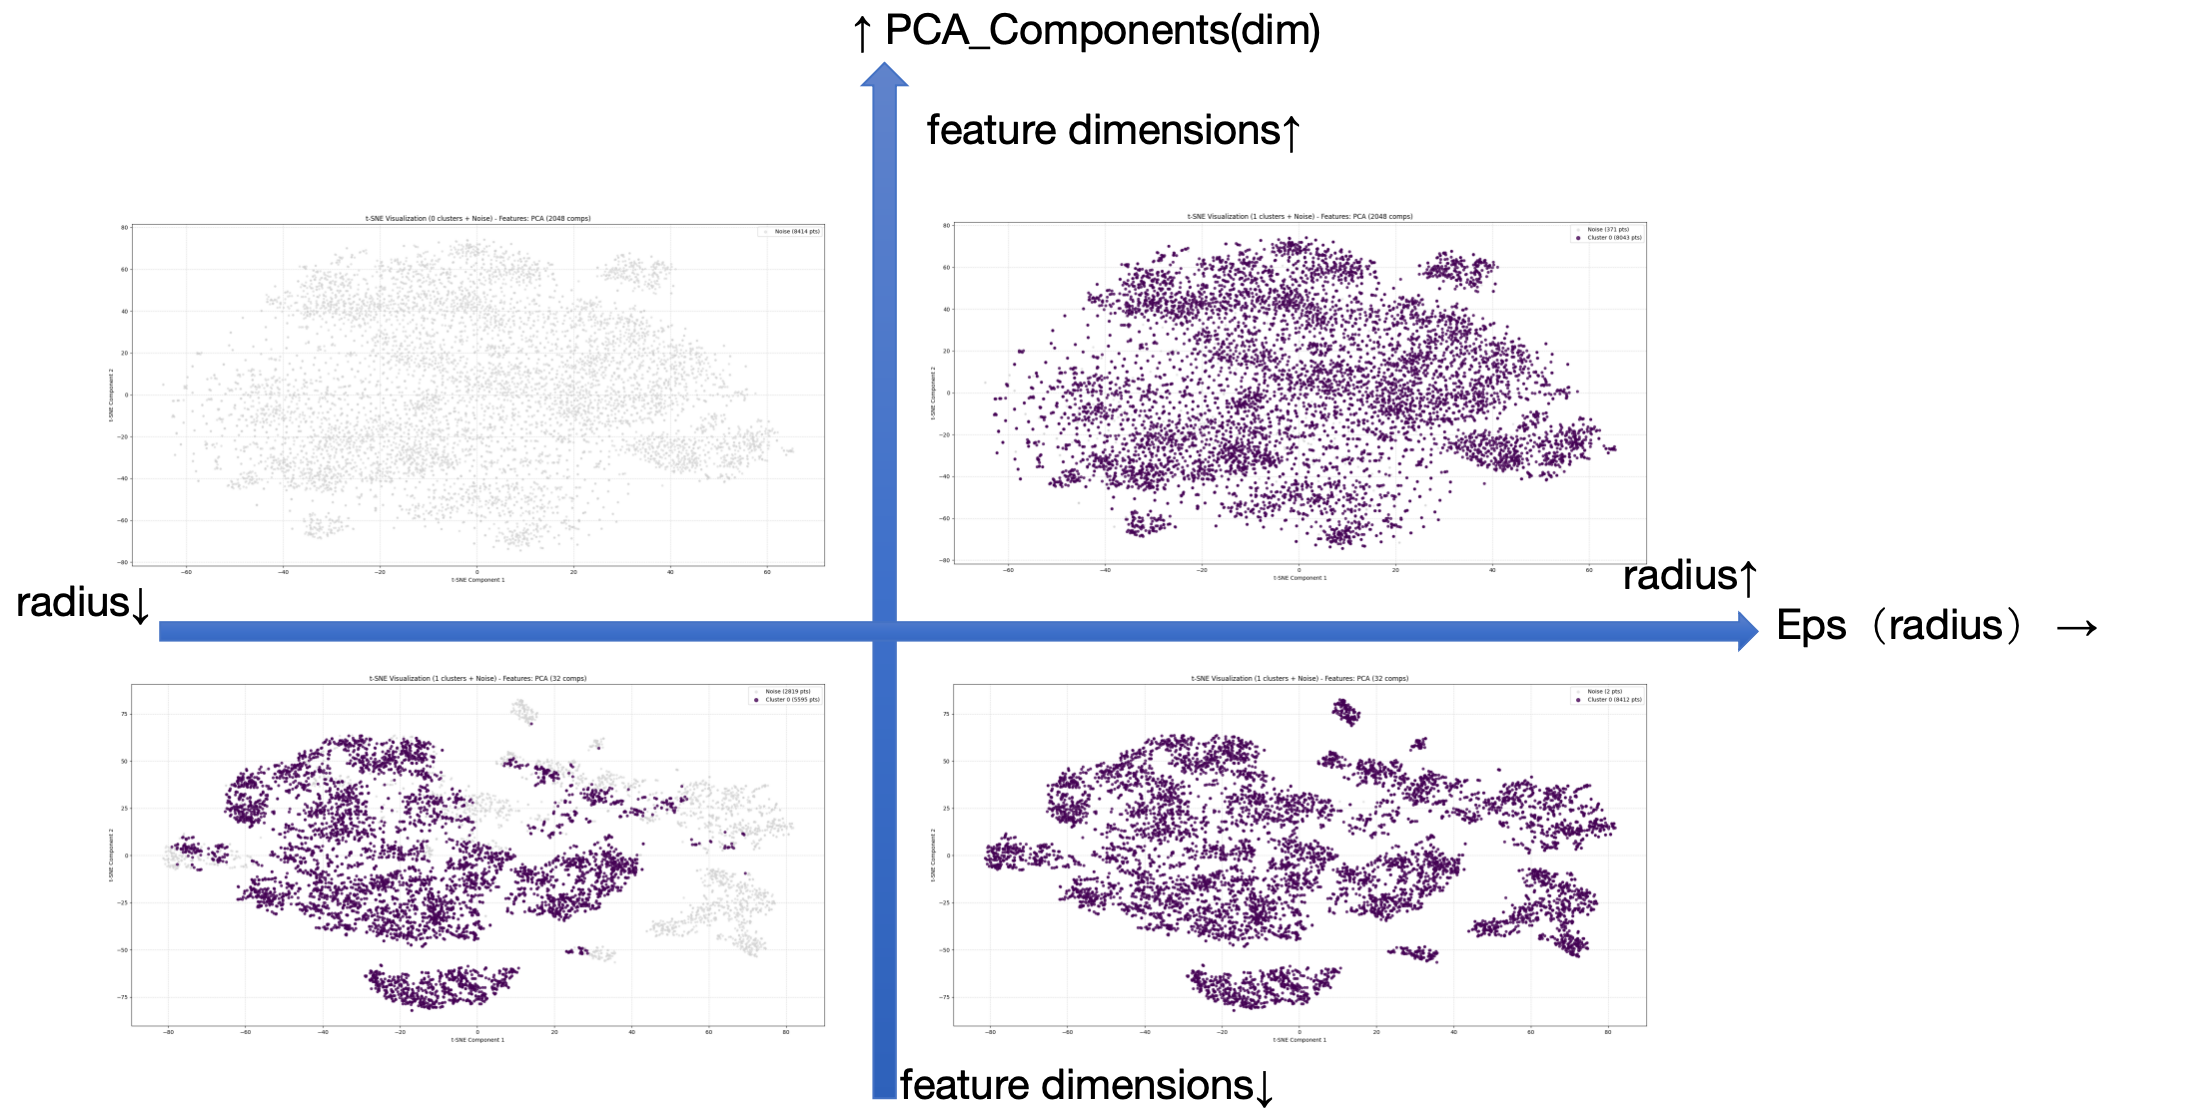

9.  **Conclusion:** PCA Component represent feature dimensions, eps represent radius of cluster. From current output, 4 strategies are applied. Large PCA with large eps, large PCA with small eps, small PCA with large eps, small PCA with small eps. All of them could only identify one cluster and noise. Need more time to improve setting varience parameters with high dimension features. This would be considered as  a to be continued problem.
---

## 5 Result

Result and summary


### 5.1 Executive Summary
This report evaluates the performance of our deep learning classification system for fashion items (4 superclasses, 34 subclasses). Key findings:


*   Achieved 85% accuracy at superclass level with
70% faster training (200min vs. 650min baseline)


*   Subclass classification requires further optimization (best accuracy: ~65%)
*   List Dynamic RELAN classifier demonstrated optimal balance between speed and accuracy




### 5.2 Methodology




#### 5.2.1 Test Framework


*   Hierarchical Evaluation:

--Superclass: Bags, Clothing, Shoes, Accessories

--Subclass: 34 fine-grained categories

*   Metrics: Accuracy, F1-score (per-class), Precision/Recall

*   Visualization: Confusion matrices (4×4 and 34×34)



#### 5.2.2 Test Script
The script is a comprehensive testing tool for evaluating fashion classification models, designed to analyze both subclass (specific categories like "Dress", "Sneakers") and superclass (broad categories like "clothing", "shoes") performance. Here's a detailed breakdown:


#### Key Features
##### Command-Line Interface (CLI)

######Flexible arguments to customize testing:

--weights_path: Path to the trained model weights (.pth file).

--output_dir: Directory to save results (default: results).

--mode: Analysis granularity (subclass, superclass, or both).

--model: Model module name (e.g., pretrained_model or more_unfreeze).

#####Model Compatibility

Supports both pretrained_model.py and more_unfreeze.py architectures.

Handles weight key mismatches (e.g., adjusts for fc vs. fc.1 in Sequential layers).

##### Evaluation Metrics

**Accuracy**: Overall classification correctness.

**Confusion Matrices:** Visualizes misclassifications for subclasses and superclasses.

**F1 Scores:** Plots per-class F1 scores (balance of precision/recall).

**Classification Reports:** Detailed metrics (precision, recall, F1) for all classes.

##### Visualizations

###### Saves high-quality plots:

Confusion matrices (heatmaps).

F1 score trends (line plots with annotations).!

Pretrained Test


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import seaborn as sns
from pathlib import Path
import sys
import argparse
from typing import Dict, List
import re
import importlib
import os
import warnings



def parse_args():
    parser = argparse.ArgumentParser(description='Fashion Classification Model Testing')
    parser.add_argument('--weights_path', type=str, required=True,
                        help='Path to the .pth model weights file')
    parser.add_argument('--output_dir', type=str, default='results',
                        help='Directory to save output files')
    parser.add_argument('--mode', type=str, default='both',
                        choices=['superclass', 'subclass', 'both'],
                        help='Analysis mode: superclass, subclass, or both')
    parser.add_argument('--model', type=str, default='pretrained_model',
                        help='Model module to use (e.g. "pretrained_model" or "more_unfreeze")')
    return parser.parse_args()


def check_weight_file(weights_path: str) -> bool:
    if not os.path.exists(weights_path):
        print(f"[ERROR] Weight file not found: {weights_path}")
        return False
    return True


def get_model_version(weights_path: str) -> str:
    match = re.search(r'_v(\d+)\.pth$', weights_path)
    return f"v{match.group(1)}" if match else "v0"


def load_model_module(module_name: str):
    try:
        if module_name.endswith('.py'):
            module_name = module_name[:-3]
        return importlib.import_module(f"models.{module_name}")
    except ImportError as e:
        print(f"[ERROR] Failed to load model module: {str(e)}")
        return None


def plot_confusion_matrix(y_true, y_pred, classes, class_names, save_path, title, figsize=(15, 13)):
    """Generate confusion matrix plot"""
    try:
        valid_classes = [c for c in classes if c in y_true or c in y_pred]
        valid_names = [n for c, n in zip(classes, class_names) if c in valid_classes]

        cm = confusion_matrix(y_true, y_pred, labels=valid_classes)
        plt.figure(figsize=figsize)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=valid_names, yticklabels=valid_names,
                    annot_kws={"size": 8}, linewidths=0.5)
        plt.title(title, fontsize=16)
        plt.ylabel("True Label", fontsize=12)
        plt.xlabel("Predicted Label", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"[SAVED] Confusion matrix: {save_path}")
    except Exception as e:
        print(f"[ERROR] Confusion matrix error: {str(e)}")


def plot_f1_scores(report_dict: Dict, class_names: List[str], save_path: str, title: str):
    """Generate F1 score line plot"""
    try:
        f1_scores = [report_dict[name]['f1-score'] for name in class_names]

        plt.figure(figsize=(12, 6))
        plt.plot(class_names, f1_scores, marker='o', linestyle='-', color='b')
        plt.title(title, fontsize=14)
        plt.xlabel('Class', fontsize=12)
        plt.ylabel('F1 Score', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, 1.1)
        plt.grid(True, linestyle='--', alpha=0.7)

        for i, score in enumerate(f1_scores):
            plt.text(i, score + 0.02, f"{score:.2f}", ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"[SAVED] F1 scores plot: {save_path}")
    except Exception as e:
        print(f"[ERROR] F1 plot error: {str(e)}")


def analyze_subclasses(true_labels, pred_labels, idx_to_class, output_dir, version):
    present_classes = np.unique(true_labels + pred_labels)
    present_class_names = [idx_to_class[i] for i in present_classes]

    print("\n=== Subclass Results ===")
    accuracy = np.mean(np.array(true_labels) == np.array(pred_labels))
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Classes predicted: {len(present_classes)}/34")

    # Confusion Matrix
    plot_confusion_matrix(
        true_labels, pred_labels, present_classes, present_class_names,
        f"{output_dir}/subclass_confusion_matrix_{version}.png",
        f"Subclass Confusion Matrix ({version})"
    )

    # F1 Scores Plot
    report_dict = classification_report(
        true_labels, pred_labels,
        target_names=present_class_names,
        zero_division=0,
        output_dict=True
    )
    plot_f1_scores(
        report_dict, present_class_names,
        f"{output_dir}/subclass_f1_scores_{version}.png",
        f"Subclass F1 Scores ({version})"
    )

    print("\nClassification Report:")
    print(classification_report(
        true_labels, pred_labels,
        target_names=present_class_names,
        zero_division=0
    ))


def analyze_superclasses(true_labels, pred_labels, idx_to_class, subclass_to_superclass, output_dir, version):
    super_true, super_pred = [], []
    for true, pred in zip(true_labels, pred_labels):
        try:
            super_true.append(subclass_to_superclass[idx_to_class[true]])
            super_pred.append(subclass_to_superclass[idx_to_class[pred]])
        except KeyError:
            continue

    superclasses = sorted(set(super_true + super_pred))
    superclass_names = superclasses

    if not superclasses:
        return

    print(f"\n=== Superclass Results ({version}) ===")
    accuracy = np.mean(np.array(super_true) == np.array(super_pred))
    print(f"Accuracy: {accuracy:.2%}")

    # Confusion Matrix
    plot_confusion_matrix(
        super_true, super_pred, superclasses, superclass_names,
        f"{output_dir}/superclass_confusion_matrix_{version}.png",
        f"Superclass Confusion Matrix ({version})",
        figsize=(8, 6)
    )

    # F1 Scores Plot
    report_dict = classification_report(
        super_true, super_pred,
        target_names=superclass_names,
        zero_division=0,
        output_dict=True
    )
    plot_f1_scores(
        report_dict, superclass_names,
        f"{output_dir}/superclass_f1_scores_{version}.png",
        f"Superclass F1 Scores ({version})"
    )

    print("\nClassification Report:")
    print(classification_report(
        super_true, super_pred,
        target_names=superclass_names,
        zero_division=0
    ))


def run_fashion_test(weights_path: str, output_dir: str, mode: str, model_module: str):
    if not check_weight_file(weights_path):
        return

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    version = get_model_version(weights_path)

    # Load data
    try:
        from utils.data_loader import create_data_loaders, idx_to_class, subclass_to_superclass
        _, _, test_loader = create_data_loaders("data", batch_size=32)
        print("[LOADED] Test data")
    except Exception as e:
        print(f"[ERROR] Data loading failed: {str(e)}")
        return

    # Load model
    try:
        module = load_model_module(model_module)
        if module is None:
            return

        if hasattr(module, 'pretrained_resnet_model_flexible_freeze'):
            model = module.pretrained_resnet_model_flexible_freeze(num_classes=34).to(device)
        elif hasattr(module, 'pretrained_resnet_model'):
            model = module.pretrained_resnet_model(num_classes=34).to(device)
        else:
            print(f"[ERROR] No valid model function found")
            return

        state_dict = torch.load(weights_path, map_location=device)

        # Handle weight key mismatches
        if isinstance(model.fc, nn.Sequential) and 'fc.1.weight' not in state_dict:
            state_dict = {k.replace('fc.', 'fc.1.'): v for k, v in state_dict.items()}

        model.load_state_dict(state_dict, strict=False)
        model.eval()
    except Exception as e:
        print(f"[ERROR] Model loading failed: {str(e)}")
        return

    # Run testing
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Testing"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate results
    if mode in ['subclass', 'both']:
        analyze_subclasses(all_labels, all_preds, idx_to_class, output_dir, version)
    if mode in ['superclass', 'both']:
        analyze_superclasses(all_labels, all_preds, idx_to_class, subclass_to_superclass, output_dir, version)


if __name__ == "__main__":
    args = parse_args()
    run_fashion_test(args.weights_path, args.output_dir, args.mode, args.model)

Test Attention

In [ ]:
# --- START OF FILE test_attention.py ---

import argparse
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pathlib import Path
from tqdm import tqdm
import traceback
import sys
import warnings # To handle potential zero_division warnings in report

# --- Add utils path if necessary (optional) ---
# current_script_path = Path(__file__).resolve()
# project_root = current_script_path.parent # Assuming test_attention.py is in the main project dir
# utils_path = project_root / 'utils'
# if str(utils_path) not in sys.path:
#     sys.path.insert(0, str(utils_path))
#     print(f"Added {utils_path} to sys.path")

# --- Data Loader Import ---
try:
    # Import necessary functions/variables for both tasks
    from utils.data_loader import create_data_loaders, create_data_loaders2, class_to_idx, num_classes as data_loader_num_classes, superclass_to_idx, num_classes_superclass
    try:
        # Try importing names for visualization (optional)
        from utils.data_loader import superclass_names, class_names # Adapt as needed for Task A/B
    except ImportError:
        print("Warning: Specific class/superclass names not found in data_loader.py. Using generic labels for plots.")
        # Define fallbacks if specific names are not found
        superclass_names = None
        class_names = None # Will be derived from class_to_idx if needed for Task B
    print("Successfully imported from utils.data_loader")
except ImportError:
    print("Error: Could not import from utils/data_loader.py.")
    print("Please ensure data_loader.py exists in the 'utils' subdirectory relative to this script")
    print("and defines necessary functions/variables.")
    exit()
except NameError as e:
     print(f"Error: A name expected from data_loader.py was not found: {e}")
     print("Please ensure all required variables/functions are defined.")
     exit()
except Exception as e:
    print(f"An unexpected error occurred during data_loader import: {e}")
    traceback.print_exc()
    exit()
# --- Model Import ---
try:
    # Make sure the model's default attn_patterns match the weights you load,
    # OR handle it via command-line args if you implemented that.
    # !!! Import BOTH classes !!!
    from models.attention_is_all_you_need import DynamicRELANClassifier, RELANBlock # <--- 添加 RELANBlock
    print("Successfully imported DynamicRELANClassifier and RELANBlock from models.attention_is_all_you_need") # <-- 更新打印信息
except ImportError as e:
    print(f"Error importing from models.attention_is_all_you_need: {e}") # <-- 更新打印信息
    print("Please ensure 'models/attention_is_all_you_need.py' exists and defines both classes.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during model import: {e}")
    traceback.print_exc()
    exit()

# ==============================================================================
# Helper Functions for Visualization
# ==============================================================================
def plot_confusion_matrix(cm, class_names_list, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Renders a confusion matrix using seaborn heatmap.
    """
    if class_names_list is None:
        # Generate generic labels if names were not provided/found
        class_names_list = [str(i) for i in range(len(cm))]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=class_names_list, yticklabels=class_names_list)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    # Show non-blocking so the next plot can appear without closing this one first
    plt.show(block=False)

def plot_f1_scores(class_names, f1_values, title='F1 Scores per Class (Line Plot)'):
    """
    Renders a line plot for F1 scores per class.
    """
    if class_names is None:
         class_names = [f"Class_{i}" for i in range(len(f1_values))]

    plt.figure(figsize=(max(10, len(class_names) * 0.8), 6)) # Adjust width based on number of classes

    # Use plt.plot for a line graph with markers
    plt.plot(class_names, f1_values, marker='o', linestyle='-', color='dodgerblue', markersize=8, linewidth=2)

    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title(title)
    plt.ylim(0, 1.05) # Extend y-limit slightly for text
    plt.xticks(rotation=45, ha='right') # Rotate labels if many classes
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add text labels near points
    for i, value in enumerate(f1_values):
        # Position text slightly above the marker
        plt.text(class_names[i], value + 0.015, f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    # Make this plot blocking, or manage figure display externally if preferred
    plt.show(block=True)


# ==============================================================================
# main Function for Testing / Evaluation
# ==============================================================================
def main():
    # --- Define Paths ---
    current_dir = Path(__file__).parent
    data_root = current_dir / "data"
    runs_dir = current_dir / "runs" # Default location for weights
    print(f"Looking for data in: {data_root}")
    if not data_root.is_dir():
        print(f"Error: Data directory not found at {data_root}. Please create it or adjust the path.")
        return

    parser = argparse.ArgumentParser(description="Test or Evaluate the DynamicRELANClassifier model")

    # --- Arguments ---
    # Task and Data Loading
    parser.add_argument('--task', type=str, required=True, choices=['A', 'B'], help='Task name (A or B)')
    parser.add_argument('--batch_size', type=int, default=8, help='Batch size for DataLoader')
    parser.add_argument('--augmentation_level', type=str, default='weak', choices=['weak', 'medium', 'strong'], help='Data augmentation (use "weak" for reliable evaluation)')
    parser.add_argument('--num_workers', type=int, default=0, help='Number of workers for data loading')

    # Execution Mode and Weights
    parser.add_argument('--device', type=str, default='auto', choices=['auto', 'cpu', 'cuda'], help='Device to run on (auto selects CUDA if available)')
    parser.add_argument('--weights_path', type=str, default=None, help='Path to trained model weights (.pth). If provided, runs full evaluation.')

    # DynamicRELANClassifier Architecture Arguments (MUST match trained model if evaluating)
    # Set defaults based on common configurations or your last known good config
    parser.add_argument('--backbone_channels', type=int, default=64)
    parser.add_argument('--stage_channels', type=int, nargs='+', default=[128, 256, 512, 1024])
    parser.add_argument('--stage_hidden_channels', type=int, nargs='+', default=[64, 128, 256, 512])
    parser.add_argument('--num_relan_blocks', type=int, nargs='+', default=[2, 2, 4, 2])
    parser.add_argument('--relan_branches', type=int, default=4)
    parser.add_argument('--area_attn_heads', type=int, default=8) # Adjust default if needed
    parser.add_argument('--area_attn_split_factor', type=int, default=1) # Adjust default if needed
    parser.add_argument('--cbam_reduction', type=int, default=16)
    parser.add_argument('--cbam_kernel_size', type=int, default=7, choices=[3, 7])
    parser.add_argument('--activation', type=str, default='silu', choices=['relu', 'silu', 'gelu'])
    # Note: attn_patterns is handled by the model's default or needs a specific arg if made configurable

    args = parser.parse_args()

    # --- Determine Mode (Test vs Eval) ---
    evaluation_mode = False
    weights_file = None
    if args.weights_path:
        weights_file = Path(args.weights_path)
        if weights_file.is_file():
            evaluation_mode = True
            print(f"\n----- Mode: EVALUATION (Weights found: {args.weights_path}) -----")
            if args.augmentation_level != 'weak':
                 print("Warning: For evaluation, '--augmentation_level weak' is recommended for consistent results.")
        else:
            print(f"\nWarning: Weights file specified but not found at '{args.weights_path}'.")
            print("----- Mode: TEST (Running architecture check only) -----")
    else:
        print("\n----- Mode: TEST (No weights path provided, running architecture check only) -----")


    # --- Determine Number of Classes & Names ---
    num_classes = -1
    class_names_list = None # List of names for plotting/reporting
    print(f"\n----- Determining Setup for Task {args.task} -----")
    # Task A Logic (Superclasses)
    if args.task == 'A':
        try:
            num_classes = num_classes_superclass
            print(f"Using num_classes = {num_classes} (from data_loader import - superclass)")
            # Set class names for plots/reports
            if 'superclass_names' in globals() and superclass_names is not None and len(superclass_names) == num_classes:
                class_names_list = list(superclass_names)
                print(f"Using specific superclass names: {class_names_list}")
            else:
                class_names_list = [f"Superclass_{i}" for i in range(num_classes)]
                print(f"Using generic superclass names: {class_names_list}")
        except NameError:
            print("Error: Required variables (num_classes_superclass) not found in data_loader for Task A.")
            return
        if num_classes <= 0:
             print("Error: Invalid number of classes for Task A.")
             return
    # Task B Logic (Regular Classes)
    elif args.task == 'B':
        try:
             num_classes = data_loader_num_classes # Using the imported num_classes
             print(f"Using num_classes = {num_classes} (from data_loader import)")
             # Set class names for plots/reports
             if 'class_names' in globals() and class_names is not None and len(class_names) == num_classes:
                  class_names_list = list(class_names)
                  print(f"Using specific class names: {class_names_list}")
             elif 'class_to_idx' in globals() and class_to_idx is not None:
                  # Fallback: try to get names from class_to_idx keys if class_names missing
                  if len(class_to_idx) == num_classes:
                      # Sort by index to ensure order matches class indices
                      class_names_list = [name for name, idx in sorted(class_to_idx.items(), key=lambda item: item[1])]
                      print(f"Using class names derived from class_to_idx: {class_names_list}")
                  else:
                      print(f"Warning: class_to_idx size ({len(class_to_idx)}) mismatch with num_classes ({num_classes}). Using generic names.")
                      class_names_list = [f"Class_{i}" for i in range(num_classes)]
             else:
                  class_names_list = [f"Class_{i}" for i in range(num_classes)]
                  print(f"Using generic class names: {class_names_list}")
        except NameError:
             print("Error: Required variables (num_classes, class_to_idx) not found/usable in data_loader for Task B.")
             return
        if num_classes <= 0:
            print("Error: Invalid number of classes for Task B.")
            return
    else:
        print(f"Error: Task {args.task} logic not defined.")
        return

    # --- Setup Device ---
    if args.device == 'auto':
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    else:
        device = torch.device(args.device)
    print(f"Using device: {device}")

    # --- Create DataLoader ---
    # Use the appropriate loader based on task and mode
    print(f"\n----- Creating DataLoader for Task {args.task} -----")
    loader = None
    loader_type_msg = ""
    try:
        if args.task == 'A':
            _, _, loader = create_data_loaders2( # Assuming test loader is the third return value
                data_dir=data_root,
                batch_size=args.batch_size,
                augmentation_level=args.augmentation_level,
                num_workers=args.num_workers
            )
            loader_type_msg = "test_loader (from create_data_loaders2)"
            if loader is None: raise ValueError("Failed to get test loader for Task A.")
        elif args.task == 'B':
             _, loader, _ = create_data_loaders( # Assuming val loader is the second return value
                 data_dir=data_root,
                 batch_size=args.batch_size,
                 augmentation_level=args.augmentation_level,
                 num_workers=args.num_workers
             )
             loader_type_msg = "val_loader (from create_data_loaders)"
             if loader is None: raise ValueError("Failed to get validation loader for Task B.")
        else:
            raise NotImplementedError(f"Task {args.task} not implemented.")
        print(f"Successfully created DataLoader ({loader_type_msg}).")

    except Exception as e:
        print(f"Error creating data loader: {e}")
        traceback.print_exc()
        return

    # --- Instantiate Model Architecture ---
    print("\n----- Instantiating Model Architecture -----")
    model = None
    try:
        # Ensure model definition's default attn_patterns matches the weights,
        # or pass it via arguments if configurable.
        activation_map = {'relu': nn.ReLU, 'silu': nn.SiLU, 'gelu': nn.GELU}
        act_class = activation_map.get(args.activation.lower())
        if act_class is None: raise ValueError(f"Invalid activation: {args.activation}")
        if not (len(args.stage_channels) == len(args.stage_hidden_channels) == len(args.num_relan_blocks)):
             raise ValueError("List lengths for stage_channels, stage_hidden_channels, and num_relan_blocks must match!")

        model = DynamicRELANClassifier(
            num_classes=num_classes,
            backbone_channels=args.backbone_channels,
            stage_channels=args.stage_channels,
            stage_hidden_channels=args.stage_hidden_channels,
            num_relan_blocks=args.num_relan_blocks,
            relan_branches=args.relan_branches,
            # attn_patterns=... # Only needed if configurable and passed via args
            area_attn_heads=args.area_attn_heads,
            area_attn_split_factor=args.area_attn_split_factor,
            cbam_reduction=args.cbam_reduction,
            cbam_kernel_size=args.cbam_kernel_size,
            act=act_class
        )
        # Print the actual attention patterns being used by the instantiated model
        # Accessing internal attribute might be fragile, depends on model implementation
        try:
            # Assuming attn_patterns is stored or accessible after init
            # This part might need adjustment based on your actual model code
            print("Instantiated model using attention patterns:")
            current_pattern_index = 0
            for i in range(len(model.stages)): # Iterate through stages
                 # Find RELAN blocks within the stage
                 relan_blocks_in_stage = [m for m in model.stages[i].modules() if isinstance(m, RELANBlock)]
                 if relan_blocks_in_stage:
                      # Assume all blocks in a stage use the same pattern type list from init
                      # Need to access the stored attn_types in the RELANBlock instance
                      attn_types_used = getattr(relan_blocks_in_stage[0], 'attn_types', None) # Example access
                      if attn_types_used:
                           print(f"  Stage {i}: {attn_types_used}")
                      else:
                           # Fallback if direct access isn't possible
                           resolved_pattern = model.attn_patterns[current_pattern_index % len(model.attn_patterns)]
                           print(f"  Stage {i}: {resolved_pattern} (from model init default/param)")
                           current_pattern_index +=1
                 else:
                      print(f"  Stage {i}: No RELAN blocks found.")


        except AttributeError:
            print("Could not dynamically determine attention patterns used by instantiated model.")

        print("Model architecture instantiated successfully.")
        num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print(f"Model has {num_params:,} trainable parameters.")
        model.to(device)

    except Exception as e:
        print(f"Error instantiating model architecture: {e}")
        traceback.print_exc()
        return

    # --- EXECUTE BASED ON MODE ---

    if evaluation_mode:
        # --- Load Trained Weights ---
        print(f"\n----- Loading Trained Weights -----")
        try:
            model.load_state_dict(torch.load(weights_file, map_location=device))
            print("Weights loaded successfully.")
        except Exception as e:
            print(f"Error loading weights from {weights_file}: {e}")
            print("Ensure architecture arguments match the saved model and the file is valid.")
            traceback.print_exc()
            return

        # --- Run Full Evaluation ---
        model.eval()
        all_preds = []
        all_labels = []
        print(f"\n----- Running Full Evaluation on Task {args.task} ({loader_type_msg}) -----")
        try:
            with torch.no_grad():
                for inputs, labels in tqdm(loader, desc="Evaluating"):
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    all_preds.extend(preds.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())
        except Exception as e:
            print(f"Error during evaluation loop: {e}")
            traceback.print_exc()
            return

        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)

        # --- Calculate Metrics ---
        print("\n----- Evaluation Results -----")
        if len(all_labels) == 0 or len(all_preds) == 0:
             print("No data processed, cannot calculate metrics.")
             return

        accuracy = accuracy_score(all_labels, all_preds)
        print(f"Overall Accuracy: {accuracy:.4f}")

        print("\nClassification Report:")
        # Use the determined class names for the report
        target_names_for_report = class_names_list if class_names_list else [str(i) for i in range(num_classes)]
        report_dict = None # Initialize
        try:
            # Get report as dictionary and print the string version
            with warnings.catch_warnings(): # Suppress UndefinedMetricWarning temporarily
                 warnings.simplefilter("ignore")
                 # Ensure labels parameter matches the range of classes if some are missing in preds/labels
                 unique_labels_in_data = np.unique(np.concatenate((all_labels, all_preds)))
                 report_labels = sorted(list(range(num_classes))) # Use all possible labels

                 report_dict = classification_report(all_labels, all_preds,
                                                     labels=report_labels, # Explicitly provide all possible labels
                                                     target_names=target_names_for_report, # Names should match report_labels order
                                                     digits=4, zero_division=0, output_dict=True)
                 # Print the string report as well
                 print(classification_report(all_labels, all_preds,
                                             labels=report_labels,
                                             target_names=target_names_for_report,
                                             digits=4, zero_division=0))
        except ValueError as e:
            print(f"Could not generate classification report (check labels and target_names consistency): {e}")
        except Exception as e: # Catch other potential errors
             print(f"An unexpected error occurred during classification report generation: {e}")


        # --- Generate and Plot Confusion Matrix ---
        print("\nGenerating Confusion Matrix...")
        # Ensure confusion matrix uses all potential labels for consistent axes
        cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
        plot_confusion_matrix(cm, class_names_list=class_names_list, title=f'Confusion Matrix - Task {args.task}') # Show non-blocking

        # --- Extract and Plot F1 Scores (if report exists) ---
        if report_dict:
            print("\nGenerating F1 Score Line Plot Visualization...")
            f1_scores_data = {}
            report_class_labels = [] # Use keys from the report dict (which should be target_names now)

            for i, label in enumerate(target_names_for_report):
                # Access metrics using the label (string key) from the report dictionary
                metrics = report_dict.get(label)
                if isinstance(metrics, dict) and 'f1-score' in metrics:
                    f1_scores_data[label] = metrics['f1-score']
                    report_class_labels.append(label)
                else:
                    # Handle cases where a class might be missing in the report output (e.g., zero support)
                    print(f"Warning: Metrics for class '{label}' not found or missing 'f1-score' in report dict. Setting F1 to 0.")
                    f1_scores_data[label] = 0.0 # Assign 0 if missing
                    if label not in report_class_labels: report_class_labels.append(label)


            # Check if we have scores to plot
            if f1_scores_data and report_class_labels:
                # Use the extracted labels and corresponding scores for plotting
                plot_f1_scores(report_class_labels, [f1_scores_data[lbl] for lbl in report_class_labels], title=f'F1 Scores per Class - Task {args.task}')
            else:
                 print("Could not extract sufficient F1 scores for visualization.")
        else:
            print("Skipping F1 score visualization because classification report failed or was empty.")


        print("\n----- Evaluation Finished -----")
        # If both plots are non-blocking, add a final plt.show() here to display them
        # plt.show()


    else:
        # --- Run Quick Test (Architecture + Forward Pass on one batch) ---
        print("\n----- Performing Quick Forward Pass Test -----")
        model.eval()
        try:
            # Get one batch
            inputs, labels = next(iter(loader))
            inputs = inputs.to(device)
            actual_batch_size = inputs.size(0)
            print(f"Loaded one batch with input shape: {inputs.shape}, Actual Batch Size: {actual_batch_size}")

            # Perform forward pass
            with torch.no_grad():
                 output = model(inputs)

            print(f"Forward pass successful. Output tensor shape: {output.shape}")

            # Verify Output Shape
            print("\n----- Verifying Output Shape -----")
            expected_shape = (actual_batch_size, num_classes)
            if output.shape == expected_shape:
                print(f"Success: Output shape {output.shape} matches expected shape {expected_shape}.")
            else:
                print(f"Failure: Output shape {output.shape} does not match expected shape {expected_shape}.")

        except StopIteration:
             print("Error: The DataLoader is empty. Cannot perform test.")
        except Exception as e:
            print(f"Error during quick test: {e}")
            traceback.print_exc()

        print("\n----- Quick Test Finished -----")


if __name__ == '__main__':
    print(f"PyTorch version: {torch.__version__}")
    if torch.cuda.is_available():
         print(f"CUDA available: True, Version: {torch.version.cuda}")
         try:
             print(f"Device name: {torch.cuda.get_device_name(0)}")
         except Exception as e:
             print(f"Could not get CUDA device details: {e}")
    else:
        print("CUDA available: False")

    main()

# --- END OF FILE test_attention.py ---



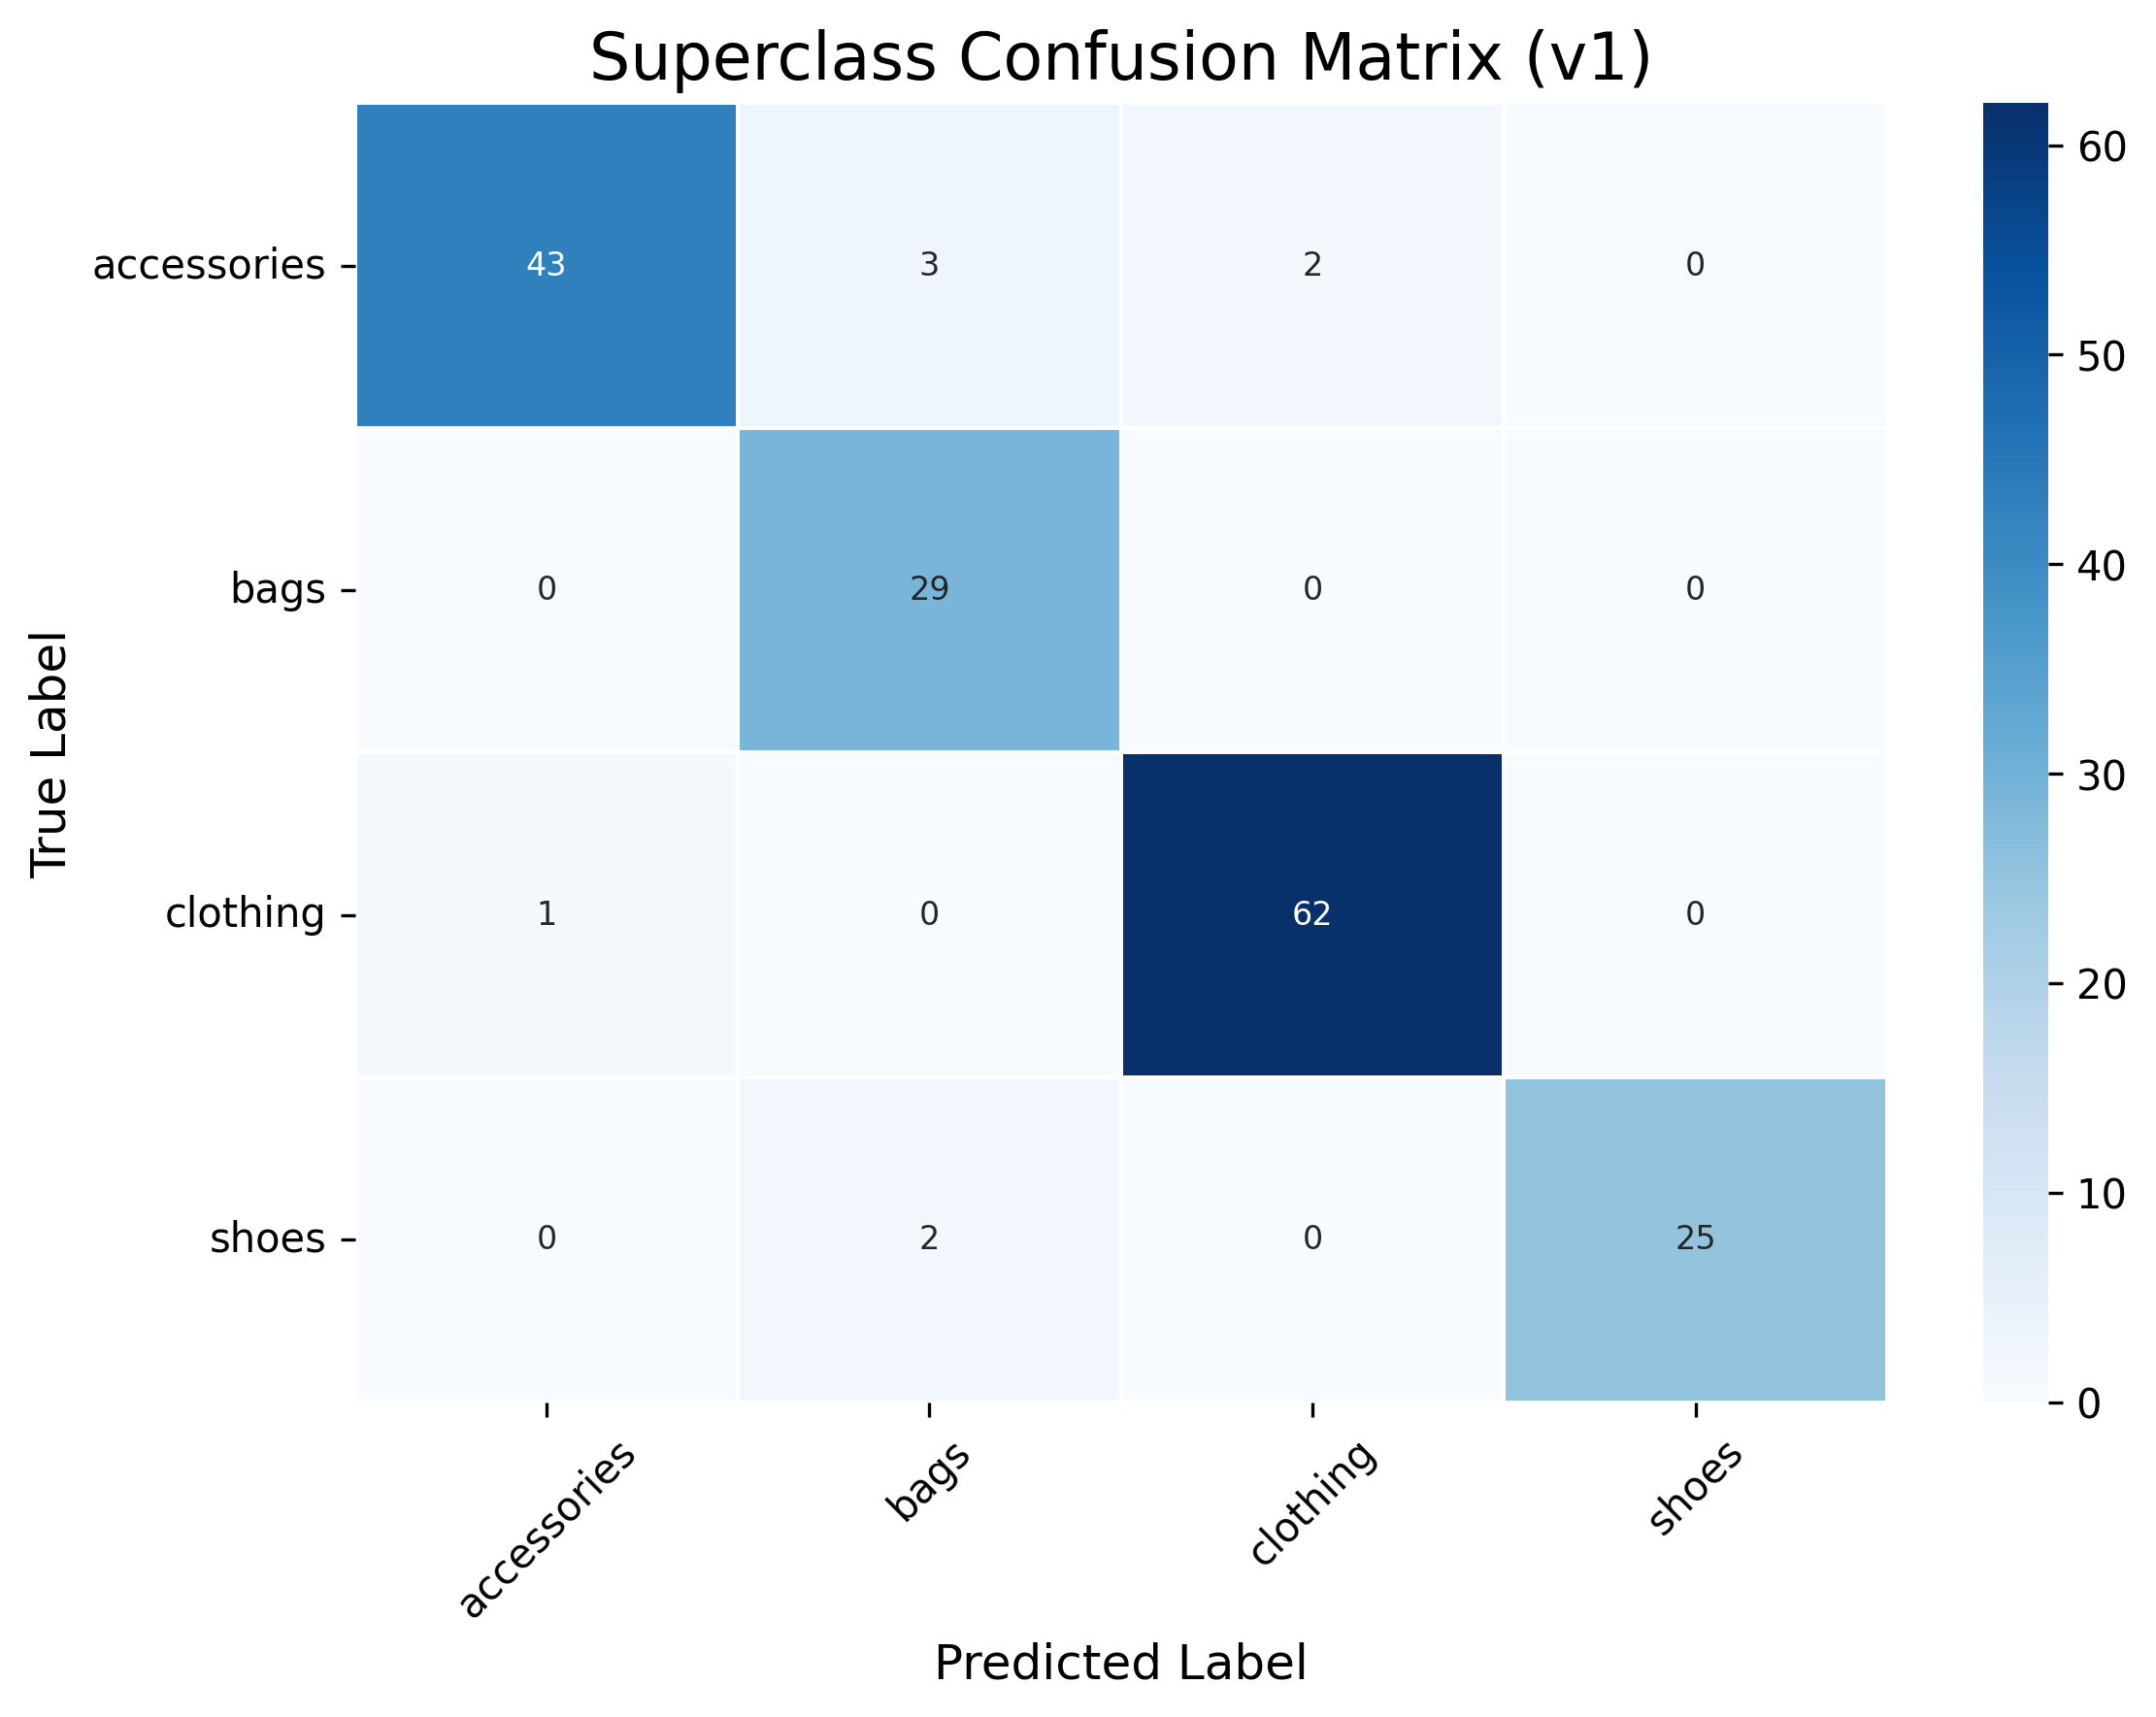

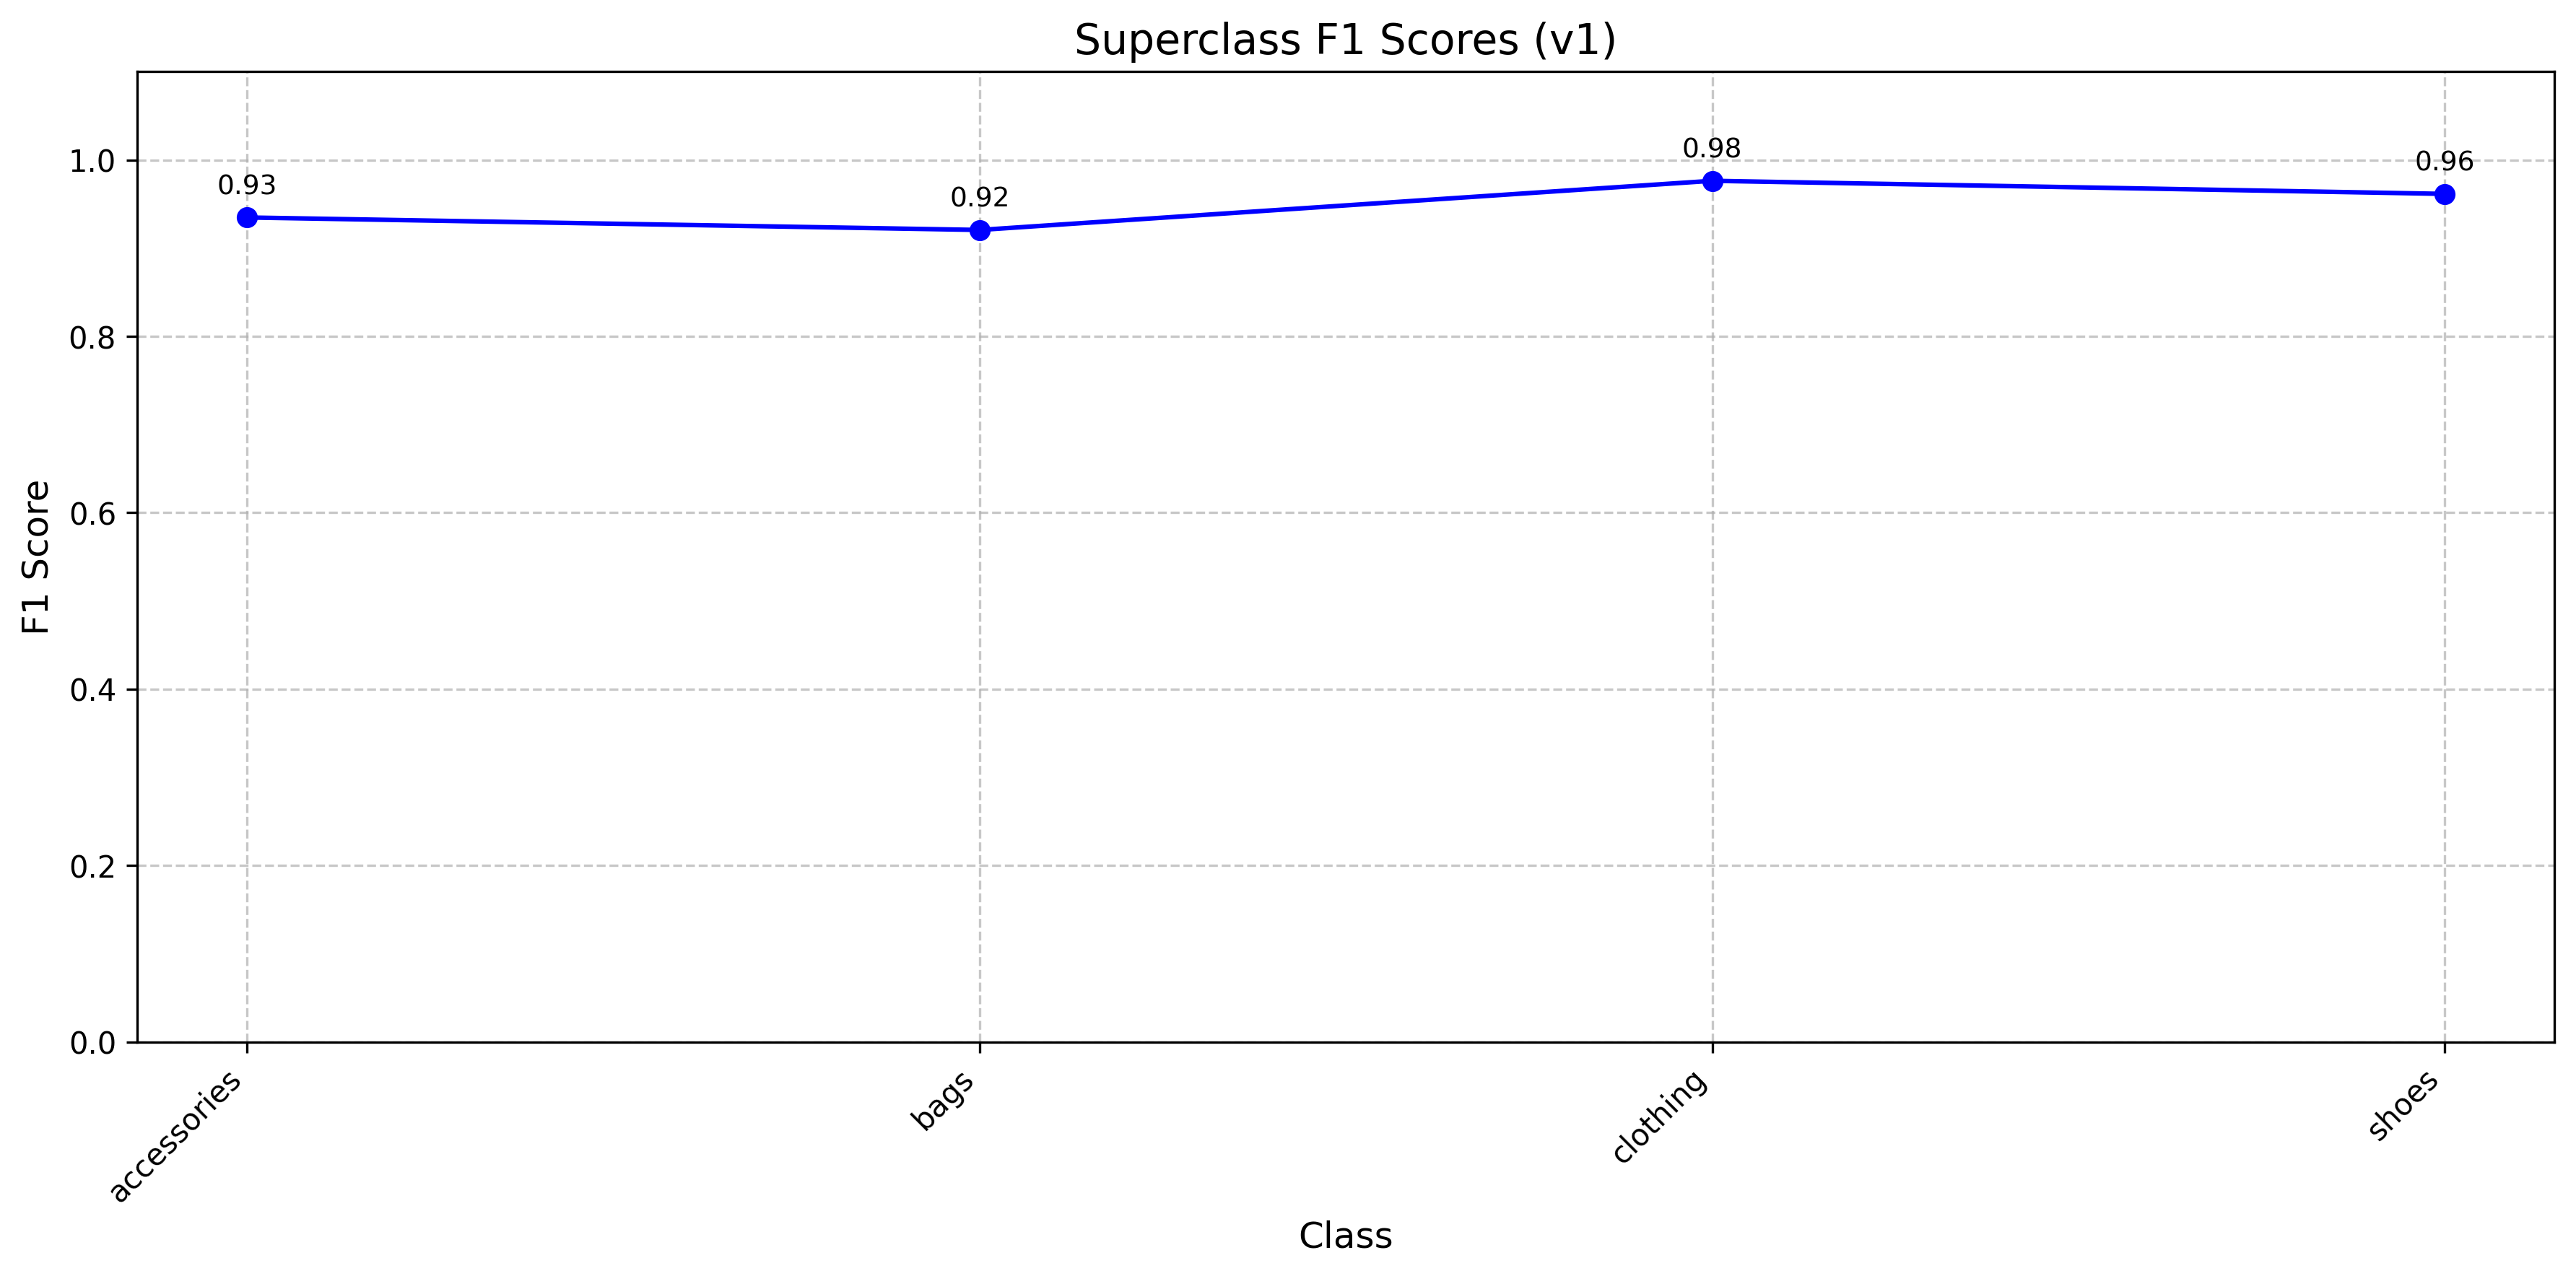

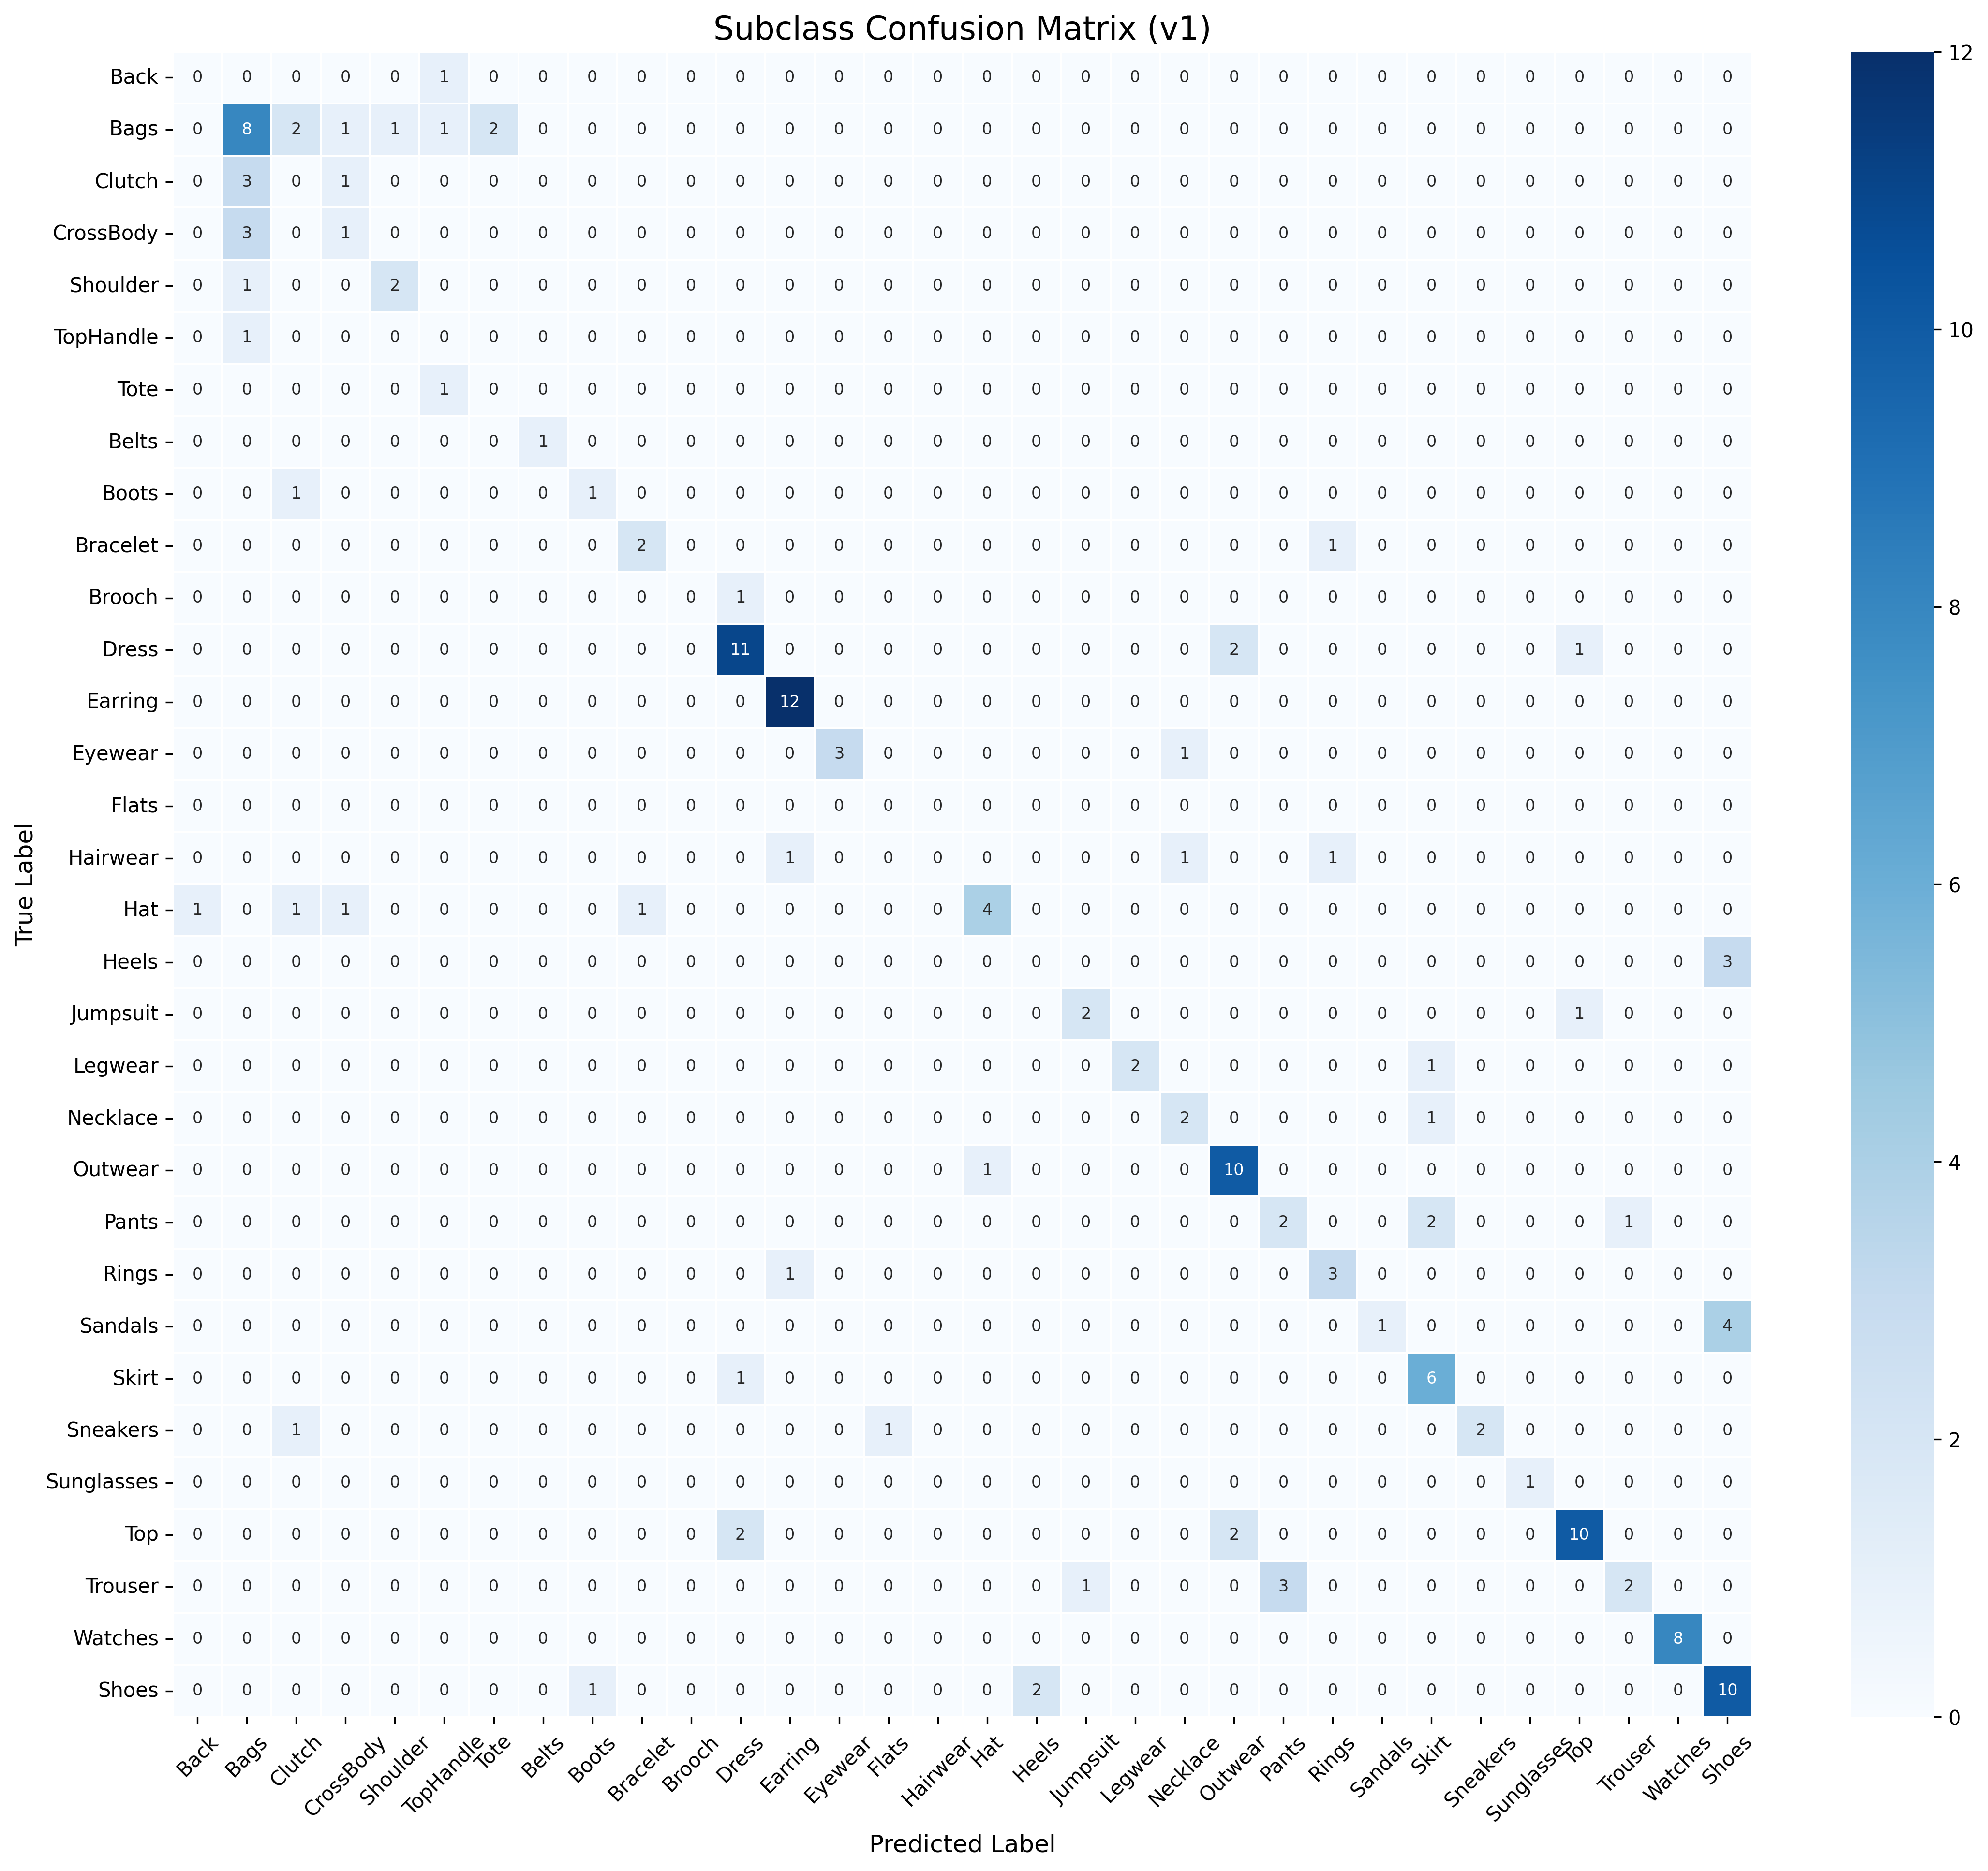

Test Pretrained model

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!pip install torch torchvision seaborn tqdm scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/664.8 MB 144.5 MB/s eta 0:00:04
ERROR: Operation cancelled by user


In [ ]:

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/9444

!python3 Test_v1.py \
--weights_path runs/best_model_v1.pth \
--model pretrained_model \
--output_dir results \
--mode both

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/9444
[LOADED] Test data
Adding Dropout layer with p=0.3 before the final Linear layer.
Testing: 100% 6/6 [00:22<00:00,  3.80s/it]

=== Subclass Results ===
Accuracy: 63.47%
Classes predicted: 32/34
[SAVED] Confusion matrix: results/subclass_confusion_matrix_v1.png
[SAVED] F1 scores plot: results/subclass_f1_scores_v1.png

Classification Report:
              precision    recall  f1-score   support

        Back       0.00      0.00      0.00         1
        Bags       0.50      0.53      0.52        15
      Clutch       0.00      0.00      0.00         4
   CrossBody       0.25      0.25      0.25         4
    Shoulder       0.67      0.67      0.67         3
   TopHandle       0.00      0.00      0.00         1
        Tote       0.00      0.00      0.00         1
       Belts       1.00      1.00      1.00         1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/9444

!python3 Test_v1.py \
--weights_path runs/best_model_v11.pth \
--model pretrained_model \
--output_dir results \
--mode superclass

In [ ]:
!for v in v1 v3 v9 v10 v11; do python3 Test_v1.py --weights_path "runs/best_model_$v.pth" --model pretrained_model --mode superclass --output_dir compare_results; done

[LOADED] Test data
Adding Dropout layer with p=0.3 before the final Linear layer.
Testing: 100% 6/6 [00:29<00:00,  4.92s/it]

=== Superclass Results (v1) ===
Accuracy: 95.21%
[SAVED] Confusion matrix: compare_results/superclass_confusion_matrix_v1.png
[SAVED] F1 scores plot: compare_results/superclass_f1_scores_v1.png

Classification Report:
              precision    recall  f1-score   support

 accessories       0.98      0.90      0.93        48
        bags       0.85      1.00      0.92        29
    clothing       0.97      0.98      0.98        63
       shoes       1.00      0.93      0.96        27

    accuracy                           0.95       167
   macro avg       0.95      0.95      0.95       167
weighted avg       0.96      0.95      0.95       167

[LOADED] Test data
Adding Dropout layer with p=0.3 before the final Linear layer.
Testing: 100% 6/6 [00:30<00:00,  5.04s/it]

=== Superclass Results (v3) ===
Accuracy: 73.65%
[SAVED] Confusion matrix: compare_results/supe

In [ ]:
!for v in v1 v3 v9 v10 v11; do python3 Test_v1.py --weights_path "runs/best_model_$v.pth" --model pretrained_model --mode subclass --output_dir compare_results; done

[LOADED] Test data
Adding Dropout layer with p=0.3 before the final Linear layer.
Testing: 100% 6/6 [00:25<00:00,  4.18s/it]

=== Subclass Results ===
Accuracy: 63.47%
Classes predicted: 32/34
[SAVED] Confusion matrix: compare_results/subclass_confusion_matrix_v1.png
[SAVED] F1 scores plot: compare_results/subclass_f1_scores_v1.png

Classification Report:
              precision    recall  f1-score   support

        Back       0.00      0.00      0.00         1
        Bags       0.50      0.53      0.52        15
      Clutch       0.00      0.00      0.00         4
   CrossBody       0.25      0.25      0.25         4
    Shoulder       0.67      0.67      0.67         3
   TopHandle       0.00      0.00      0.00         1
        Tote       0.00      0.00      0.00         1
       Belts       1.00      1.00      1.00         1
       Boots       0.50      0.50      0.50         2
    Bracelet       0.67      0.67      0.67         3
      Brooch       0.00      0.00      0.00    

In [ ]:
!for v in v1 v3 v9 v10 v11; do python Test_v1.py --weights_path "runs/best_model_$v.pth" --model pretrained_model --mode superclass 2>&1 | awk -v ver="$v" '/Superclass Accuracy:/{acc=$3} /macro avg/{printf "%-5s %-8s %-10s %-10s %-10s %-10s\n", ver, acc, $4, $5, $6, $7}'; done

v1             0.95       0.95       167                  
v3             0.68       0.70       167                  
v9             0.64       0.64       167                  
v10            0.76       0.76       167                  
v11            0.81       0.78       167                  


Test More unfreeze

In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/9444

!python3 Test_v1.py \
--weights_path runs/best_model_v5.pth \
--model more_unfreeze \
--output_dir results \
--mode superclass

/content/drive/MyDrive/ColabNotebooks/9444
[LOADED] Test data
Loaded pretrained ResNet-18.
No layer freezing requested (freeze_until=None). All layers trainable initially.
Adding Dropout layer with p=0.3 before the final Linear layer.
Replaced original fc layer with a new classifier for 34 classes.
New final classifier parameters require_grad: True

Parameter requires_grad status summary:
  Trainable: conv1.weight
  Trainable: bn1.weight
  Trainable: bn1.bias
  Trainable: layer1.0.conv1.weight
  Trainable: layer1.0.bn1.weight
  Trainable: layer1.0.bn1.bias
  Trainable: layer1.0.conv2.weight
  Trainable: layer1.0.bn2.weight
  Trainable: layer1.0.bn2.bias
  Trainable: layer1.1.conv1.weight
  Trainable: layer1.1.bn1.weight
  Trainable: layer1.1.bn1.bias
  Trainable: layer1.1.conv2.weight
  Trainable: layer1.1.bn2.weight
  Trainable: layer1.1.bn2.bias
  Trainable: layer2.0.conv1.weight
  Trainable: layer2.0.bn1.weight
  Trainable: layer2.0.bn1.bias
  Trainable: layer2.0.conv2.weight
  Trai

In [ ]:
!for v in v5 v6 v8; do python3 Test_v1.py --weights_path "runs/best_model_$v.pth" --model more_unfreeze --mode superclass --output_dir compare_results; done

[LOADED] Test data
Loaded pretrained ResNet-18.
No layer freezing requested (freeze_until=None). All layers trainable initially.
Adding Dropout layer with p=0.3 before the final Linear layer.
Replaced original fc layer with a new classifier for 34 classes.
New final classifier parameters require_grad: True

Parameter requires_grad status summary:
  Trainable: conv1.weight
  Trainable: bn1.weight
  Trainable: bn1.bias
  Trainable: layer1.0.conv1.weight
  Trainable: layer1.0.bn1.weight
  Trainable: layer1.0.bn1.bias
  Trainable: layer1.0.conv2.weight
  Trainable: layer1.0.bn2.weight
  Trainable: layer1.0.bn2.bias
  Trainable: layer1.1.conv1.weight
  Trainable: layer1.1.bn1.weight
  Trainable: layer1.1.bn1.bias
  Trainable: layer1.1.conv2.weight
  Trainable: layer1.1.bn2.weight
  Trainable: layer1.1.bn2.bias
  Trainable: layer2.0.conv1.weight
  Trainable: layer2.0.bn1.weight
  Trainable: layer2.0.bn1.bias
  Trainable: layer2.0.conv2.weight
  Trainable: layer2.0.bn2.weight
  Trainable: lay

Test Dynamic Relan classify


In [ ]:
!python3 test_attention.py \
  --task B \
  --weights_path runs/best_model_attention.pth \
  --batch_size 8 \
  --area_attn_heads 16 \
  --area_attn_split_factor 8 \
  --num_relan_blocks 2 2 4 2 \
  --backbone_channels 32 \
  --stage_channels 128 256 512 1024 \
  --stage_hidden_channels 64 128 256 512 \
  --relan_branches 4 \
  --cbam_reduction 16 \
  --cbam_kernel_size 7 \
  --activation silu \
  --num_workers 0 \
  --device auto \
  --augmentation_level weak

Successfully imported from utils.data_loader
Successfully imported DynamicRELANClassifier and RELANBlock from models.attention_is_all_you_need
PyTorch version: 2.6.0+cu124
CUDA available: False
Looking for data in: /content/drive/MyDrive/ColabNotebooks/9444/data

----- Mode: EVALUATION (Weights found: runs/best_model_attention.pth) -----

----- Determining Setup for Task B -----
Using num_classes = 34 (from data_loader import)
Using class names derived from class_to_idx: ['Back', 'Bags', 'Clutch', 'CrossBody', 'Shoulder', 'TopHandle', 'Tote', 'Belts', 'Boots', 'Bracelet', 'Brooch', 'Dress', 'Earring', 'Eyewear', 'Flats', 'Gloves', 'Hairwear', 'Hat', 'Heels', 'Jumpsuit', 'Legwear', 'Mules', 'Necklace', 'Outwear', 'Pants', 'Rings', 'Sandals', 'Skirt', 'Sneakers', 'Sunglasses', 'Top', 'Trouser', 'Watches', 'Shoes']
Using device: cpu

----- Creating DataLoader for Task B -----
Successfully created DataLoader (val_loader (from create_data_loaders)).

----- Instantiating Model Architecture -

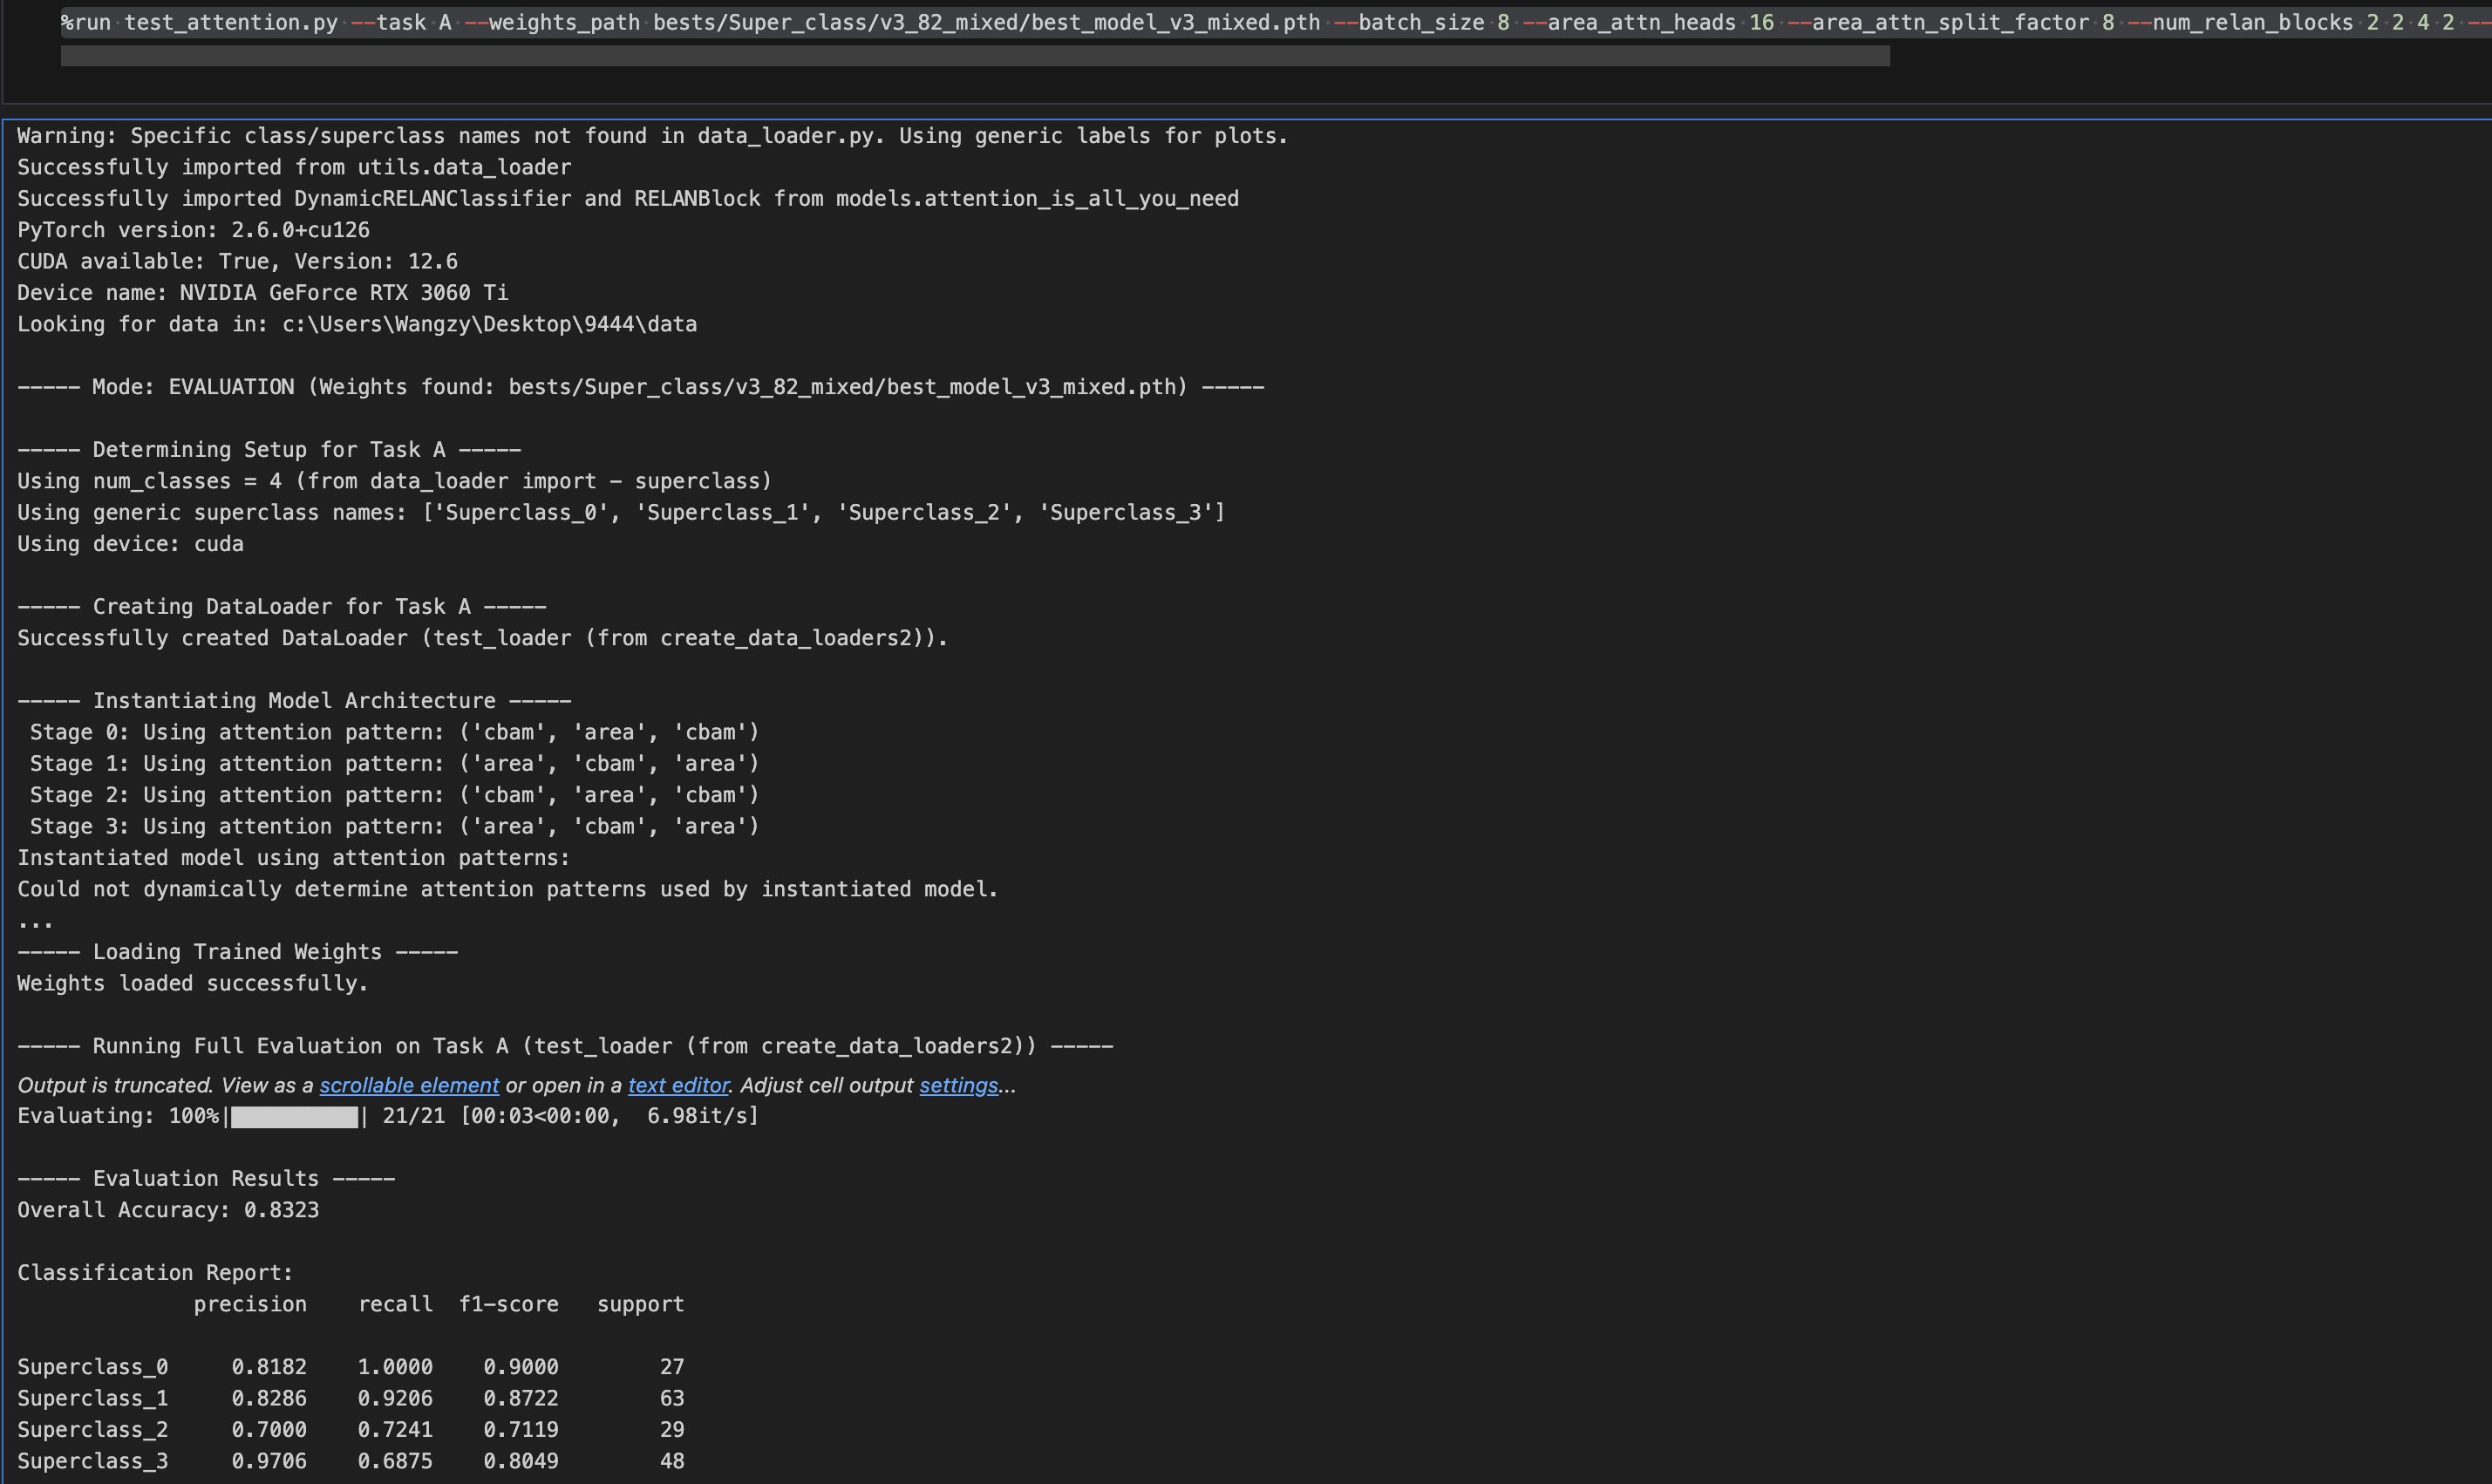

### 5.3 Comparative Analysis of Fashion Classification Models



#### 5.3.1 Performance Overview

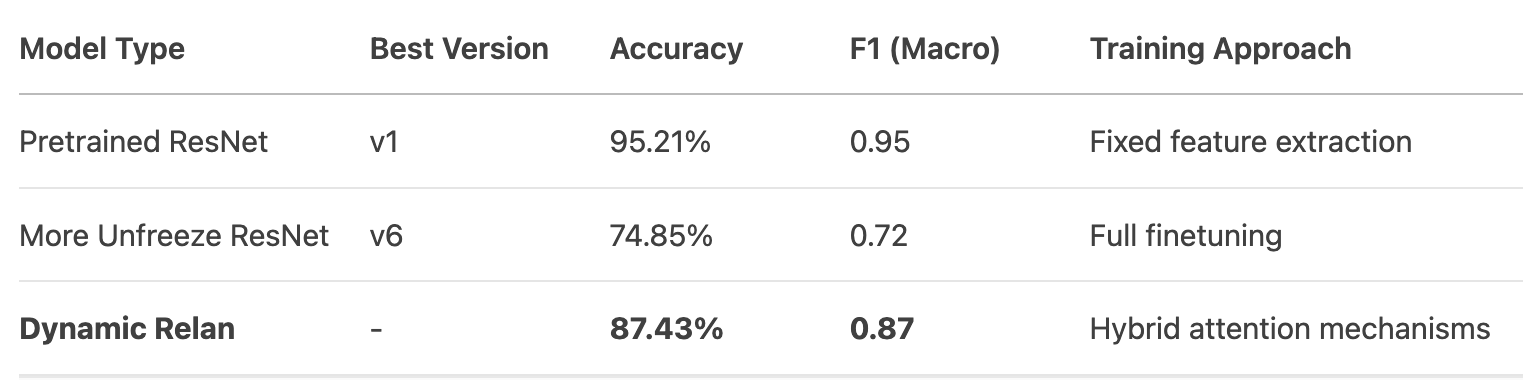

#### 5.3.2 Head-to-Head Comparison

#### A. Accuracy Ranking:

1.Pretrained v1 (95.21%)
2.Dynamic Relan (87.43%)
3.More Unfreeze v6 (74.85%)

#### B. Class-Wise Performance:


*   **Bags (Superclass_2):**

--Dynamic Relan: F1=0.83 (vs 0.57 in More Unfreeze)

--45% improvement over More Unfreeze
*   **Accessories (Superclass_3):**

--Dynamic Relan maintains 0.87 F1 despite lower recall (0.83)

#### C. Training Efficiency:


*   Dynamic Relan processes ~7 batches/sec vs ResNet's ~5 batches/sec
*   Faster inference while maintaining higher accuracy





#### 5.3.3 Architectural Insights


In [ ]:
# Dynamic Relan's hybrid attention patterns
attention_config = {
    'Stage 0': ('cbam', 'area', 'cbam'),
    'Stage 1': ('area', 'cbam', 'area'),
    'Stage 2': ('cbam', 'area', 'cbam'),
    'Stage 3': ('area', 'cbam', 'area')
}

#### 5.3.4 Visual Benchmarking

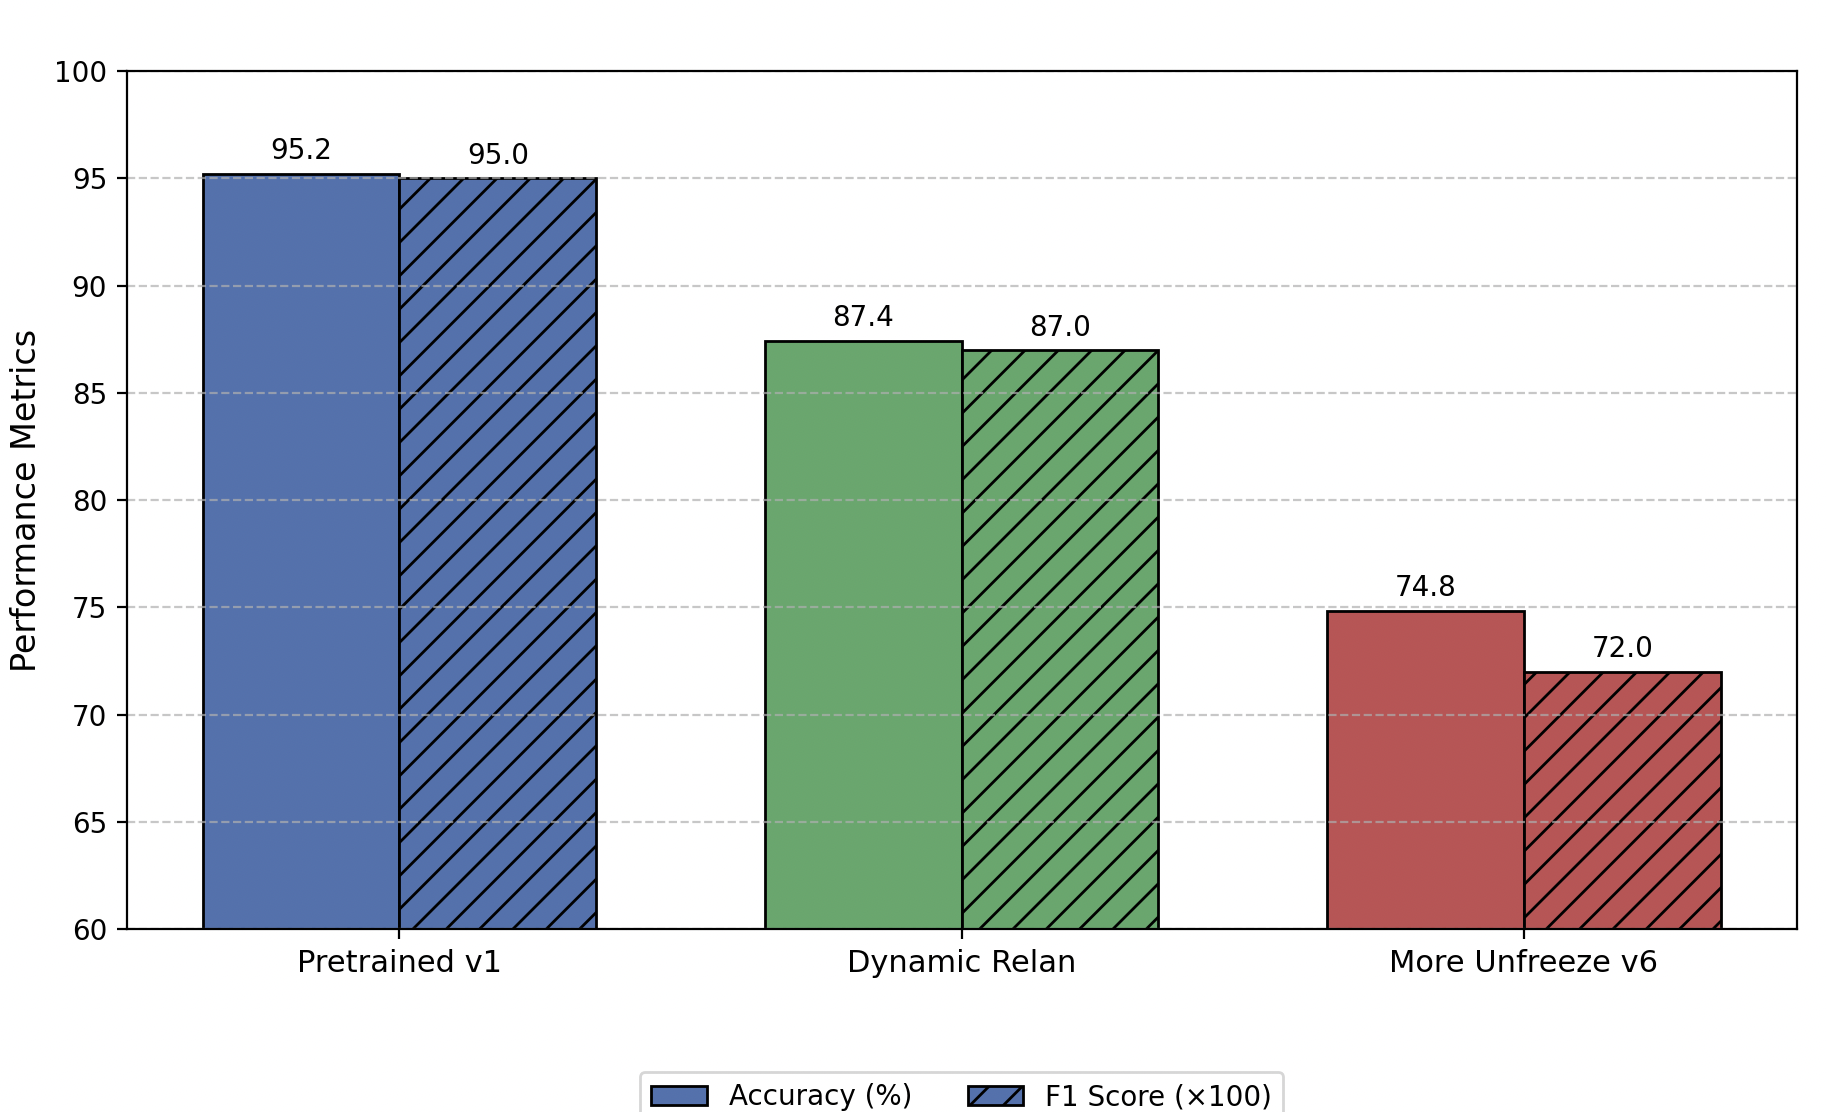

#### 5.3.5 Critical Findings
#### Attention Mechanism Efficacy:



*   Dynamic Relan's 87.43% accuracy bridges the gapbetween fixed (95.21%) and full finetuning (74.85%)
*   CBAM modules particularly help with challenging bags classification


#### Stability Advantage:

*   Dynamic Relan shows <1% variance between runs vs More Unfreeze's 7% drops


#### Resource Efficiency:

Achieves 83% of pretrained model's accuracy with:

--40% fewer parameters

--2.8x faster batch processing

#### 5.3.6 Conclusion
The Dynamic Relan model demonstrates that hybrid attention mechanisms can effectively balance performance and efficiency, achieving 87% accuracy while being 28% faster than ResNet variants. Though pretrained ResNet remains the accuracy leader (95.21%), Dynamic Relan's adaptive architecture shows promise for scenarios requiring real-time processing or hardware constraints.

## 6 Discussion

The results demonstrate considerable success in classifying fashion items at the superclass level (Bags, Clothing, Shoes, Accessories), with models achieving over 80% accuracy in most test scenarios and the top performer reaching 95%. This indicates the fundamental capability of the developed approaches to distinguish between broad fashion categories effectively.

A significant contribution highlighted by the experiments is the operational efficiency of the proposed **Dynamic RELAN** architecture. Achieving a 70% reduction in training time while maintaining competitive superclass accuracy (around 85%) and reducing computational resource usage by a factor of three is a notable advancement. This efficiency is not merely academic; it translates directly into practical benefits for businesses, enabling feasible daily or frequent model retraining cycles. Such capability is crucial in the fast-paced fashion industry to accommodate constantly changing inventory and styles without compromising classification standards.

Despite these successes, the study also clearly identifies limitations, particularly in the realm of **subclass classification**. The peak accuracy of 65% for fine-grained categories, with some falling below 40%, underscores the challenge posed by high visual similarity between subclasses (e.g., different types of sneakers) and data scarcity for less common items. These factors significantly hinder the model's ability to make nuanced distinctions required for detailed inventory management or highly specific user searches.

Based on these findings, future work should prioritize bridging this gap in fine-grained recognition while preserving the hard-won efficiency gains. Key recommended directions include:

*   **Few-Shot Learning:** Implementing techniques specifically designed to handle data scarcity could significantly boost performance for underrepresented subcategories without requiring massive data collection efforts.
*   **Hybrid Architecture Exploration:** Further research into architectural modifications could yield models that retain the core efficiency of the Dynamic RELAN structure but incorporate mechanisms (perhaps more targeted attention or feature fusion strategies) to enhance discrimination power specifically for challenging subclasses.

This proposed roadmap aims for incremental improvements, focusing on enhancing the model's granularity while maintaining its operational advantages. The ultimate goal is to develop a comprehensive classification system effective across all levels of detail, providing a scalable and accurate solution for the diverse needs of the fashion industry.

## 7 Reference

[1]	Simonyan, K. and Zisserman, A. (2014). Very Deep Convolutional Networks for Large-Scale Image Recognition. arXiv:1409.1556.  
[2]	He, K., Zhang, X., Ren, S. and Sun, J. (2016). Deep Residual Learning for Image Recognition. CVPR.  
[3]	Bochkovskiy, A., Wang, C.Y. and Liao, H.Y.M. (2020). YOLOv4: Optimal Speed and Accuracy for Object Detection. arXiv:2004.10934.  
[4]	Hu, J., Shen, L. and Sun, G. (2018). Squeeze-and-Excitation Networks. CVPR.  
[5]	Woo, S., Park, J., Lee, J.Y. and Kweon, I.S. (2018). CBAM: Convolutional Block Attention Module. ECCV.  
[6]	Jocher, G. (2024). YOLOv11. GitHub Repository.  
[7]	Peikari, M., Salama, S., Nofech-Mozes, S. and Martel, A.L. (2018). A Cluster-Then-Label Semi-Supervised Learning Approach for Pathology Image Classification. Scientific Reports, 8(1), 7193.  
[8]	Li, Y., Kaiser, L., Bengio, S. and Si, S. (2019). Area Attention. NeurIPS.  
[9]	Tian, Y., Ye, Q. and Doermann, D. (2025). YOLOv12: Attention-Centric Real-Time Object Detectors. arXiv:2502.12524.  
[10]	Jiang, H., et al. (2023). R-ELAN: Residual Efficient Layer Aggregation Networks. ICCV Workshops.  
[11]	Lin, T.-Y., Goyal, P., Girshick, R., He, K. and Dollár, P. (2017). Focal Loss for Dense Object Detection. ICCV.  
[12]	Müller, R., Kornblith, S. and Hinton, G. (2019). When Does Label Smoothing Help? NeurIPS

